# Air Force Cadet Career Problem (AFCCP) Non-Rated Line (NRL) Model Walkthrough 

## Part One (Data Wrangling)

## Part Two (Code Walkthrough)

Whatever script or .ipynb notebook you're running code from should be in the same root "afccp" directory. For example, the picture below is the directory that this notebook "AFCCP NRL Module Walkthrough.ipynb" is currectly in. The folders that I've circled in yellow may or may not be there for you, but they get created as soon as you import "afccp" into your code. 

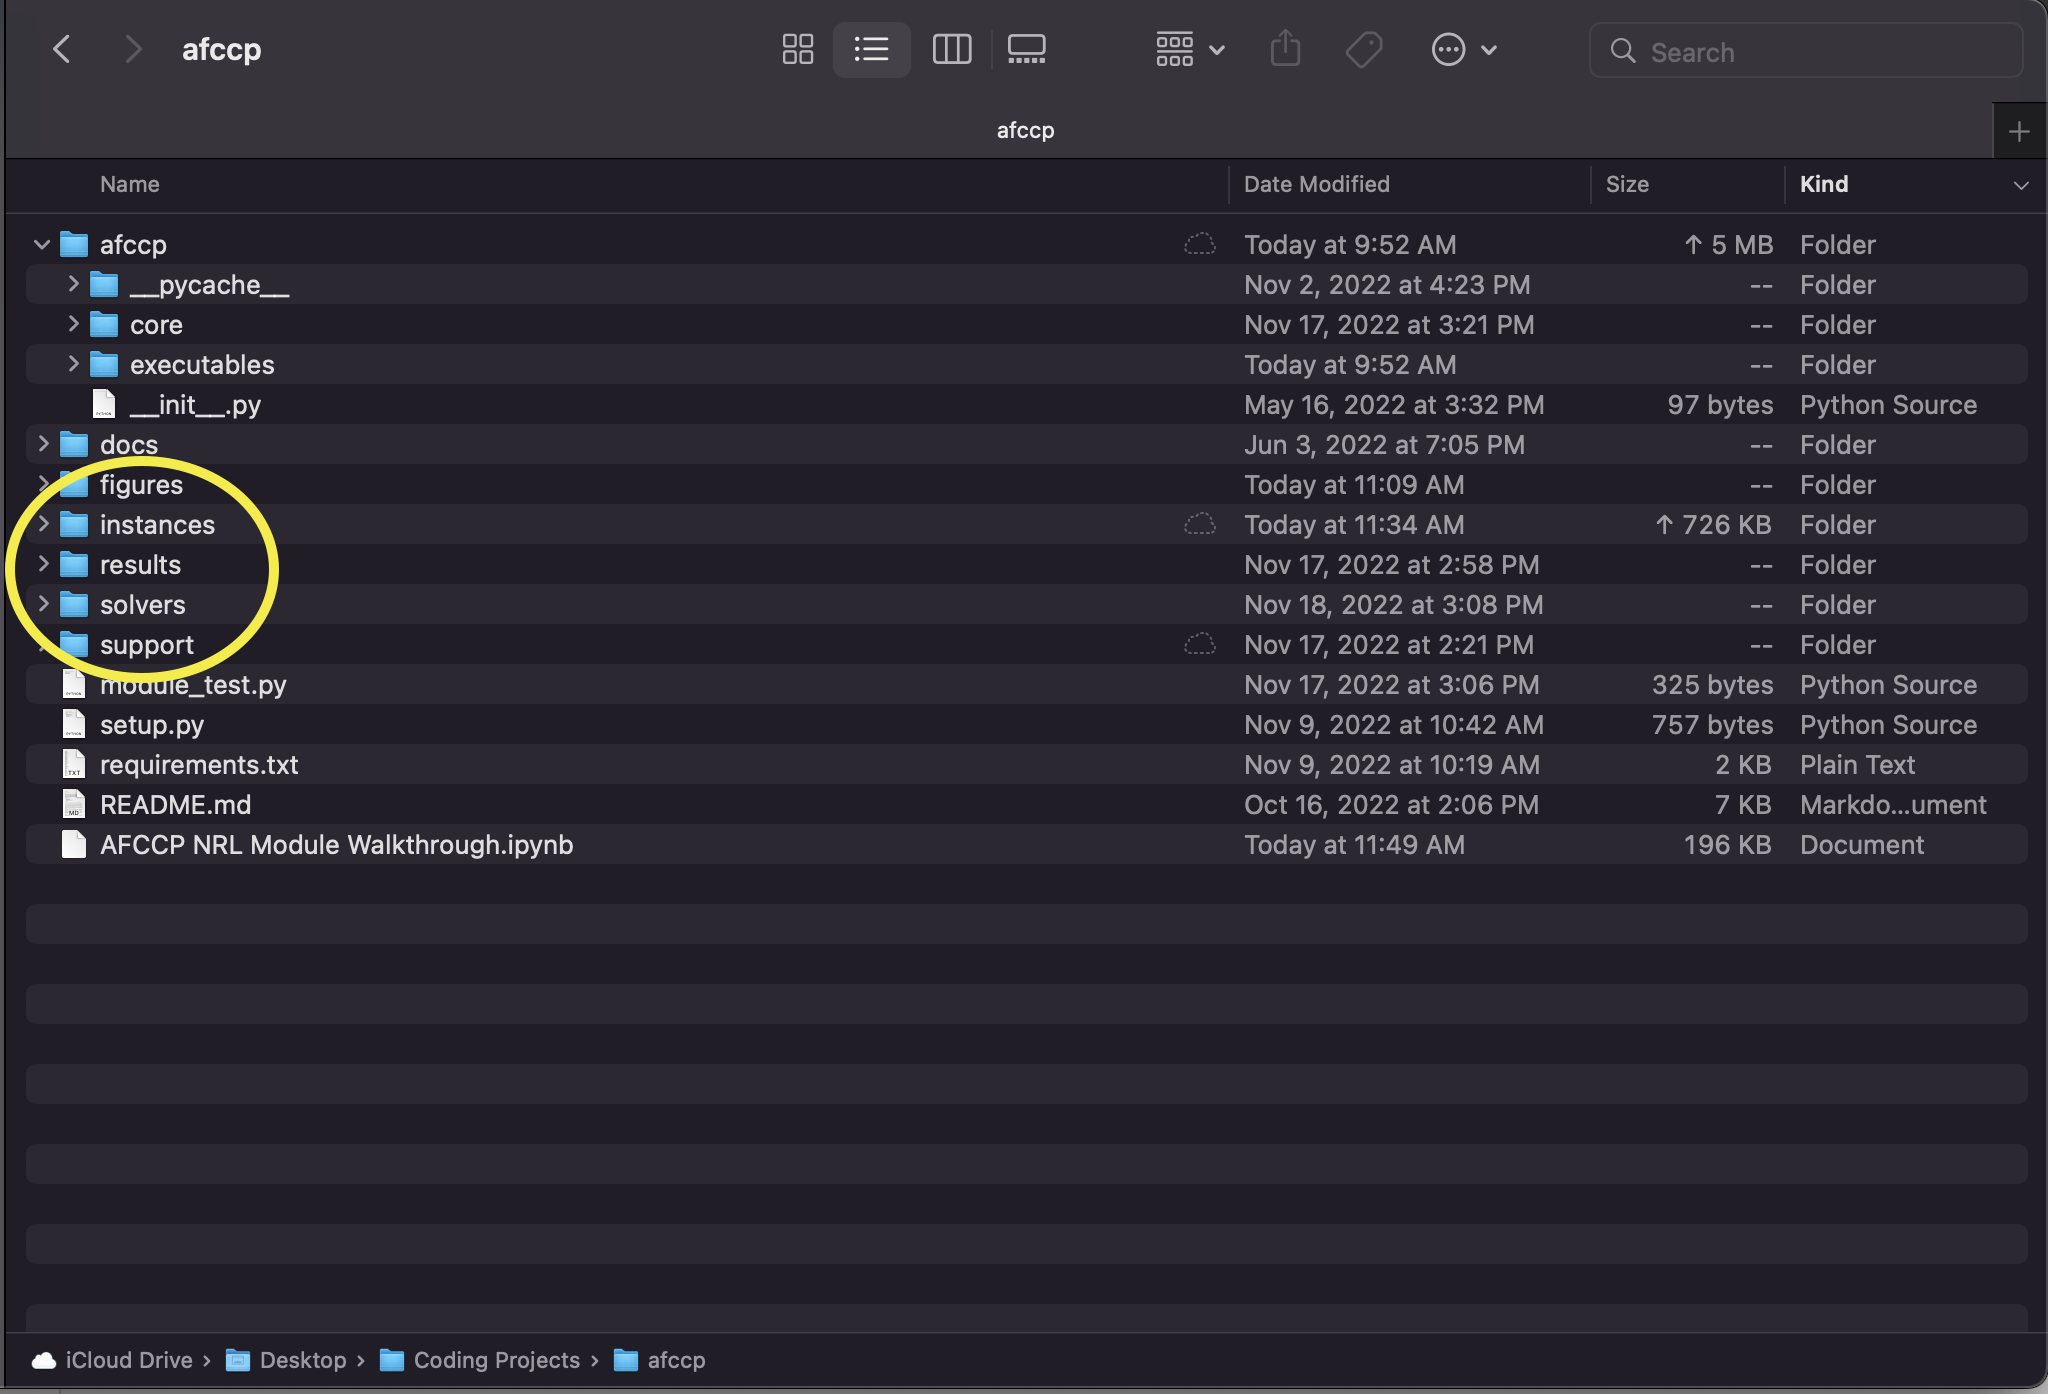

In [1]:
from IPython.display import Image
Image(filename='assets/pic1.png')

Let's go ahead and import the module. I'm going to assume that you have afccp either installed or it's cloned into wherever you're looking at. You should also have all of the following packages installed as well.

In [2]:
import sys
!{sys.executable} -m pip list

Package              Version
-------------------- -----------
appnope              0.1.3
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
attrs                21.4.0
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               5.0.0
Brotli               1.0.9
certifi              2021.10.8
cffi                 1.15.0
charset-normalizer   2.0.12
click                8.1.3
copulas              0.6.1
cryptography         38.0.1
ctgan                0.5.1
cycler               0.11.0
dash                 2.6.1
dash-core-components 2.0.0
dash-html-components 2.0.0
dash-table           5.0.0
debugpy              1.6.0
decorator            5.1.1
deepecho             0.3.0.post1
defusedxml           0.7.1
entrypoints          0.4
et-xmlfile           1.1.0
executing            0.8.3
Faker                9.9.1
fastjsonschema       2.15.3
Flask                2.2.2
Flask-Compress       1.12
fonttools            4.31.2
graphviz             0.19.1
id

If you don't have all of the above packages, simply run the following code to install them from the requirements.txt file: (I commented it out for sake of the pdf length!)

In [3]:
# # Install a pip package in the current Jupyter kernel
# !{sys.executable} -m pip install -r requirements.txt

### CadetCareerProblem Overview

Now that we have the required packages, let's import the "CadetCareerProblem" class from the "afccp" module. This is the main class object that we'll be dealing with. It represents the class of all cadet-AFSC matching problems (various cadet class years). Please note the two different meanings of the word "class" in the previous sentence! Each "instance" of CadetCareerProblem is a distinct academic class year (2019, 2020, 2021, etc.) with various cadet/AFSC parameters. Let's load in this class from the afccp module. If this is the first time you run this line, several folders will be created in your working directory (instances, figures, results, etc.)

In [4]:
from afccp.core.problem_class import CadetCareerProblem

Importing 'afccp' module...
Data folders found.
Pyomo module found.
SDV module found.
Sklearn Manifold module found.


The "instances" folder is where you will keep all of your problem instance files labeled according to their "data_name". The data names are the names of the class years or generated data. Things like 2019, 2020, 2021, or A, B, C, or Random_1, Random_2, Realistic_1, etc. for generated data. All that is needed in order to create a problem instance is the two sheets: Cadets_Fixed and AFSCs_Fixed

Here we will load in the two excel sheets (cadets/afscs fixed) for the class of 2023.

In [5]:
import pandas as pd
import numpy as np
import os

# Obtain working directory
dir_path = os.getcwd() + '/'
print('Working directory:', dir_path)

filepath = dir_path + "instances/2023b.xlsx"
cadets_fixed = pd.read_excel(filepath, sheet_name="Cadets Fixed")
cadets_fixed

Working directory: /Users/griffenlaird/Desktop/Coding Projects/afccp/


Cadet  Assigned  Male  Minority       Race         Ethnicity  USAFA  \
0         0       NaN     1         0  CAUCASIAN           UNKNOWN      0   
1         1       NaN     1         0  CAUCASIAN           UNKNOWN      0   
2         2       NaN     1         1      OTHER  MEXICAN AMERICAN      0   
3         3       NaN     0         0  CAUCASIAN              NONE      0   
4         4       NaN     1         0  CAUCASIAN              NONE      0   
...     ...       ...   ...       ...        ...               ...    ...   
1529   2566       NaN     0         0  CAUCASIAN               NaN      1   
1530   2567       NaN     0         0  CAUCASIAN               NaN      1   
1531   2568       NaN     1         0  CAUCASIAN               NaN      1   
1532   3019       NaN     1         1    UNKNOWN               NaN      0   
1533   3020       NaN     1         1    UNKNOWN               NaN      0   

        CIP1  CIP2  percentile  ...  qual_62EXA  qual_62EXB  qual_62EXC  \
0     520801  None    0.269828  ...           I           I           I   
1     260202  None    0.931034  ...           I           I           I   
2     522101  None    0.429310  ...           I           I           I   
3     150801  None    0.885345  ...           I           I           I   
4     143501  None    0.964655  ...           I           I           I   
...      ...   ...         ...  ...         ...         ...         ...   
1529  141001  None    0.970297  ...           I           I           I   
1530  141001  None    0.863861  ...           I           I           I   
1531  141001  None    0.599010  ...           I           I           I   
1532     Unk  None    0.500000  ...           I           I           I   
1533     Unk  None    0.500000  ...           I           I           M   

      qual_62EXE  qual_62EXG  qual_62EXH  qual_62EXI qual_63A qual_64P  \
0              I           I           I           I        D        D   
1              I           I           I           I        I        D   
2              I           I           I           I        D        D   
3              I           I           I           I        I        D   
4              I           M           I           M        M        D   
...          ...         ...         ...         ...      ...      ...   
1529           M           M           I           I        M        D   
1530           M           M           I           I        M        D   
1531           M           M           I           I        M        D   
1532           I           I           I           I        I        P   
1533           I           I           I           I        I        P   

     qual_65F  
0           D  
1           P  
2           D  
3           P  
4           D  
...       ...  
1529        D  
1530        D  
1531        D  
1532        P  
1533        P  

[1534 rows x 55 columns]

In [6]:
afscs_fixed = pd.read_excel(filepath, sheet_name="AFSCs Fixed")
afscs_fixed

AFSC  USAFA Target  ROTC Target  PGL Target  Estimated  Desired  Min  \
0     13H             2            6           8         12       12   10   
1     13M             3           16          19         28       27   19   
2     13N            26           79         105        161      180  161   
3     14F             2            5           7          9        8    7   
4     14N            71          124         195        210      195  195   
5     15A            14           21          35         64       70   60   
6     15W             9           16          25         34       34   25   
7     17X            52          129         181        193      185  181   
8     21A            15           69          84         92       92   84   
9     21M            17           12          29         29       29   29   
10    21R            12           49          61         68       67   61   
11    31P             9           20          29         35       35   29   
12  32EXA             1            2           3          5        5    3   
13  32EXC             2            5           7         10       10    7   
14  32EXE             1            2           3          3        3    3   
15  32EXF             1            2           3          5        5    3   
16  32EXG            10           32          42         60       60   42   
17  32EXJ             1            2           3          3        3    3   
18    35P             2           16          18         22       22   18   
19    38F            14           70          84         92       92   84   
20    61C             0            1           1          3        3    1   
21    61D             4            9          13         13       13   13   
22  62EXA             3           12          15         15       15   15   
23  62EXB             4            8          12         12       12   12   
24  62EXC             5           15          20         24       24   24   
25  62EXE            15           48          63         51       60   51   
26  62EXG             5           29          34         48       48   34   
27  62EXH             3            9          12         24       24   12   
28  62EXI             2            0           2          2        2    2   
29    63A            15           54          69         95       95   69   
30    64P             8           42          50         75       75   50   
31    65F             8           26          34         37       37   34   

    Max  Eligible Cadets  USAFA Cadets  Mandatory Cadets  Desired Cadets  \
0    14               28             0                24               4   
1    27             1534           400                 0             165   
2   210             1534           400               563               0   
3     9              190            56                92              12   
4   210             1534           400               957             357   
5    72              578           126                98             102   
6    50              137            27                23               0   
7   193             1534           400               527              93   
8    92             1534           400                 0             740   
9    38             1534           400                 0             756   
10   67             1534           400                 0             341   
11   35             1534           400                 0             133   
12    6                6             0                 6               0   
13   10               58            14                58               0   
14    6               45            10                45               0   
15    5              119             2               119               0   
16   60              311            40               247              64   
17    5                5             0                 5               0   
18   22            

Assuming you have these two excel sheets in a workbook called "2023b.xlsx" in the "instances" subfolder, then this next line should work! We're going to import these files to create a problem instance for "2023b".

In [7]:
instance = CadetCareerProblem("2023b")  # That's all you have to do! 

Importing 2023b problem instance...
Imported.


### Parameters

#### Structure Demo

The code will grab this data and load it into a "unique" data structure that I've created for this model. Rather than have a bunch of variables corresponding to the parameters of this problem, I created a dictionary called "parameters" which contains all of the necessary "fixed" parameters to the problem. The fixed parameters are the ones that you as an analyst can't really change. They're inherent characteristics about the cadets and the AFSCs. Most are loaded into the dictionary as numpy arrays of various sizes. These elements are mutable too which is very convenient. Let's take a look at some of them.

In [8]:
# Here is a list of all the "keys" to this dictionary
print(instance.parameters.keys())

dict_keys(['afsc_vector', 'P', 'quota', 'N', 'M', 'qual', 'quota_max', 'quota_min', 'utility', 'quota_e', 'quota_d', 'pgl', 'ID', 'assigned', 'ineligible', 'eligible', 'mandatory', 'desired', 'permitted', 'usafa', 'usafa_proportion', 'male', 'male_proportion', 'minority', 'minority_proportion', 'cip1', 'cip2', 'merit', 'merit_all', 'race', 'ethnicity', 'usafa_quota', 'rotc_quota', 'afsc_utility', 'c_pref_matrix', 'a_pref_matrix', 'I', 'J', 'J^E', 'J^P', 'I^E', 'num_eligible', 'I^P', 'I^D', 'sum_merit', 'J^Fixed'])


In [9]:
# This is just shorthand so I don't have to type "instance.parameters" everytime
p = instance.parameters

# Numbers of Cadets, AFSCs, and AFSC preferences, respectively
for param in ['N', 'M', 'P']:
    print(param + ':', p[param])

N: 1534
M: 32
P: 6


In [10]:
# Utility matrix  (Each row is a cadet, each column an AFSC)
print(p['utility'])

[[0.   0.   0.   ... 0.75 1.   0.  ]
 [0.   0.75 0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.33 0.   0.  ]
 ...
 [0.   0.   0.   ... 0.65 0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


In [11]:
# Qualification matrix
print(p['qual'])

[['I' 'P' 'P' ... 'D' 'D' 'D']
 ['I' 'P' 'P' ... 'I' 'D' 'P']
 ['I' 'P' 'P' ... 'D' 'D' 'D']
 ...
 ['I' 'P' 'M' ... 'M' 'D' 'D']
 ['I' 'P' 'P' ... 'I' 'P' 'P']
 ['I' 'P' 'P' ... 'I' 'P' 'P']]


In [12]:
# Array of AFSCs
print(p['afsc_vector'])

['13H' '13M' '13N' '14F' '14N' '15A' '15W' '17X' '21A' '21M' '21R' '31P'
 '32EXA' '32EXC' '32EXE' '32EXF' '32EXG' '32EXJ' '35P' '38F' '61C' '61D'
 '62EXA' '62EXB' '62EXC' '62EXE' '62EXG' '62EXH' '62EXI' '63A' '64P' '65F'
 '*']


The * indicates the "unmatched AFSC" which is useful for the stable marriage stuff

In [13]:
# Sets of cadets and AFSCs
for param in ['I', 'J']:
    print(param, p[param])

I [   0    1    2 ... 1531 1532 1533]
J [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


These are purely the indices of the cadets and the AFSCs, nothing else. This is not the "ID" of the cadet.

In [14]:
# Here is the list of cadet ID's!
print(p["ID"])

[   0    1    2 ... 2568 3019 3020]


In [15]:
# Set of cadets that are eligible for the AFSC at index 23 (which happens to be 62EXB)
print('cadet indices:', p['I^E'][23], '\n')
print('AFSC at index 23:', p["afsc_vector"][23])

cadet indices: [   7   14   22   65   69   89  128  152  161  166  168  309  350  391
  412  420  472  475  509  534  603  612  709  731  754  756  763  773
  789  792  815  857  873  877  933  992 1044 1049 1072 1079 1365 1366
 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377 1378] 

AFSC at index 23: 62EXB


In [16]:
# Set of USAFA cadets that are eligible for the AFSC at index 23
print('USAFA cadet indices', p['I^D']['USAFA Proportion'][23]) 

# ['I^D'][objective][AFSC index] is how I do it there^^^^
pass

USAFA cadet indices [1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377 1378]


In [17]:
# Set of AFSCs for which the cadet at index 0 is eligible
print('AFSC indices', p['J^E'][0])
print('AFSC names', p['afsc_vector'][p['J^E'][0]])

AFSC indices [ 1  2  4  7  8  9 10 11 18 19 29 30 31]
AFSC names ['13M' '13N' '14N' '17X' '21A' '21M' '21R' '31P' '35P' '38F' '63A' '64P'
 '65F']


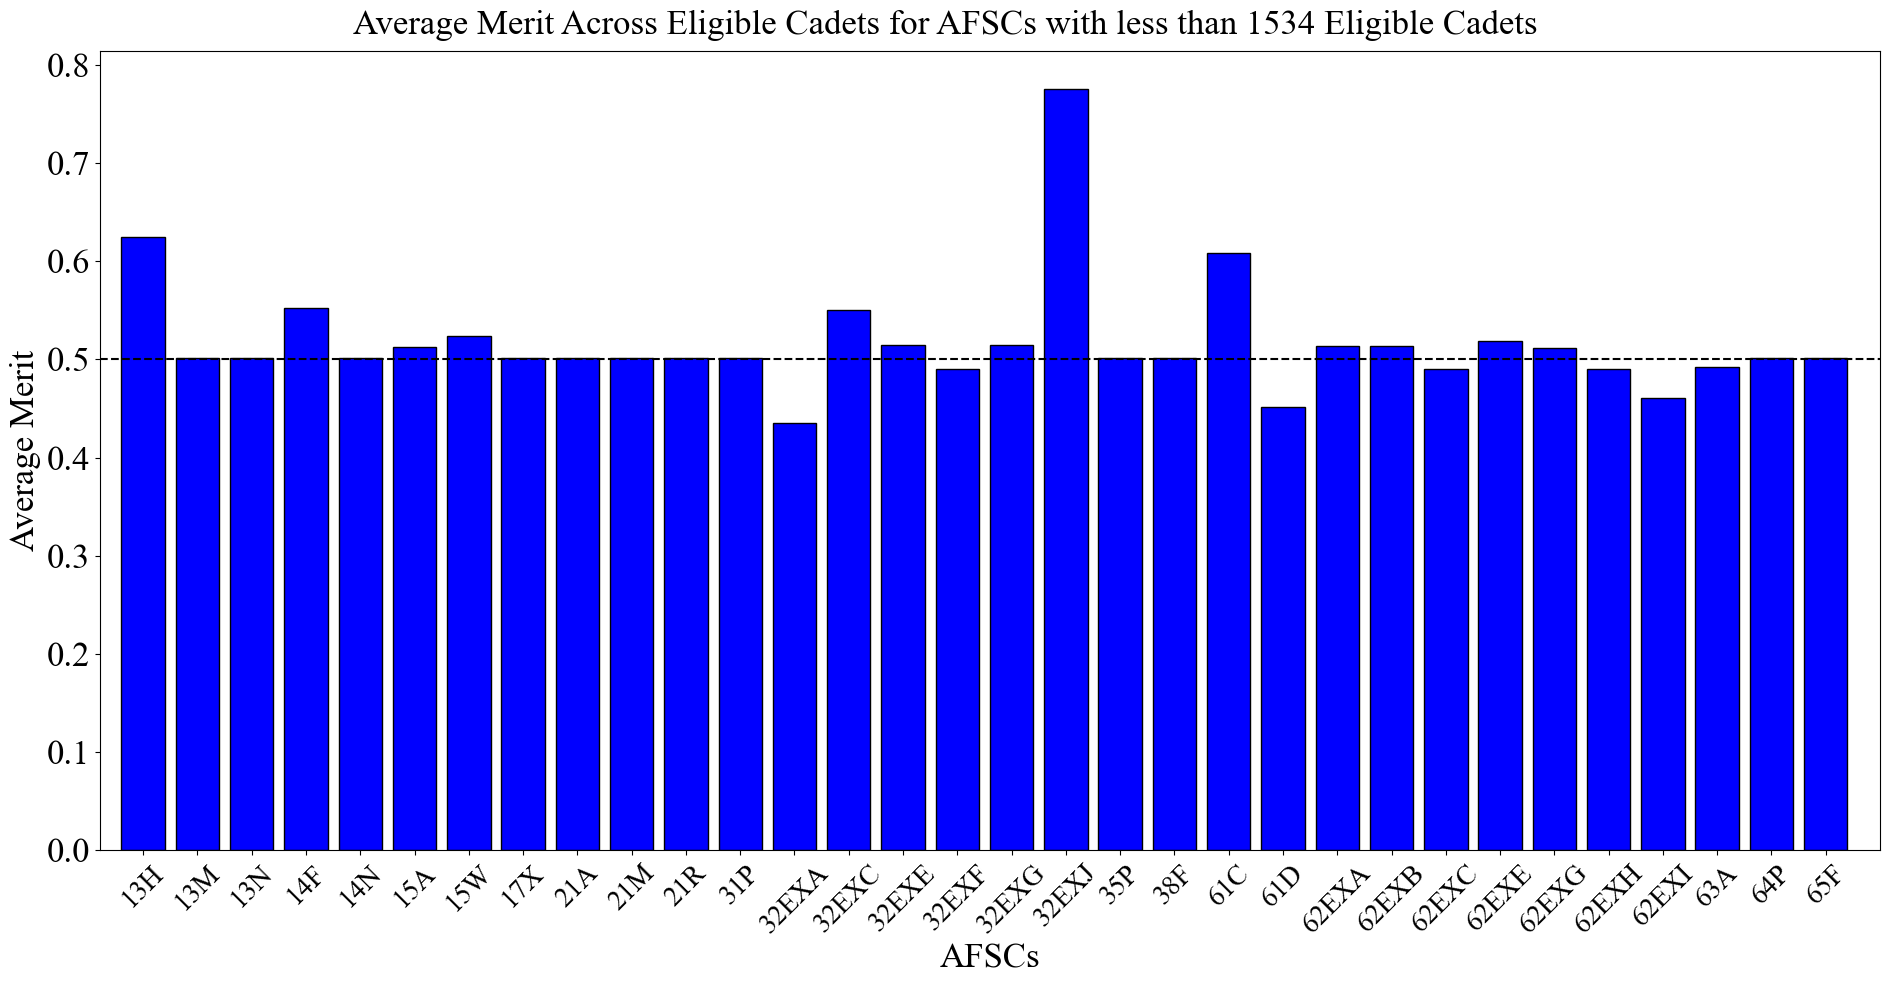

In [18]:
# Now let's show the data using one of our methods
chart = instance.display_data_graph({"graph":'Average Merit', "save": False, "bar_color": "blue"})

There are many other parameters to this method that control the size of the different fonts, colors, titles, and so on.

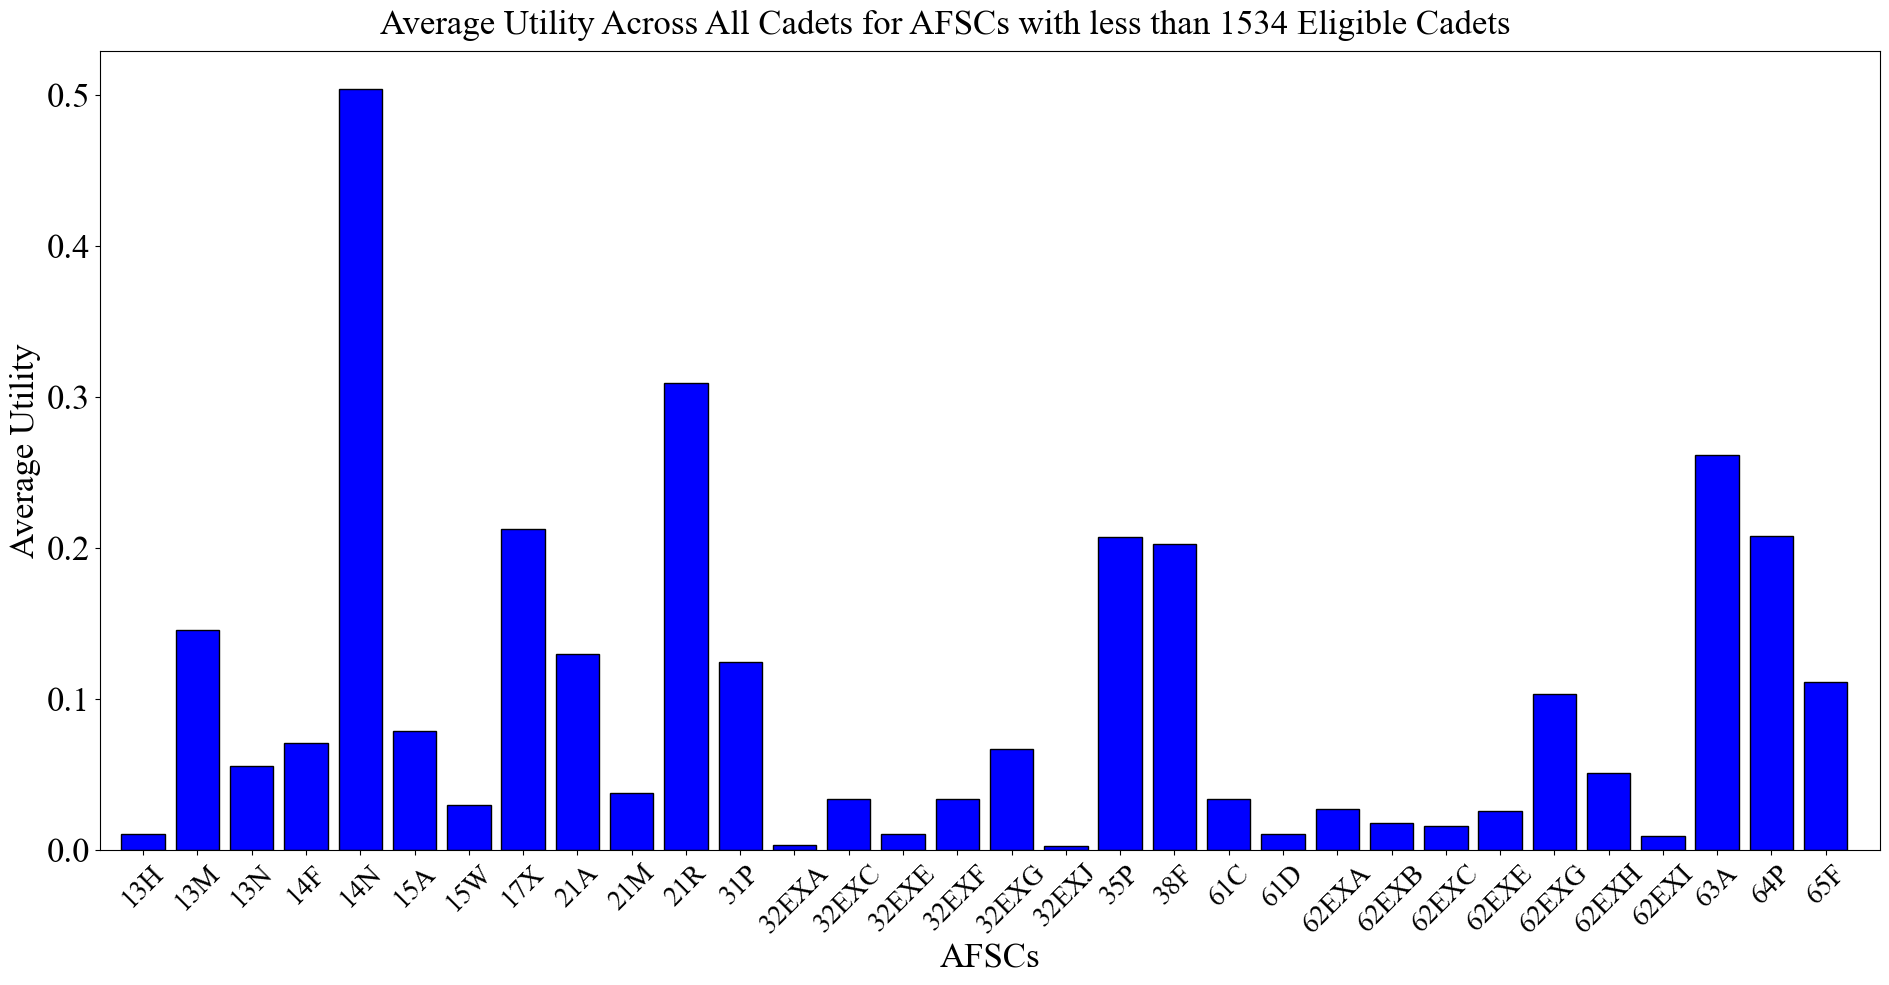

In [19]:
# We can look at the average utility placed on each of the AFSCs
chart = instance.display_data_graph({"graph": "Average Utility", "eligibility": False})

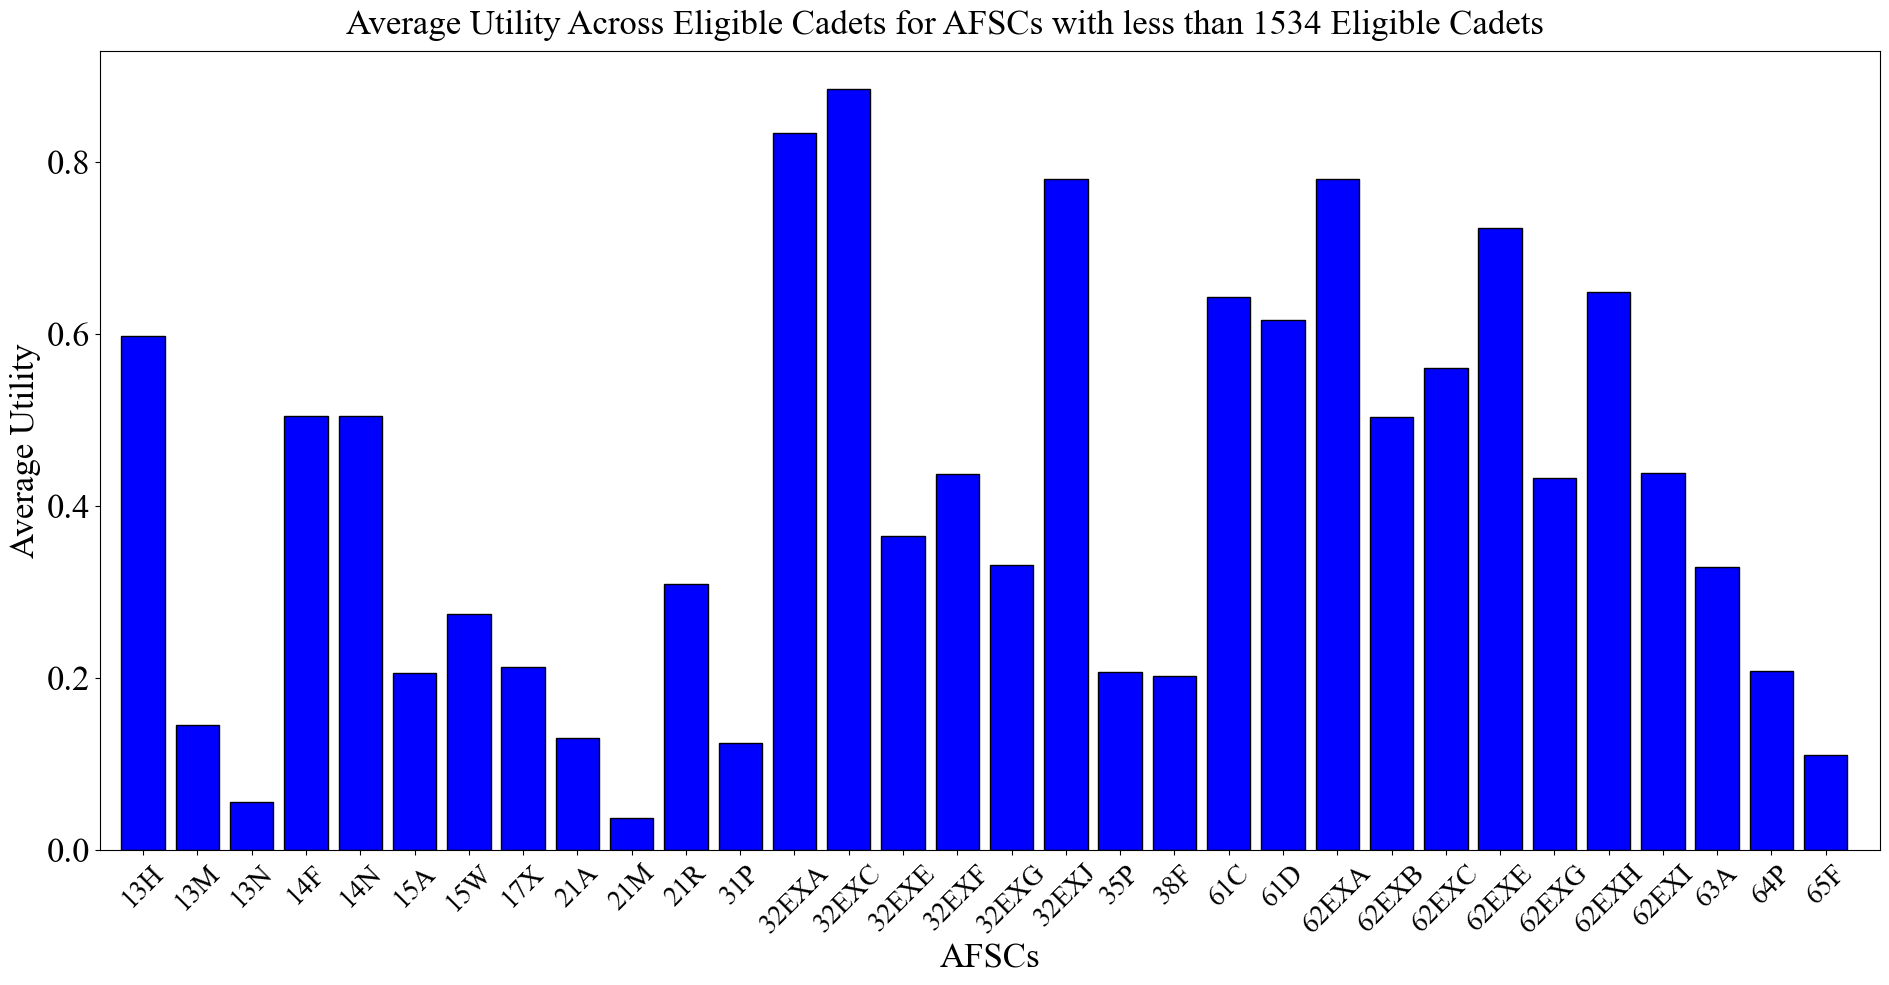

In [20]:
# We can also look at the average utility placed on each of the AFSCs of the set of eligible cadets for each AFSC
chart = instance.display_data_graph({"graph": "Average Utility", "eligibility": True}) 

# This is probably more fair since most cadets aren't going to place preferences on AFSCs they're not eligible for
pass

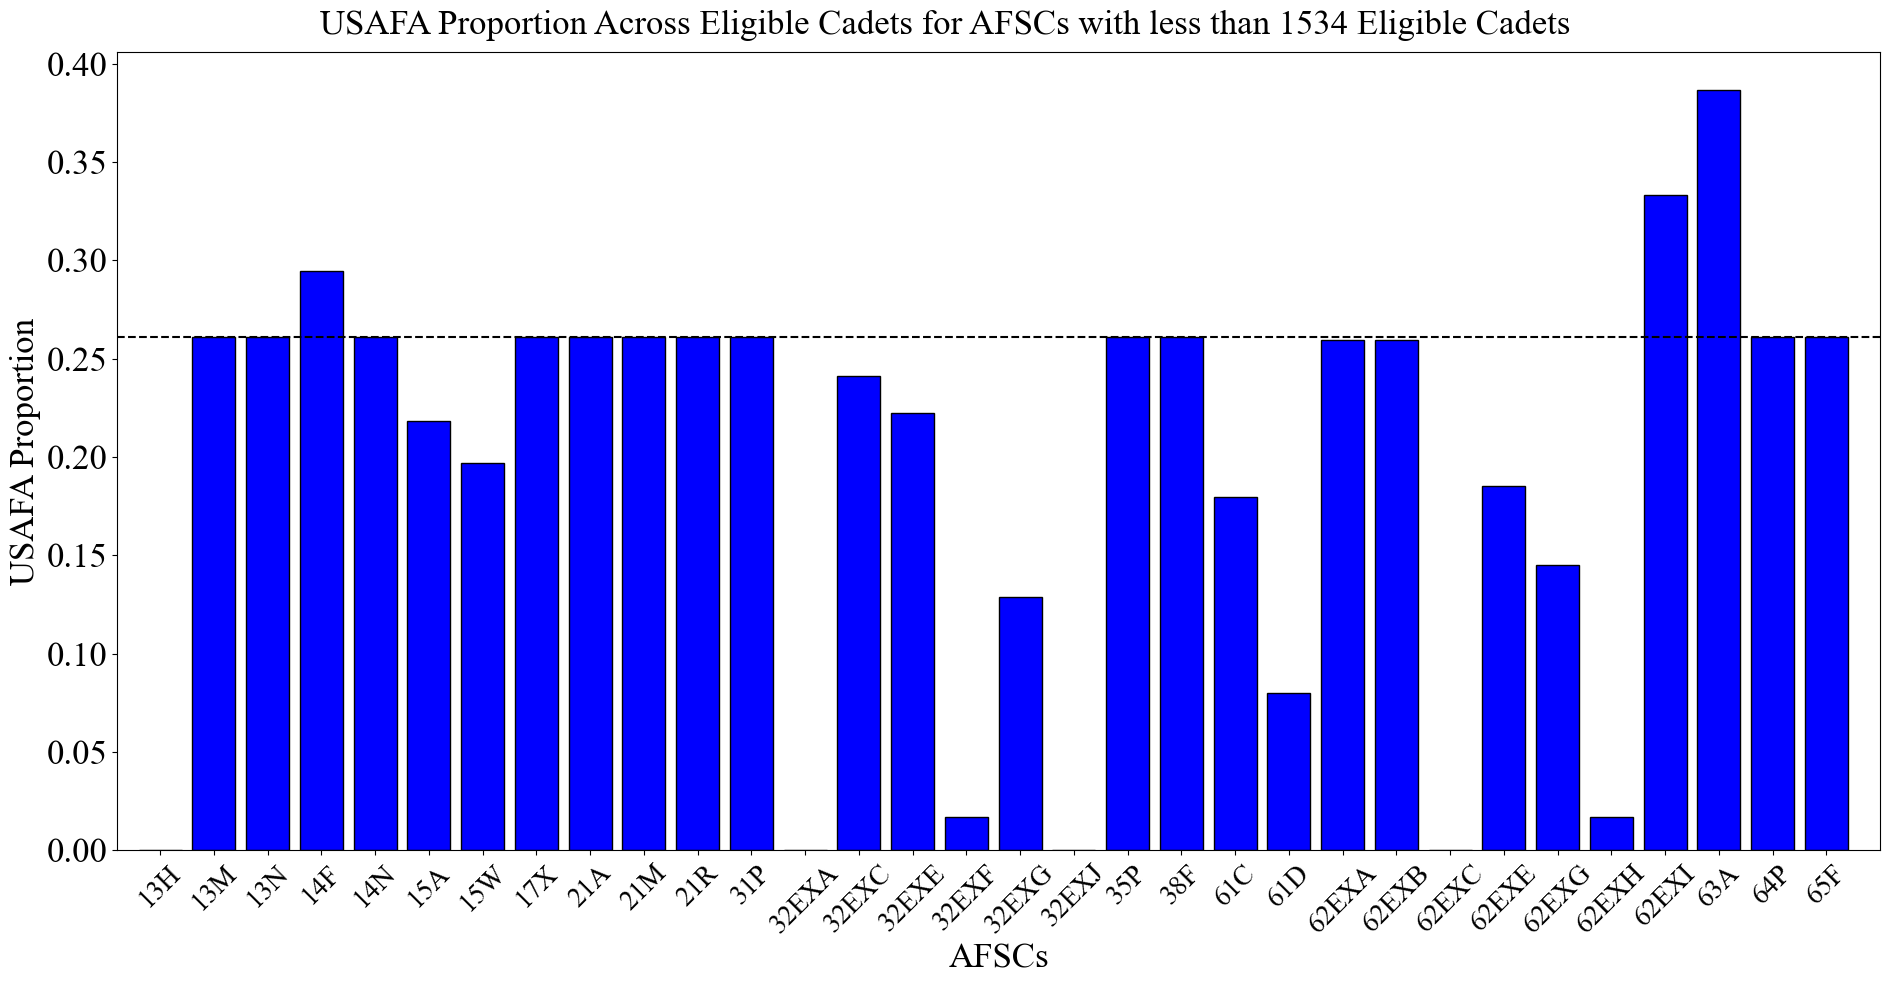

In [21]:
chart = instance.display_data_graph({"graph": 'USAFA Proportion'}) 

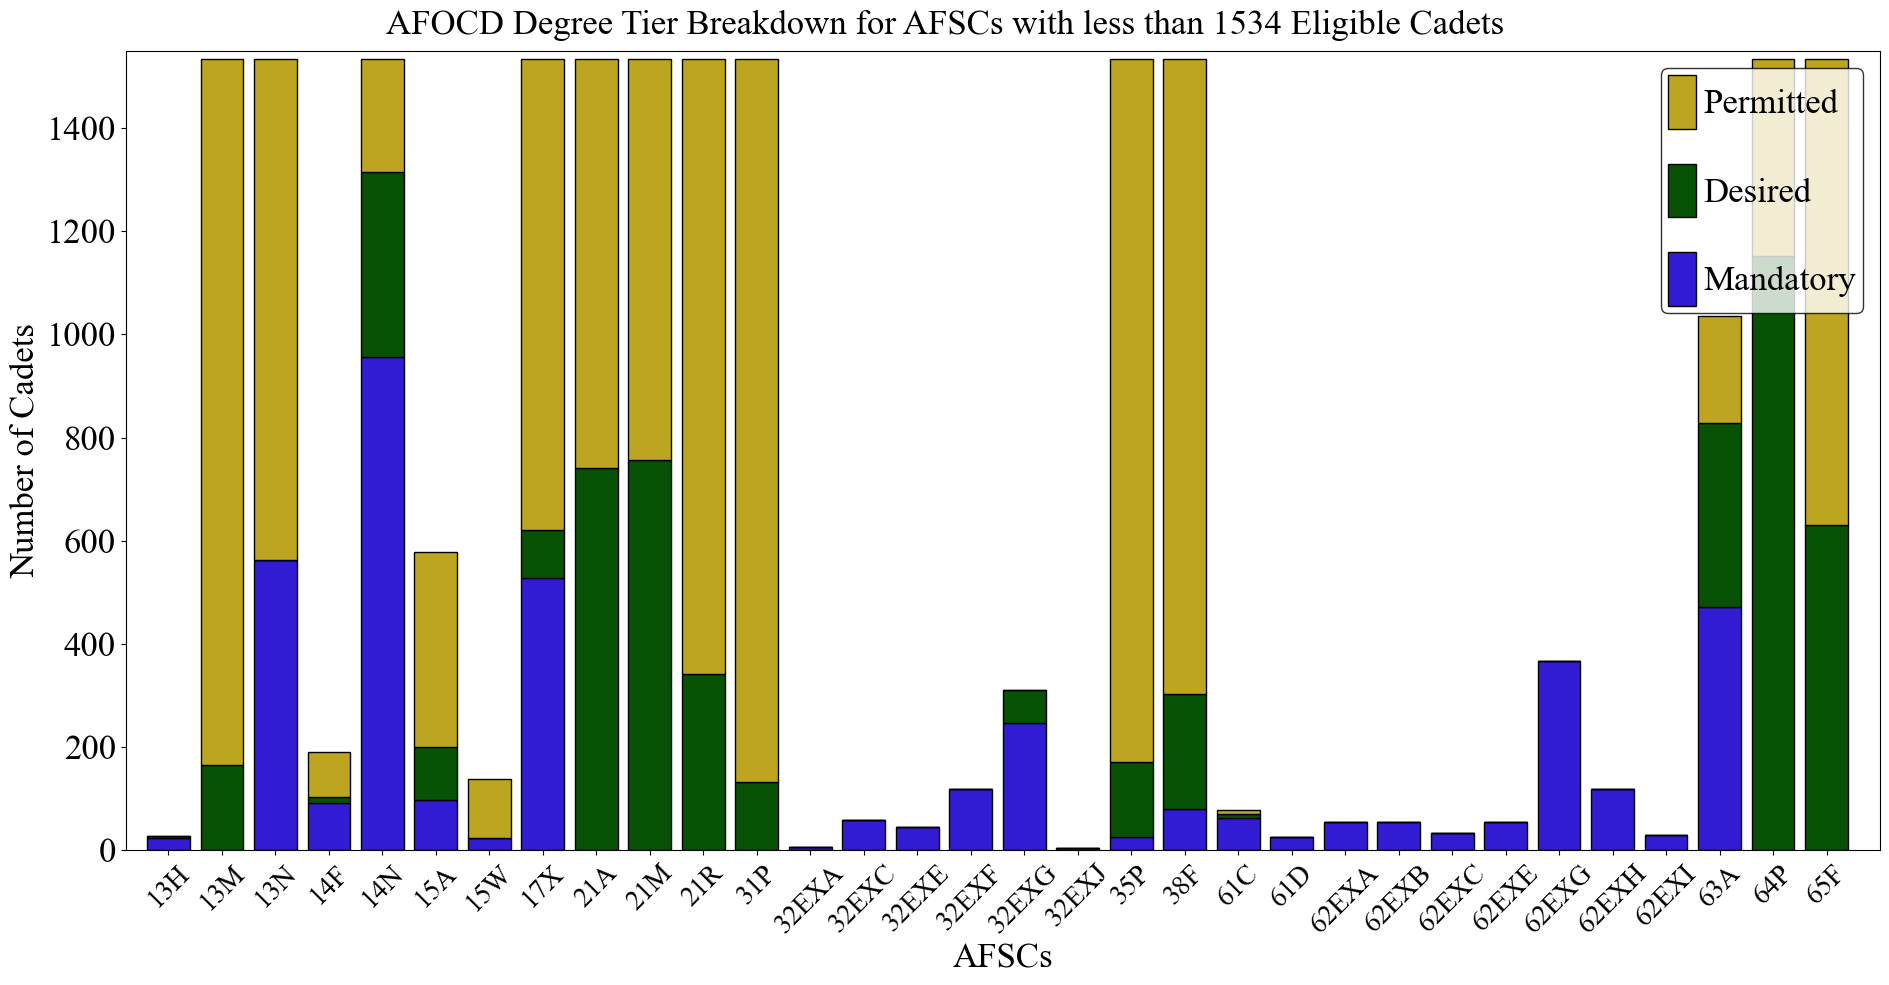

In [22]:
chart = instance.display_data_graph({"graph": 'AFOCD Data'}) 

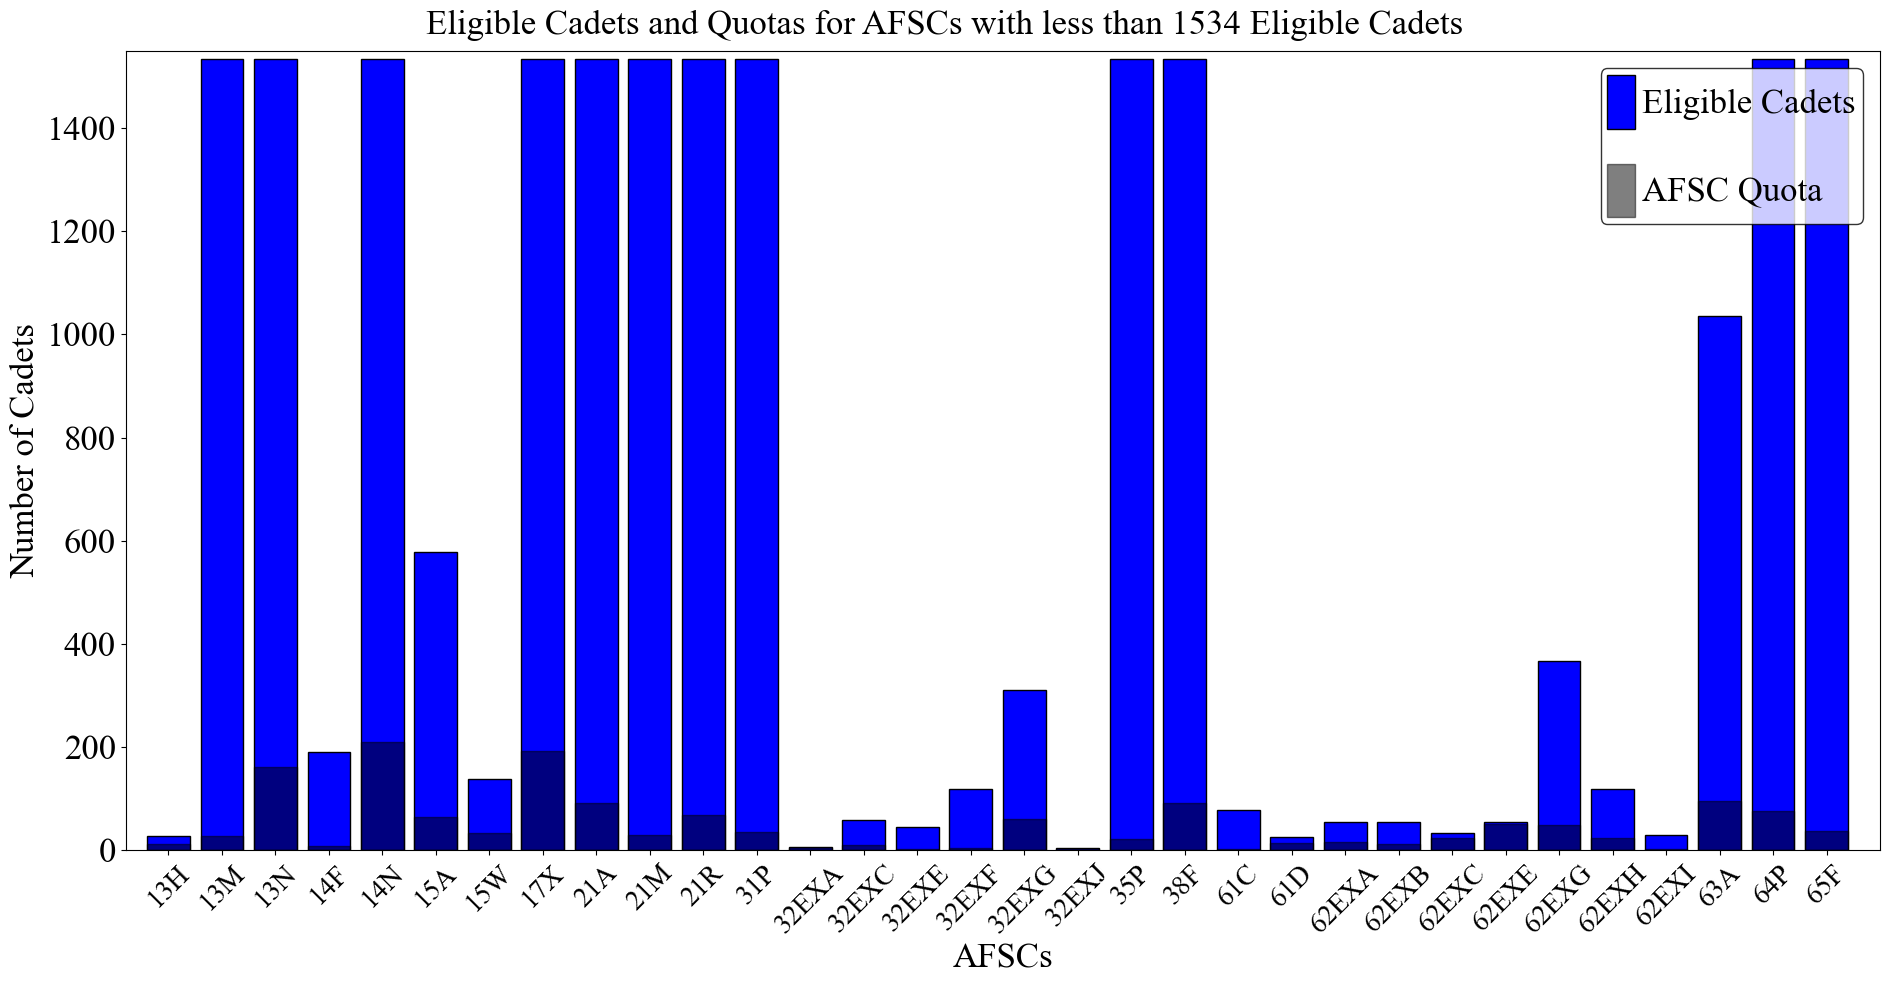

In [23]:
chart = instance.display_data_graph({"graph": 'Eligible Quota'})

One thing you'll notice is that the title always says "for AFSCs with less than 1534 Eligible Cadets". This is because we can also "zoom in" on the smaller AFSCs if need be using the "eligibility_limit" parameter. For example

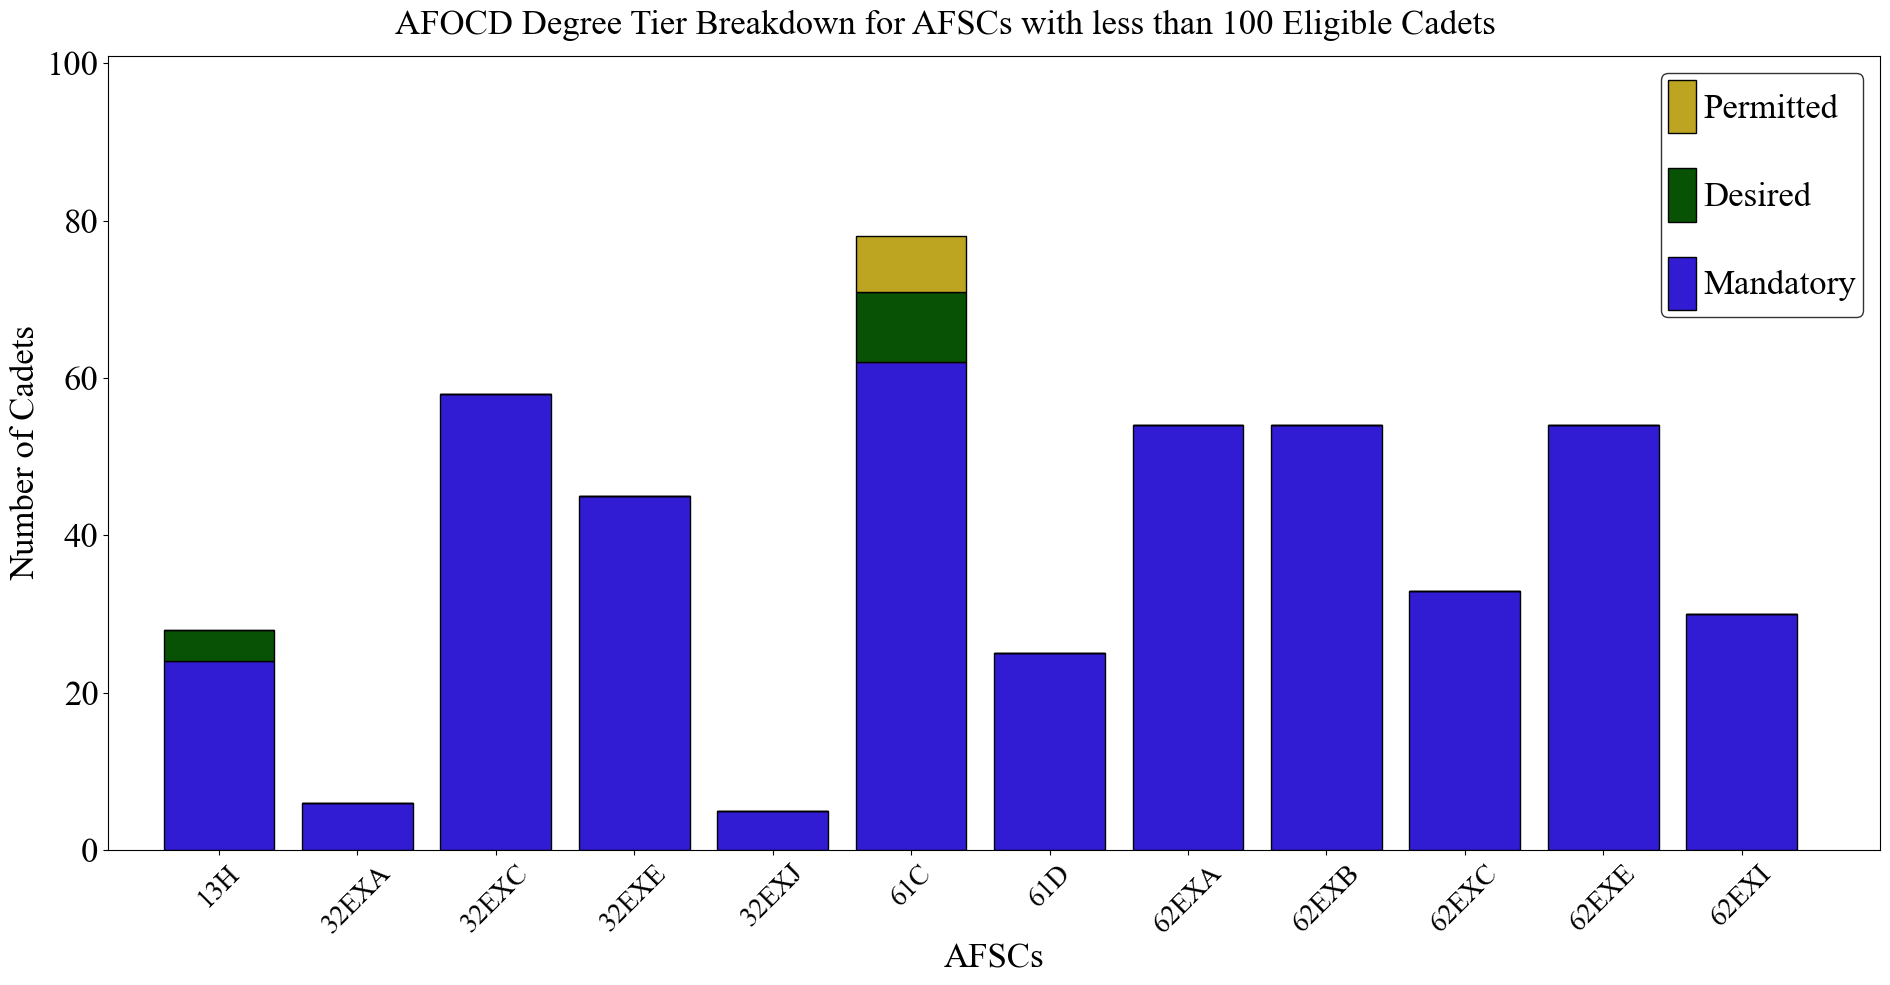

In [24]:
chart = instance.display_data_graph({"graph": 'AFOCD Data', "eligibility_limit": 100, "skip_afscs": False}) 

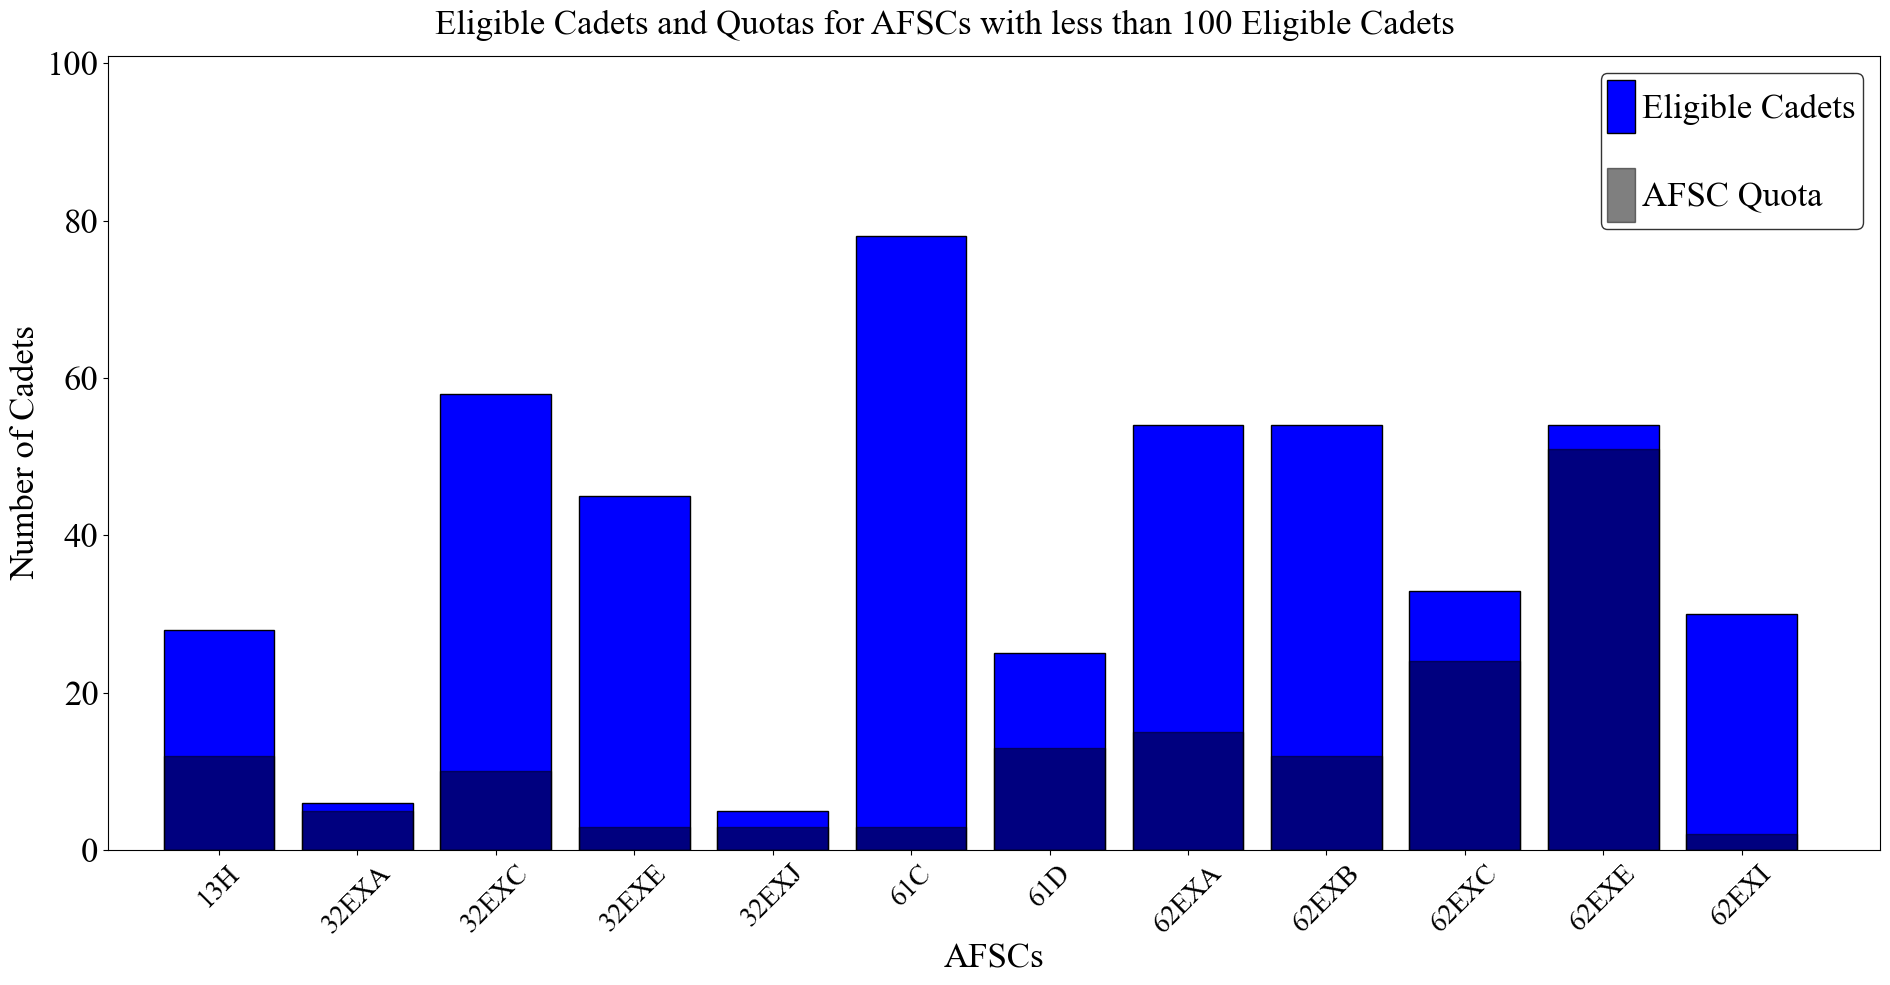

In [25]:
chart = instance.display_data_graph({"graph": 'Eligible Quota', "eligibility_limit": 100}) 

62EXE was a problem, so we had to reduce the target for that AFSC!

#### Source Code Walkthrough

Now that I've shown what you can do with the parameters that you've loaded in, I'm going to show you how they get there in the first place. The line "instance = CadetCareerProblem('2023b')" does a lot of things up front. The class object is defined in the "problem_class.py" script which is located in the afccp/core/ directory. I did my best to try to show where everything is located using the full python module names (ie. afccp.core.problem_class = afccp/core/problem_class.py) All throughout the code you will see functions defined using the full location to try to help you understand where everything is. 

If we open up problem_class.py, we will see the class defined. Let's look at its "__init__" function, which is what gets executed when we define a problem instance.

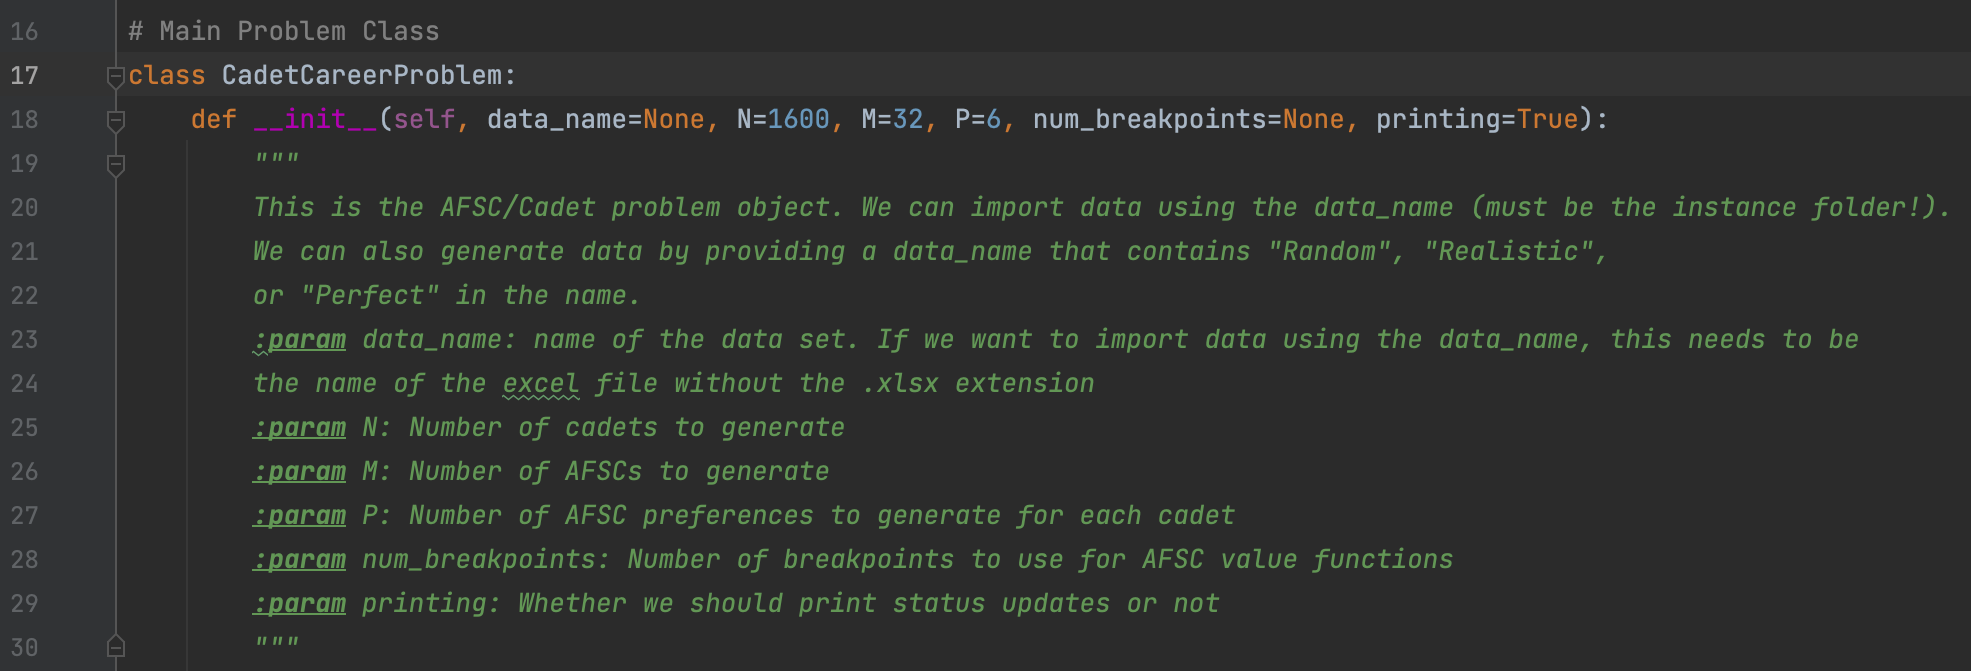

In [26]:
Image(filename='assets/pic2.png')

Essentially, when we create a problem instance we can do one of two things: import an already existing instance, or generate a new one. The "data_name" function parameter determines which problem instance to import, or alternatively generate. All of these parameters are defined in the screenshot above. Let's press on through this initialization class method.

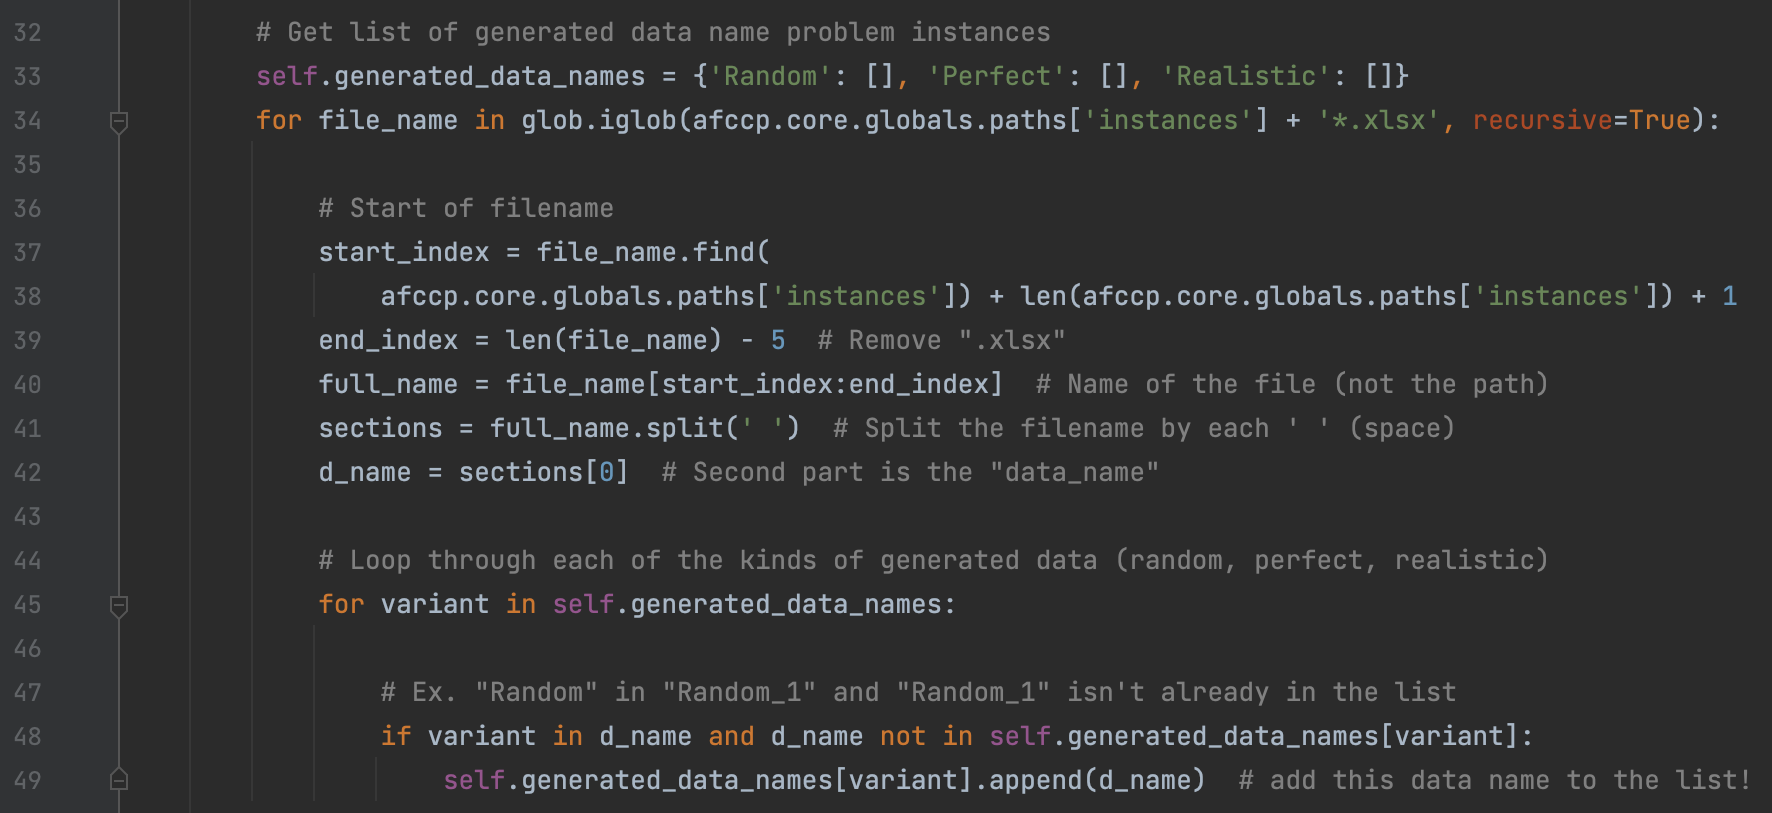

In [27]:
Image(filename='assets/pic3.png')

This block of code is here to gather lists of already existing problem instances that have been generated. There are three categories: "Random", "Realistic", and "Perfect". Random data is just that, fake cadets and AFSCs that have been generated randomly. Realistic data is a set of cadets that have been generated through CTGAN using realistic data distributions. Perfect data is my own thought experiment about generating cadets that perfectly align themselves with what the AFSCs want. The objective value of the best solution should theoretically be 1. 

Anyway, we loop through each file in the "instances" folder and check to see if it is a Random, Perfect, or Realistic dataset. We then add the file to the appropriate list. This will be used in the next block of code. Line 34 is an example of how I've included the module path in the name of a python object. "afccp.core.globals.paths" is a global variable that is defined in the globals.py script. It is a dictionary of folder paths within the directory. I did this so that you would see where the variable or function is located for reference. 

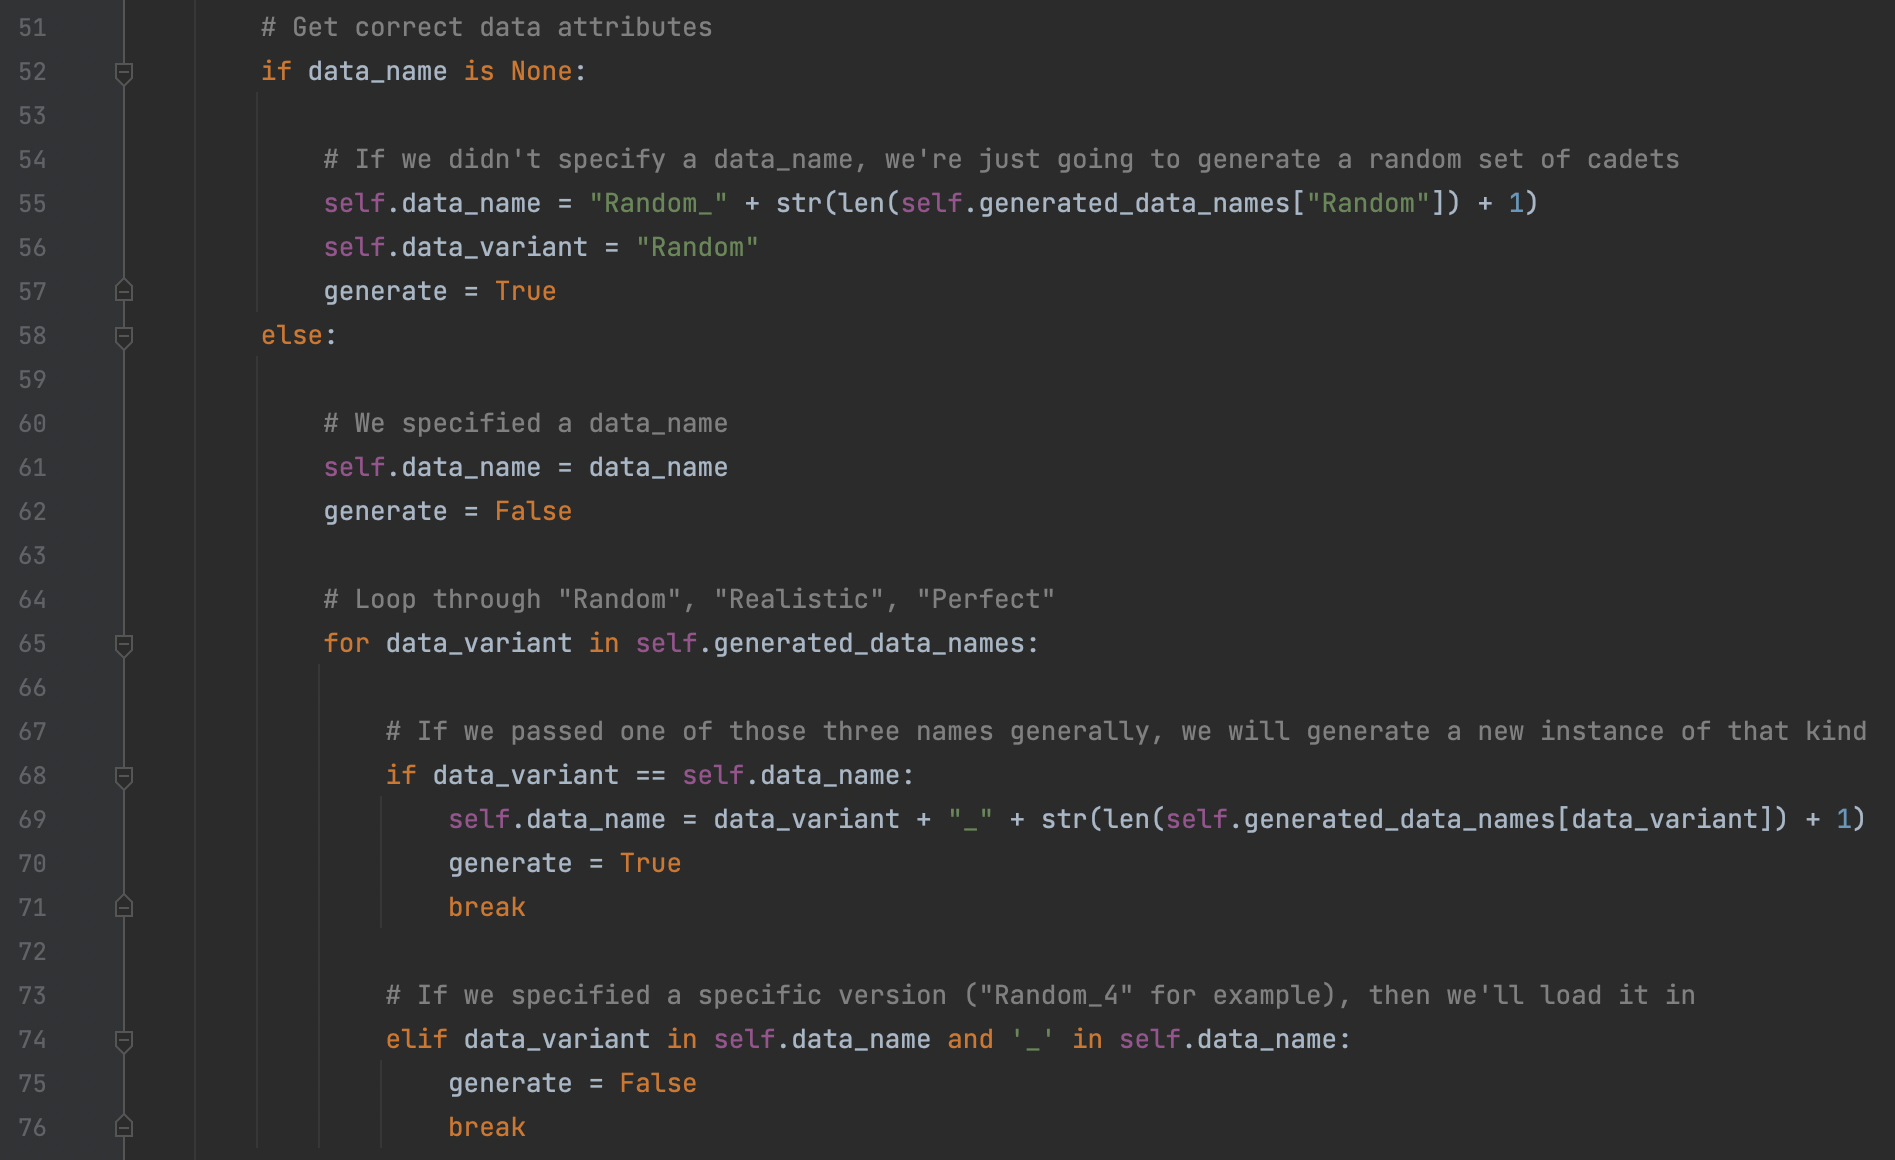

In [28]:
Image(filename='assets/pic4.png')

This block of code does two things: determine the "name" of the dataset and whether or not we're generating new data. Lines 52-57 are what happens by default if we don't pass a name of a problem instance. We generate random data. The reason why we put all of the generated data names into their appropriate lists was to determine how many of each kind of generated datasets we have. If we already have 4 "Random" data files, then this new one will be "Random_5", for example. 

The "else" statement handles the situation where we did pass a data name. By default, we assume it's an imported dataset. We then loop through each kind of generated data and determine if this dataset fits one of those categories. If it does, we then determine whether we're importing a pre-existing generated dataset, or we're creating a new one.

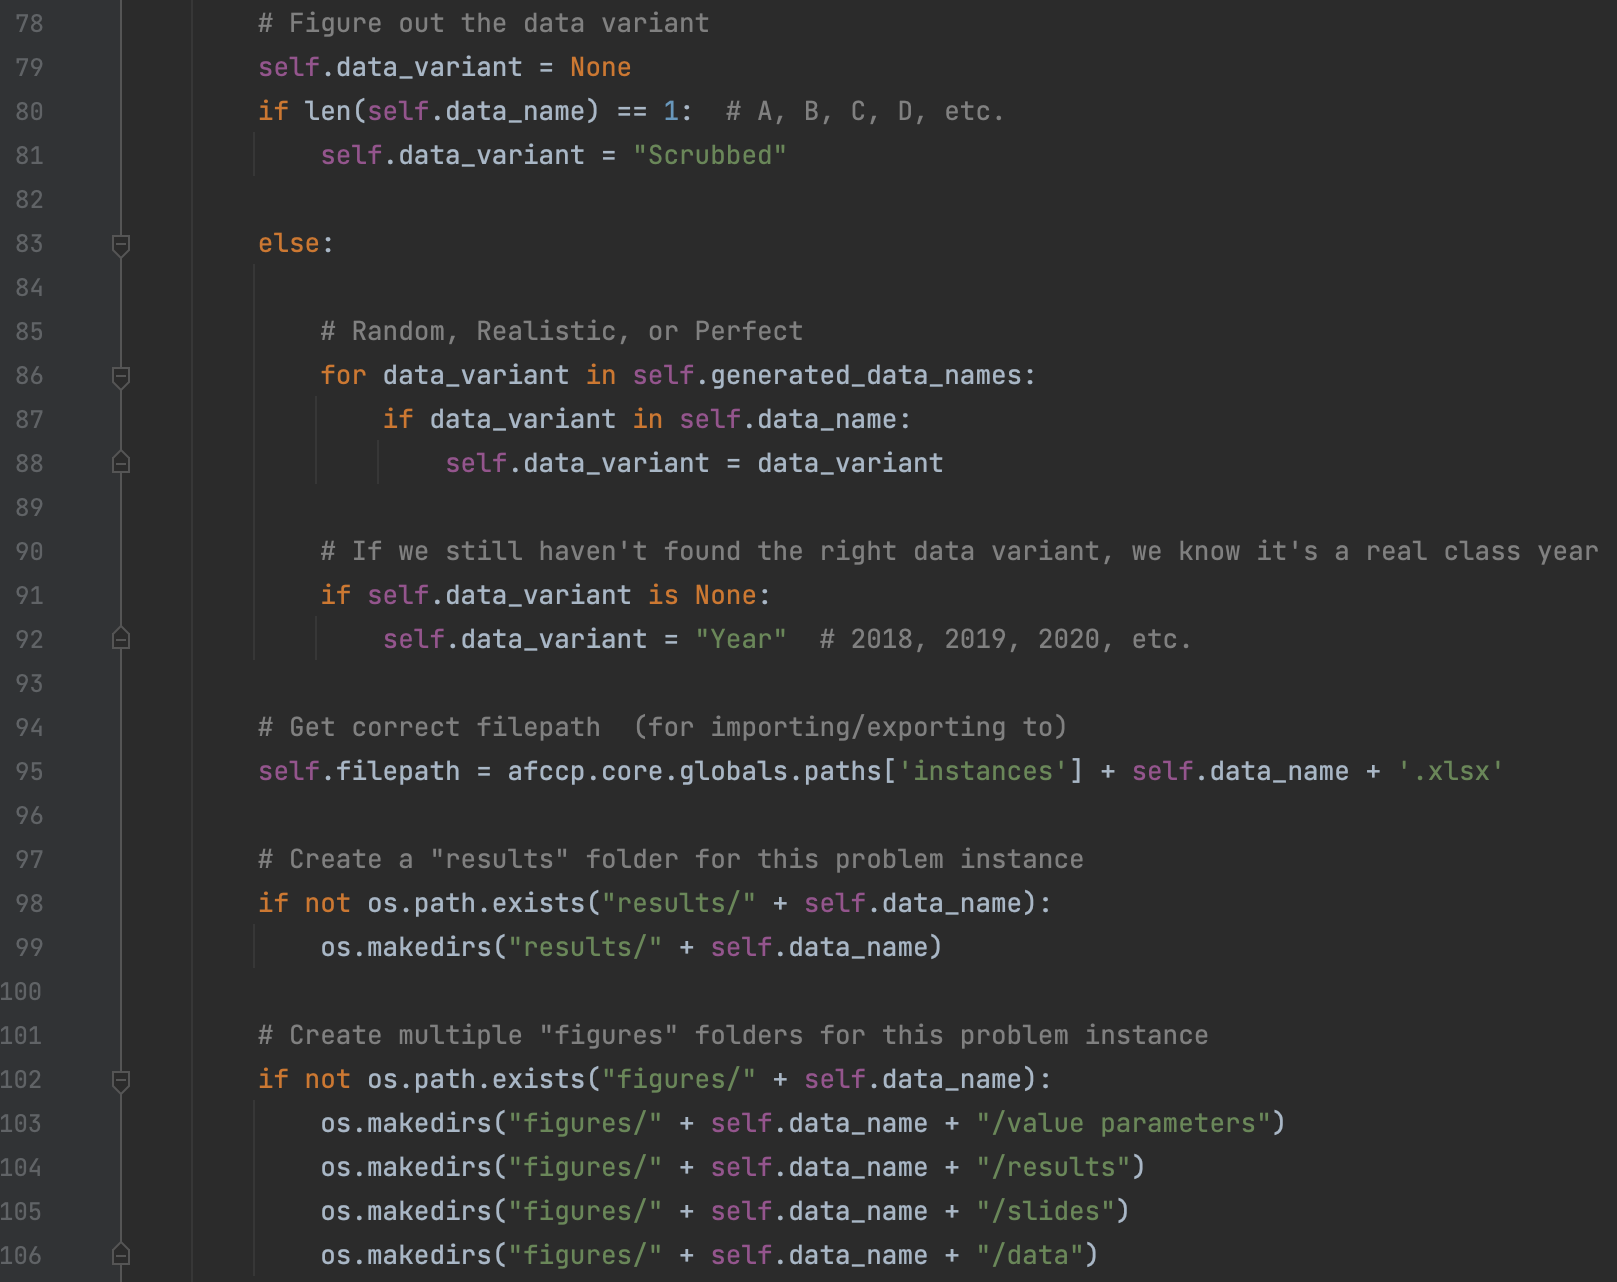

In [29]:
Image(filename='assets/pic5.png')

Lines 78-92 are here to determine the "variant" of the data. The five options are "Scrubbed", "Year", "Random", "Realistic", and "Perfect". This helps indicate differences in what we'd expect the data to look like for various areas throughout the code. Lines 98-106 create new subfolders corresponding to this particular problem instance if they haven't already been created. Lines 108-127 simply initialize many different attributes of the CadetCareerProblem class and therefore I didn't include a screenshot here.

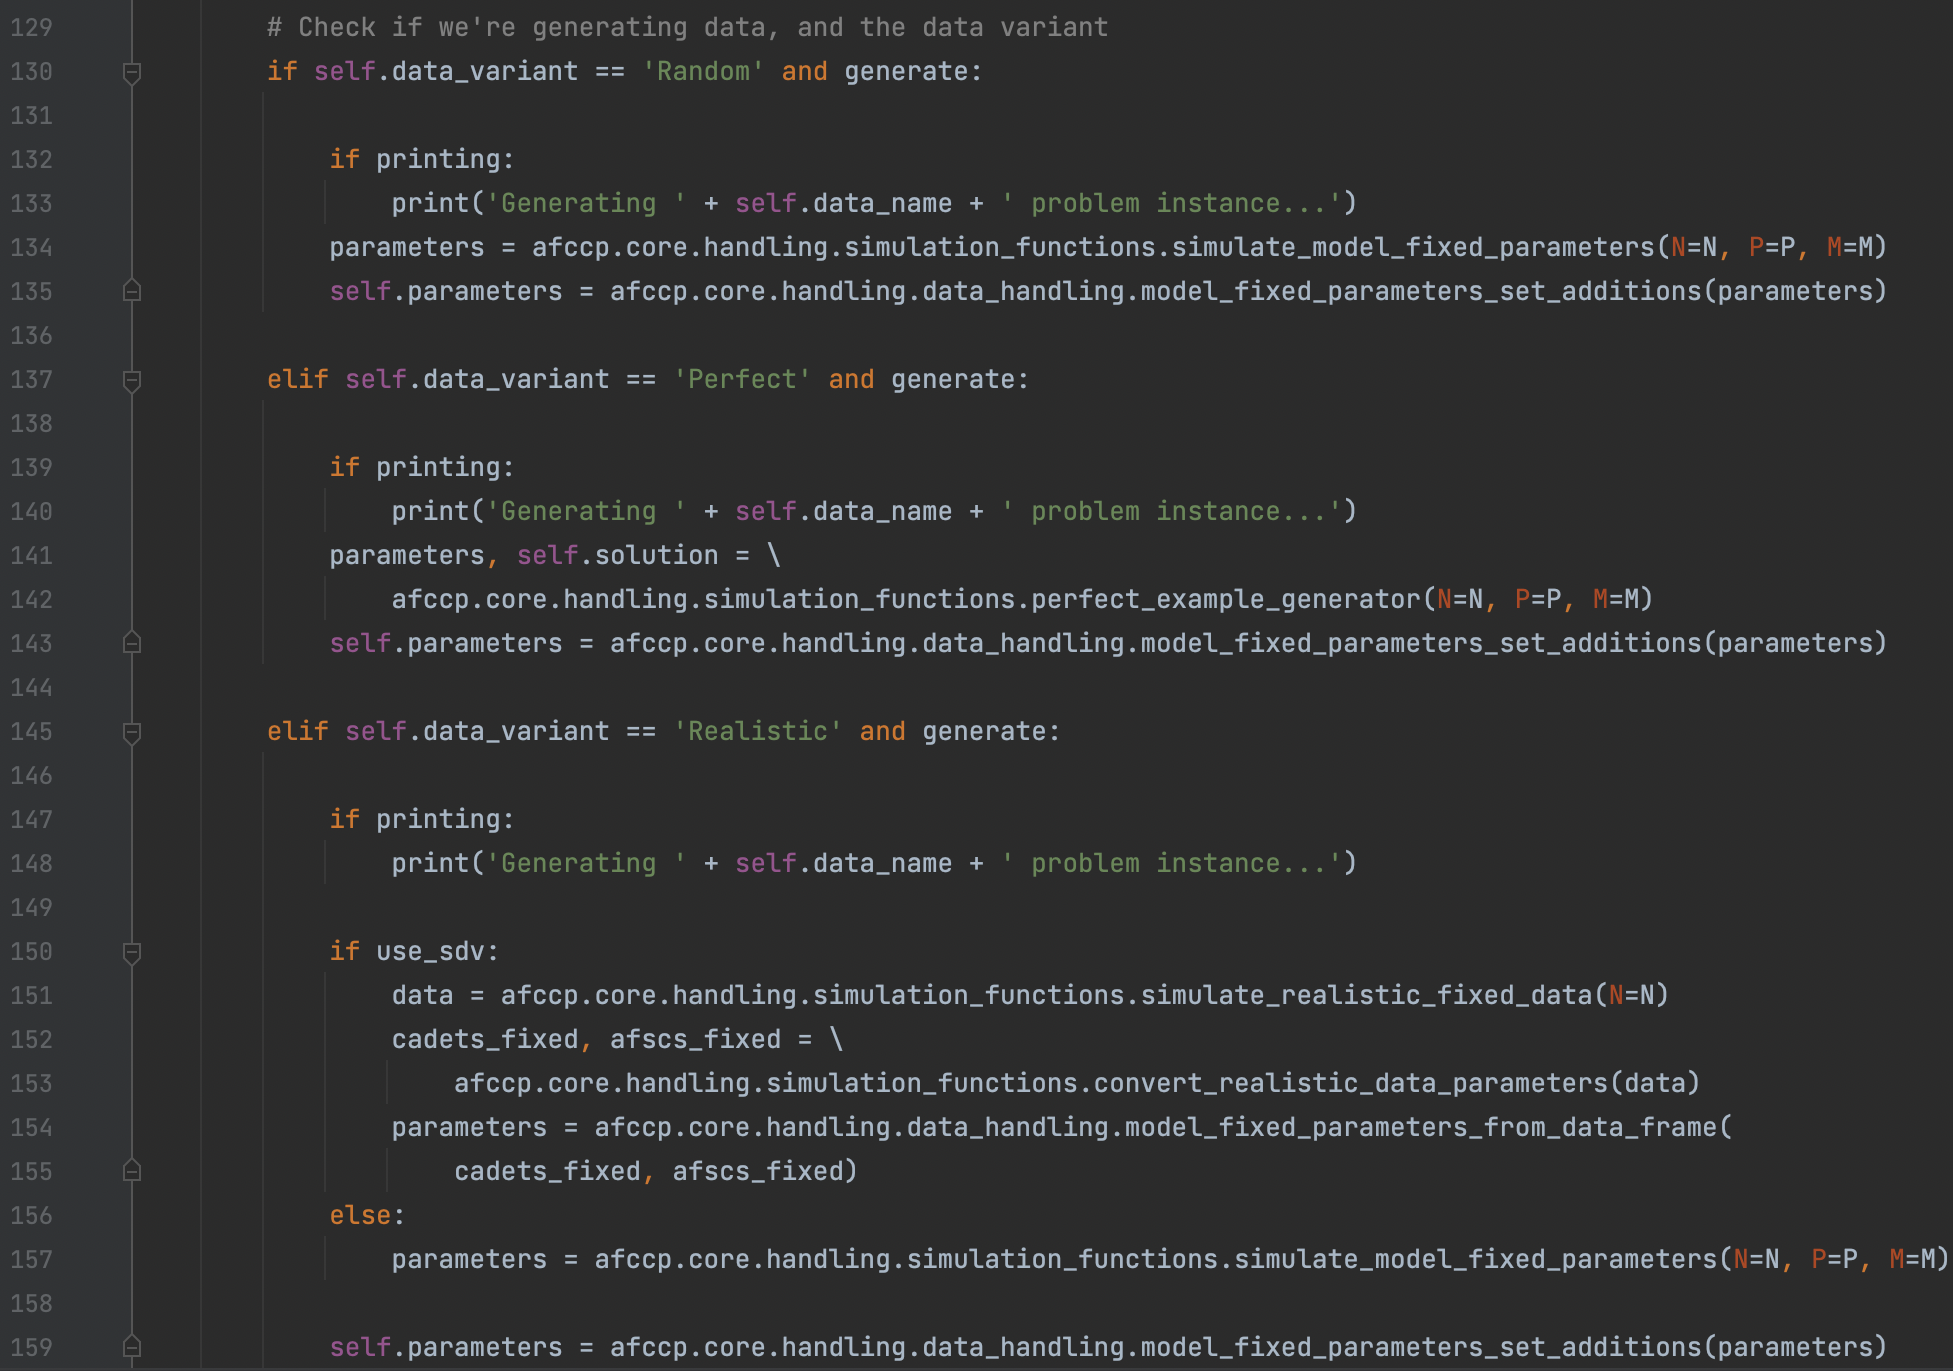

In [30]:
Image(filename='assets/pic6.png')

This block of code is where we actually generate the data. Again, I've included the full module name of the functions to show where the functions are defined. If you want to look further into the code that generates the parameters, you're welcome to do so!

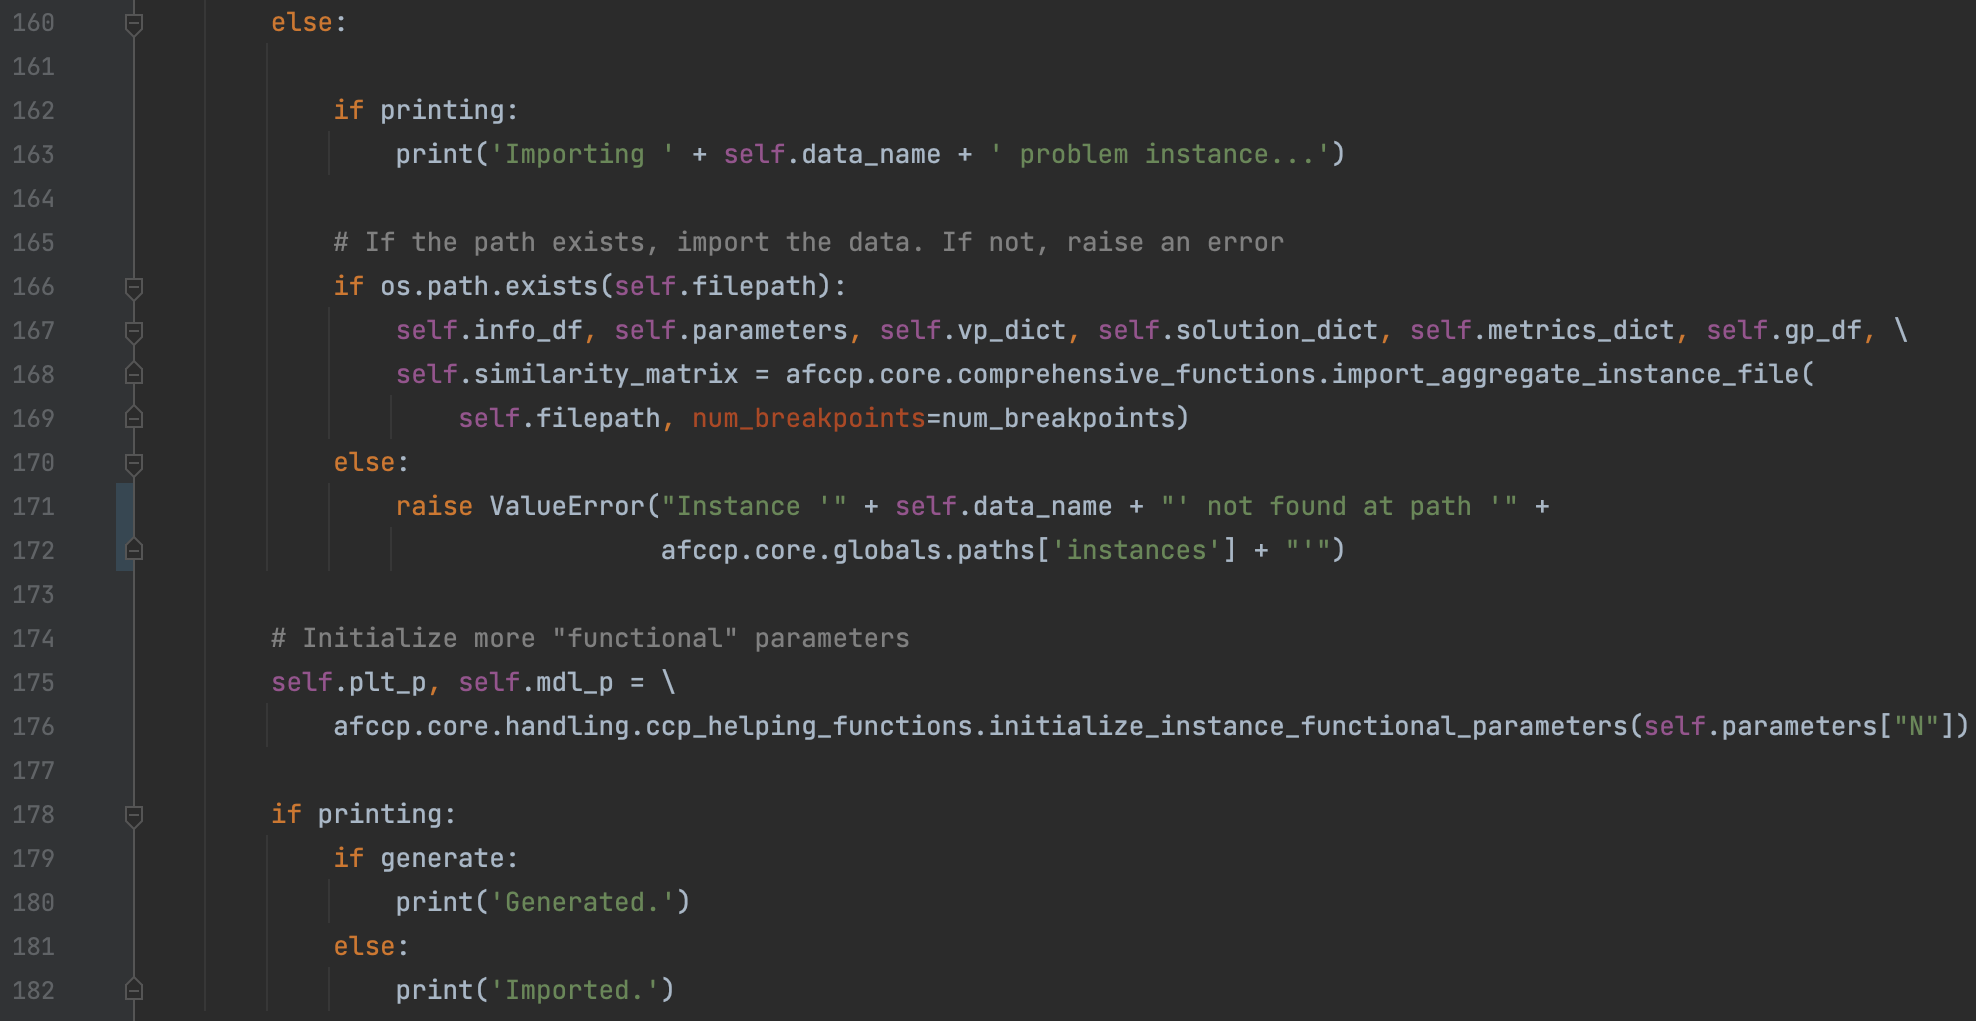

In [31]:
Image(filename='assets/pic7.png')

If we're not generating data, then we're importing it. Lines 160-172 contain the "else" statement that imports the data from excel. I included some error handling to ensure that there is a file with the "data_name" you specified in the instances folder. Lines 174-176 grab some more class parameters that are initialized in the "ccp_helping_functions.py" script. The attribute "plt_p" is a dictionary of parameters controlling the various plots/graphs that you can create (things like color, size, legend, etc.). Alternatively, "mdl_p" is a dictionary of parameters controlling how you solve the various models to find solutions (things like solve time, solver used, genetic algorithm hyper parameters, etc.)

Now that you know a little bit about how the code is all set up, feel free to explore whatever other functions you want to see how they all work. I will continue with the other components needed to get this code/model to work properly!

### Value Parameters

#### Data Explanation

The next thing we need to do is generate our "value parameters". These are the things that the analyst (but eventually the other decision makers hopefully) can control. These are all the various objectives, weights, constraints, and value functions. I have excel sheets that contain the defaults for generating these different components. These "default value parameter" excel sheets are located in the support folder. This excel file should be where you make all of your initial adjustments to the value parameters for a new class year. Let's import the various dataframes to see what's going on here.

In [32]:
import openpyxl

# File path
filepath = dir_path + "support/Value_Parameters_Defaults_2023b.xlsx"

# Load workbook and get sheet names
wb = openpyxl.load_workbook(filepath)
sheet_names = wb.sheetnames

# Load in dataframes 
dfs = {}
for sheet_name in sheet_names:
    dfs[sheet_name] = pd.read_excel(filepath, sheet_name=sheet_name)

The above code just loads in each of the excel sheets into a pandas dataframe.

In [33]:
dfs["Overall Weights"]

Cadets Overall  AFSCs Overall  AFSCs Min Value  Cadets Min Value  \
0             0.7            0.3                0                 0   

  Cadet Weight Function AFSC Weight Function USAFA-Constrained AFSCs  \
0               Curve_1               Custom      35P, 38F, 64P, 65F   

   Similarity Constraint  Cadets Top 3 Constraint  
0                    NaN                      NaN

The "Overall Weights" df contains the overall weights on Cadets/AFSCs, the minimum overall values on Cadets/AFSCs, the weight functions for the individual weights on Cadets/AFSCs, and the USAFA-Constrained AFSCs. To see a list of all the weight functions for both cadets and AFSCs, look at their respective functions on the "value_parameter_handling.py" script in the "afccp/core/handling" directory. A "custom" AFSC weight function means that we will use the AFSC weights that are explicitly defined in the next dataframe. The USAFA-Constrained AFSCs are the ones that the SecAF has stated must have a limit on the USAFA cadets accessed. As it stands the constraint is as follows: No more than 5% of the total USAFA class may be collectively assigned to these four AFSCs. Don't worry about the similarity constraint, that may come into play later on.

In [34]:
dfs["AFSC Weights"]

AFSC  AFSC Swing Weight  AFSC Min Value
0     13H               6.42               0
1     13M               6.44               0
2     13N             100.00               0
3     14F               6.42               0
4     14N              83.33               0
5     15A              20.00               0
6     15W               6.46               0
7     17X              83.32               0
8     21A              21.82               0
9     21M              30.00               0
10    21R               8.19               0
11    31P               6.48               0
12  32EXA               6.41               0
13  32EXC               6.42               0
14  32EXE               6.41               0
15  32EXF               6.41               0
16  32EXG               6.67               0
17  32EXJ               6.41               0
18    35P               6.43               0
19    38F              21.82               0
20    61C               6.41               0
21    61D               6.42               0
22  62EXA               6.43               0
23  62EXB               6.42               0
24  62EXC               6.44               0
25  62EXE               8.58               0
26  62EXG               6.52               0
27  62EXH               6.42               0
28  62EXI               6.41               0
29    63A              30.00               0
30    64P              20.00               0
31    65F              10.00               0

If we selected "Custom" for the AFSC weight function in the Overall Weights df, then we will use these weights for each of the AFSCs. This was to ensure 13N got some special attention. Don't worry about the min values for the AFSCs, we never actually constrain them. 

In [35]:
dfs["AFSC Objective Weights"]

AFSC  Norm Score      Merit  USAFA Proportion  Combined Quota  \
0     13H           0  30.000001          0.000000             100   
1     13M           0  30.000000          0.000000             100   
2     13N           0  90.000000         20.000000             100   
3     14F           0  29.999998          0.000000             100   
4     14N           0  30.000000         20.000000             100   
5     15A           0  30.000000          0.000000             100   
6     15W           0  30.000002          0.000000             100   
7     17X           0  30.000000         20.000000             100   
8     21A           0  30.000001         19.999999             100   
9     21M           0  80.000000          0.000000             100   
10    21R           0  30.000002         20.000001             100   
11    31P           0  30.000000          0.000000             100   
12  32EXA           0  29.999999          0.000000             100   
13  32EXC           0  30.000000          0.000000             100   
14  32EXE           0  30.000000          0.000000             100   
15  32EXF           0  30.000000          0.000000             100   
16  32EXG           0  30.000000         20.000001             100   
17  32EXJ           0  29.999999          0.000000             100   
18    35P           0  29.999998          0.000000             100   
19    38F           0  29.999999          0.000000             100   
20    61C           0  29.999999          0.000000             100   
21    61D           0  30.000000          0.000000             100   
22  62EXA           0  29.999999          0.000000             100   
23  62EXB           0  30.000000          0.000000             100   
24  62EXC           0  29.999999          0.000000             100   
25  62EXE           0  29.999999          5.000001             100   
26  62EXG           0  29.999999          0.000000             100   
27  62EXH           0  29.999999          0.000000             100   
28  62EXI           0  29.999999          0.000000             100   
29    63A           0  29.999999         20.000001             100   
30    64P           0  29.999999          0.000000             100   
31    65F           0  30.000000          0.000000             100   

    USAFA Quota  ROTC Quota  Mandatory    Desired  Permitted    Utility  Male  \
0             0           0  89.999999  50.000000   0.000000   4.999999   0.0   
1             0           0   0.000000  70.000000  30.000000   4.999999   0.0   
2             0           0  90.000000   0.000000  30.000000  30.000000   0.0   
3             0           0  89.999998  49.999998  29.999998   4.999999   0.0   
4             0           0  90.000000  50.000000  30.000000   5.000002   0.0   
5             0           0  90.000002  50.000002  30.000000  40.000001   0.0   
6             0           0  90.000002   0.000000  30.000002   5.000000   0.0   
7             0           0  90.000000  70.000000  30.000000  20.000000   0.0   
8             0           0   0.000000  50.000000  30.000001  40.000002   0.0   
9             0           0   0.000000  70.000002  30.000002  20.000000   0.0   
10            0           0   0.000000  70.000001  30.000002   5.000000   0.0   
11            0           0   0.000000  70.000000  30.000000   4.999999   0.0   
12            0           0  90.000000   0.000000   0.000000   5.000000   0.0   
13          100           0  90.000000   0.000000   0.000000   5.000002   0.0   
14            0           0  90.000001   0.000000   0.000000   5.000001  70.0   
15          100           0  90.000000   0.000000   0.000000   5.000002   0.0   
16            0           0  70.000000  70.000000   0.000000   5.000001   0.0   
17            0           0  90.000000   0.000000   0.000000   5.000000   0.0   
18            0           0  89.999998  49.999998  29.999998   4.999999   0.0   
19            0           0  90.000001  59.999999  29.999999  40.000001   

Here are the objective weights for each AFSC for each objective. Like the previous df, these are swing weights that will be scaled for each AFSC so that they sum to 1. The "Norm Score" objective is the new one that incorporates AFSC preference lists and could essentially replace all the others (except quota). USAFA proportion right now only applies to the large AFSCs, and the USAFA/ROTC quota objectives were just for some of the smaller AFSCs to ensure that each of them got some USAFA cadets or ROTC cadets depending on what they requested. The AFOCD objectives (Mandatory, Desired, Permitted) must be checked against the new AFOCD! These are current as of April 2022. If an AFSC changes their tier, make sure to reflect that here. Some of them are zero'd out because that AFSC doesn't have that particular requirement level. Utility is cadet preference! Don't worry about Male/Minority objectives (32EXE needed one female-> that's why it had a non-zero weight)

In [36]:
dfs["AFSC Objective Targets"]

AFSC  Norm Score     Merit  USAFA Proportion  Combined Quota  \
0     13H           1  0.501835          0.325426              12   
1     13M           1  0.501835          0.325426              27   
2     13N           1  0.501835          0.260756             180   
3     14F           1  0.501835          0.325426               8   
4     14N           1  0.501835          0.260756             195   
5     15A           1  0.501835          0.325426              70   
6     15W           1  0.501835          0.325426              34   
7     17X           1  0.501835          0.260756             185   
8     21A           1  0.501835          0.260756              92   
9     21M           1  0.501835          0.325426              29   
10    21R           1  0.501835          0.260756              67   
11    31P           1  0.501835          0.325426              35   
12  32EXA           1  0.501835          0.000000               5   
13  32EXC           1  0.501835          0.325426              10   
14  32EXE           1  0.501835          1.000000               3   
15  32EXF           1  0.501835          0.000000               5   
16  32EXG           1  0.501835          0.260756              60   
17  32EXJ           1  0.501835          0.325426               3   
18    35P           1  0.501835          0.000000              22   
19    38F           1  0.501835          0.281924              92   
20    61C           1  0.501835          0.325426               3   
21    61D           1  0.501835          0.325426              13   
22  62EXA           1  0.501835          0.325426              15   
23  62EXB           1  0.501835          0.325426              12   
24  62EXC           1  0.501835          0.325426              24   
25  62EXE           1  0.501835          0.260756              60   
26  62EXG           1  0.501835          0.325426              48   
27  62EXH           1  0.501835          0.325426              24   
28  62EXI           1  0.501835          1.000000               2   
29    63A           1  0.501835          0.260756              95   
30    64P           1  0.501835          0.281924              75   
31    65F           1  0.501835          0.000000              37   

    USAFA Quota  ROTC Quota  Mandatory  Desired  Permitted  Utility      Male  \
0             0           0       0.90     0.10       0.00        1  0.720000   
1             0           0       0.00     0.80       0.20        1  0.720000   
2             0           0       0.10     0.00       0.90        1  0.720000   
3             0           0       0.70     0.15       0.15        1  0.720000   
4             0           0       0.75     0.20       0.05        1  0.720000   
5             0           0       0.65     0.25       0.10        1  0.720000   
6             0           0       0.60     0.00       0.40        1  0.720000   
7             0           0       0.70     0.20       0.10        1  0.720000   
8             0           0       0.00     0.75       0.25        1  0.720000   
9             0           0       0.00     0.80       0.20        1  0.720000   
10            0           0       0.00     0.80       0.20        1  0.720000   
11            0           0       0.00     0.80       0.20        1  0.720000   
12            0           0       1.00     0.00       0.00        1  0.720000   
13            2           0       1.00     0.00       0.00        1  0.720000   
14            0           0       1.00     0.00       0.00        1  0.656454   
15            1           0       1.00     0.00       0.00        1  0.720000   
16            0           0       0.80     0.20       0.00        1  0.720000   
17            0           0       1.00     0.00       0.00        1  0.720000   
18            0           0       0.70     0.20       0.10        1  0.720000   
19            0           0       0.20     0.65       0.15        1  0.720000   
20            0           

This df displays the target measure for each of the objectives. Ideally, this is what the objective measures should be. This doesn't really matter a whole lot except for the AFOCD objectives. Again, make sure this matches what the actual AFOCD says! These are the target proportions for each tier for each AFSC. Where there is a 0, there should also be a 0 in the objective weights slot. 

In [37]:
dfs["AFSC Objective Min Value"]

AFSC  Norm Score    Merit USAFA Proportion Combined Quota USAFA Quota  \
0     13H           0  0.35, 5                0         10, 14           0   
1     13M           0  0.35, 5                0         19, 28           0   
2     13N           0  0.39, 5        0.15, 0.4       162, 210           0   
3     14F           0  0.35, 5                0           7, 9           0   
4     14N           0  0.35, 5        0.15, 0.4       195, 210           0   
5     15A           0  0.35, 5                0         60, 72           0   
6     15W           0  0.35, 5                0         25, 50           0   
7     17X           0  0.35, 5        0.15, 0.4       181, 193           0   
8     21A           0  0.35, 5        0.15, 0.4         84, 92           0   
9     21M           0  0.35, 5                0         29, 38           0   
10    21R           0  0.35, 5        0.15, 0.4         61, 68           0   
11    31P           0  0.35, 5                0         29, 35           0   
12  32EXA           0  0.35, 5                0           3, 6           0   
13  32EXC           0  0.35, 5                0          7, 10       2, 10   
14  32EXE           0  0.35, 5                0           3, 6           0   
15  32EXF           0  0.35, 5                0           3, 5        1, 5   
16  32EXG           0  0.35, 5        0.15, 0.4         42, 60           0   
17  32EXJ           0  0.35, 5                0           3, 5           0   
18    35P           0  0.35, 5                0         18, 22           0   
19    38F           0  0.35, 5                0         84, 92           0   
20    61C           0  0.35, 5                0           1, 3           0   
21    61D           0  0.35, 5                0         13, 14           0   
22  62EXA           0  0.35, 5                0         15, 30           0   
23  62EXB           0  0.35, 5                0         12, 24       4, 24   
24  62EXC           0  0.35, 5                0         24, 40           0   
25  62EXE           0  0.35, 5                0        51, 126           0   
26  62EXG           0  0.35, 5                0         34, 48           0   
27  62EXH           0  0.35, 5                0         12, 24           0   
28  62EXI           0  0.35, 5                0           2, 4           0   
29    63A           0  0.35, 5        0.15, 0.4         69, 95           0   
30    64P           0  0.35, 5                0         50, 75           0   
31    65F           0  0.35, 5                0         34, 37           0   

   ROTC Quota  Mandatory    Desired Permitted    Utility    Male  Minority  
0           0     0.9, 5     0.1, 5         0          0       0         0  
1           0          0   0.789, 5         0          0       0         0  
2           0     0.1, 5          0         0  0.4945, 5       0         0  
3           0     0.7, 5    0, 0.15         0          0       0         0  
4           0  0.7475, 5     0.2, 5         0          0       0         0  
5           0    0.65, 5    0, 0.25    0, 0.1          0       0         0  
6           0   0.588, 5          0         0          0       0         0  
7           0    0.69, 5     0, 0.2         0          0       0         0  
8           0          0    0.75, 5         0          0       0         0  
9           0          0     0.8, 5         0          0       0         0  
10          0          0     0.8, 5         0          0       0         0  
11          0          0   0.685, 5         0          0       0         0  
12          0       1, 5          0         0          0       0         0  
13          0       1, 5          0         0          0       0         0  
14          0       1, 5          0         0          0  0, 0.8         0  
15          0       1, 5          0         0          0       0         0  
16          0     0.8, 5     0, 0.2         0          0       0         0  
17          0       1, 5          0         

These are the constraints for each objective for each AFSC. Most are determined automatically based on the "fixed" data. For example, the Combined Quota constraint is determined by the "Min, Max" values in "AFSCs_Fixed". The USAFA Proportion objective constraint should match the weight (if there is a zero in one, there is a zero in the other). I constrained Utility for 13N and I ensured 32EXE had one female. Here is another place where AFOCD matters! Make sure the constraints match the targets! This is the place where you should list all the potential constraints that you'd have (this doesn't toggle them on/off however, that's the next dataframe). 

In [38]:
dfs["Constraint Type"]

AFSC  Norm Score  Merit  USAFA Proportion  Combined Quota  USAFA Quota  \
0     13H           0      4                 0               4            0   
1     13M           0      4                 0               4            0   
2     13N           0      4                 4               4            0   
3     14F           0      4                 0               4            0   
4     14N           0      4                 4               4            0   
5     15A           0      4                 0               4            0   
6     15W           0      4                 0               4            0   
7     17X           0      4                 4               4            0   
8     21A           0      4                 4               4            0   
9     21M           0      4                 0               4            0   
10    21R           0      4                 4               4            0   
11    31P           0      4                 0               4            0   
12  32EXA           0      4                 0               4            0   
13  32EXC           0      4                 0               4            4   
14  32EXE           0      4                 0               4            0   
15  32EXF           0      4                 0               4            4   
16  32EXG           0      4                 4               4            0   
17  32EXJ           0      4                 0               4            0   
18    35P           0      4                 0               4            0   
19    38F           0      4                 0               4            0   
20    61C           0      4                 0               4            0   
21    61D           0      4                 0               4            0   
22  62EXA           0      4                 0               4            0   
23  62EXB           0      4                 0               4            4   
24  62EXC           0      4                 0               4            0   
25  62EXE           0      4                 0               4            0   
26  62EXG           0      4                 0               4            0   
27  62EXH           0      4                 0               4            0   
28  62EXI           0      4                 0               4            0   
29    63A           0      4                 4               4            0   
30    64P           0      4                 0               4            0   
31    65F           0      4                 0               4            0   

    ROTC Quota  Mandatory  Desired  Permitted  Utility  Male  Minority  
0            0          4        0          0        0     0         0  
1            0          0        3          0        0     0         0  
2            0          4        0          0        4     0         0  
3            0          4        0          0        0     0         0  
4            0          4        3          0        0     0         0  
5            0          4        4          4        0     0         0  
6            0          4        0          0        0     0         0  
7            0          4        0          0        0     0         0  
8            0          0        0          0        0     0         0  
9            0          0        3          0        0     0         0  
10           0          0        3          0        0     0         0  
11           0          0        3          0        0     0         0  
12           0          4        0          0        0     0         0  
13           0          4        0          0        0     0         0  
14           0          4        0          0        0     4         0  
15           0          4        0          0        0     0         0  
16           0          4        0          0        0     0         0  
17           0          4        0          0        0     0         0  
18        

Here is where you actually turn different constraints on or off. If there is a 0, the constraint is turned off. 1s and 2s related to "value" constraints instead of "measure" constraints and I ultimately decided against using them for a number of reasons. The only ones you should be playing with are 3s and 4s. A "3" is an "approximate" constraint. This means that the denominator is the PGL target for an AFSC, not the actual number of cadets assigned. If this is confusing, please reference my thesis or my slides that talk about the difference between the Approximate Model and the Exact Model. The "4", therefore, is an "exact" constraint. The only place where we could legimately use a "3" instead of a "4" is for the AFOCD constraints. 

Example: Let's say 14N wants 70% of their cadets to have mandatory-tiered degrees. Let's say the PGL is 190 and we assign 220 cadets. A "3" constraint is a less restrictive constraint, and would ensure that 133 cadets (190 * 0.70) have "M" degrees. Alternatively, a "4" constraint ensures the actual proportion gets constrained, so 154 cadets (220 * 0.70) will have "M" degrees. Sometimes it is really hard to meet the AFOCD for some AFSCs, and so a "3" constraint is necessary to ensure we meet the target based on the PGL, not the actual number of cadets.

In [39]:
dfs["Value Functions"]

AFSC          Norm Score                Merit  \
0     13H  Min Increasing|0.3  Min Increasing|-0.3   
1     13M  Min Increasing|0.3  Min Increasing|-0.3   
2     13N  Min Increasing|0.3  Min Increasing|-0.3   
3     14F  Min Increasing|0.3  Min Increasing|-0.3   
4     14N  Min Increasing|0.3  Min Increasing|-0.3   
5     15A  Min Increasing|0.3  Min Increasing|-0.3   
6     15W  Min Increasing|0.3  Min Increasing|-0.3   
7     17X  Min Increasing|0.3  Min Increasing|-0.3   
8     21A  Min Increasing|0.3  Min Increasing|-0.3   
9     21M  Min Increasing|0.3  Min Increasing|-0.3   
10    21R  Min Increasing|0.3  Min Increasing|-0.3   
11    31P  Min Increasing|0.3  Min Increasing|-0.3   
12  32EXA  Min Increasing|0.3  Min Increasing|-0.3   
13  32EXC  Min Increasing|0.3  Min Increasing|-0.3   
14  32EXE  Min Increasing|0.3  Min Increasing|-0.3   
15  32EXF  Min Increasing|0.3  Min Increasing|-0.3   
16  32EXG  Min Increasing|0.3  Min Increasing|-0.3   
17  32EXJ  Min Increasing|0.3  Min Increasing|-0.3   
18    35P  Min Increasing|0.3  Min Increasing|-0.3   
19    38F  Min Increasing|0.3  Min Increasing|-0.3   
20    61C  Min Increasing|0.3  Min Increasing|-0.3   
21    61D  Min Increasing|0.3  Min Increasing|-0.3   
22  62EXA  Min Increasing|0.3  Min Increasing|-0.3   
23  62EXB  Min Increasing|0.3  Min Increasing|-0.3   
24  62EXC  Min Increasing|0.3  Min Increasing|-0.3   
25  62EXE  Min Increasing|0.3  Min Increasing|-0.3   
26  62EXG  Min Increasing|0.3  Min Increasing|-0.3   
27  62EXH  Min Increasing|0.3  Min Increasing|-0.3   
28  62EXI  Min Increasing|0.3  Min Increasing|-0.3   
29    63A  Min Increasing|0.3  Min Increasing|-0.3   
30    64P  Min Increasing|0.3  Min Increasing|-0.3   
31    65F  Min Increasing|0.3  Min Increasing|-0.3   

                                 USAFA Proportion  \
0   Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
1   Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
2   Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
3   Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
4   Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
5   Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
6   Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
7   Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
8   Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
9   Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
10  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
11  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
12                             Min Decreasing|0.3   
13  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
14                             Min Increasing|0.3   
15                             Min Decreasing|0.3   
16  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
17  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
18                             Min Decreasing|0.3   
19                             Min Decreasing|0.3   
20  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
21  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
22  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
23  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
24  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
25  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
26  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
27  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
28                             Min Increasing|0.3   
29  Balance|0.15, 0.15, 0.1, 0.08, 0.08, 0.1, 0.6   
30                             Min Decreasing|0.3   
31                             Min Decreasing|0.3   

                                 Combined Quota         USAFA Quota  \
0   Quota_Direct|0.07, 0.8, 1.2, 0.8, 0.9, 0.88  Min Increasing|0.1   
1                   Quota_Normal|0.2, 0.25, 0.2  Min Increasing|0.1   
2     Quota_Direct|0.07, 1.5, 1, 0.2, 0.7, 0.99  Min Increasing|0.1   
3    Quota_Direct|0.07, 0.5, 0.4, 0.2, 0.9, 0.8  Min Increasing|0.1   
4   Quota_Direct|0.07, 0.5, 0.8, 0.2, 0.9, 0.75  Min Increasing|0.1   
5      Quota_Direct|0.07, 0.4, 0.5, 1, 0.6, 0.

Here we have the value functions for each of the AFSC objectives. These definitely require some explaining. I've created my own terminology so that they can be generalized and constructed into actual value functions for each of the objectives. I have an excel file that outlines how these functions are created and what they look like (Value_Function_Builds.xlsx), but I will also detail them here. 

In [40]:
# I need to import this script
import afccp.core.handling.value_parameter_handling

Before you read this next section on the value functions, please look at my slides in "VFT_Model_Slides.pptx" (located in the docs folder). Navigate to the "Creating Value Functions" section (starts on slide 130), and just click through them. This is how I construct the value functions, and this should help your understanding of the different piece-wise "segments" used.

The purpose of the "vf_string" (Value Function string) is to construct the "segment_dict" (Segment Dictionary) which provides the coordinates for the main piece-wise value function segment breakpoints. As illustrated below, there are four "segments" of exponential functions that are pieced together using "breakpoints". There are therefore 5 breakpoints. For this example, they are at the coordinates (0, 0), (3, 0.5), (5, 1), (7, 0.5), and (10, 0). This would compose the "segment_dict"

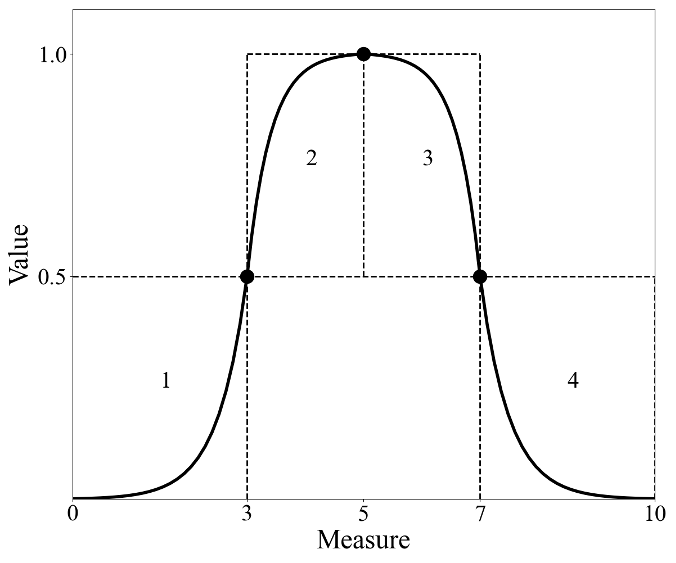

In [41]:
Image(filename='assets/pic8.png')

Let's illustrate the "Balance" value function. It takes several inputs pertaining to the "margins" and the $\rho$ parameters. Here is what it looks like:

vf_string $=$ "Balance|left_base_margin, right_base_margin, $\rho_1$, $\rho_2$, $\rho_3$, $\rho_4$, margin_y"

Honestly, you really don't need to worry about what these all mean. The only thing you should focus on is the $\rho$ ("rho") parameters. These control how steep each of the exponential segments are. Let's see an example. We'll first generate the "segment_dict" based on the "vf_string"

In [42]:
vf_string = "Balance|0.2, 0.2, 0.1, 0.08, 0.08, 0.1, 0.5"
target = 0.5
actual = 0.5
segment_dict = afccp.core.handling.value_parameter_handling.create_segment_dict_from_string(
    vf_string, target=target, actual=actual)
for segment in segment_dict:
    print(str(segment) + ":", segment_dict[segment])

1: {'x1': 0, 'y1': 0, 'x2': 0.3, 'y2': 0.5, 'rho': -0.1}
2: {'x1': 0.3, 'y1': 0.5, 'x2': 0.5, 'y2': 1, 'rho': 0.08}
3: {'x1': 0.5, 'y1': 1, 'x2': 0.7, 'y2': 0.5, 'rho': 0.08}
4: {'x1': 0.7, 'y1': 0.5, 'x2': 1, 'y2': 0, 'rho': -0.1}


Now we have our segment dictionary! We know what the coordinates for the main breakpoints are, so we can now generate all of the breakpoints to the full function. Let's calculate the x and y coordinates of our function's breakpoints.

In [43]:
x, y = afccp.core.handling.value_parameter_handling.value_function_builder(segment_dict=segment_dict, 
                                                                           num_breakpoints=20)
print("x:", x, "\n\n", "y:", y)

x: [0.   0.06 0.12 0.18 0.24 0.3  0.34 0.38 0.42 0.46 0.5  0.54 0.58 0.62
 0.66 0.7  0.76 0.82 0.88 0.94 1.  ] 

 y: [0.      0.00288 0.01245 0.04423 0.14973 0.5     0.8182  0.93527 0.97833
 0.99417 1.      0.99417 0.97833 0.93527 0.8182  0.5     0.14973 0.04423
 0.01245 0.00288 0.     ]


Now we plot our value function!

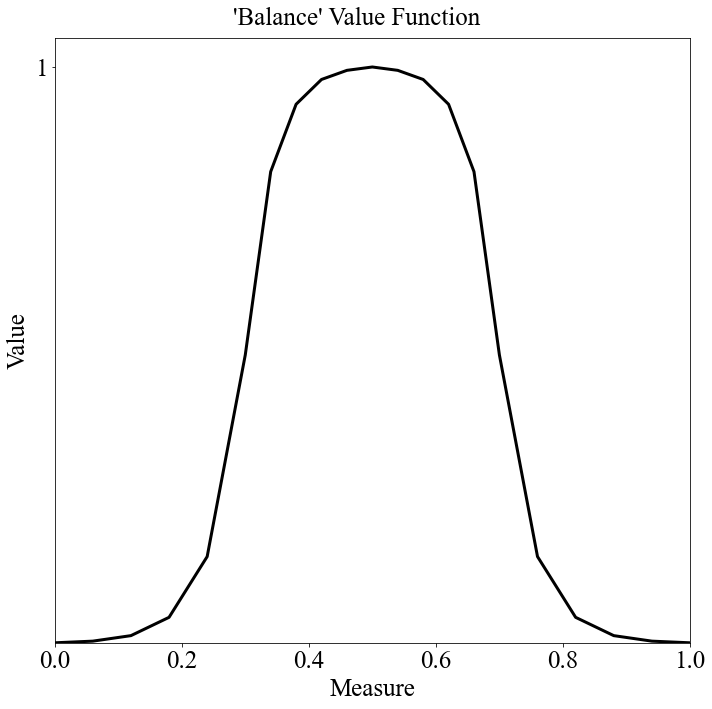

In [44]:
import afccp.core.visualizations.instance_graphs
chart = afccp.core.visualizations.instance_graphs.value_function_graph(x, y, title="'Balance' Value Function")

And there we have it. This is the value function we've constructed from that initial "vf_string". Play around with the different parameters and see what happens here!

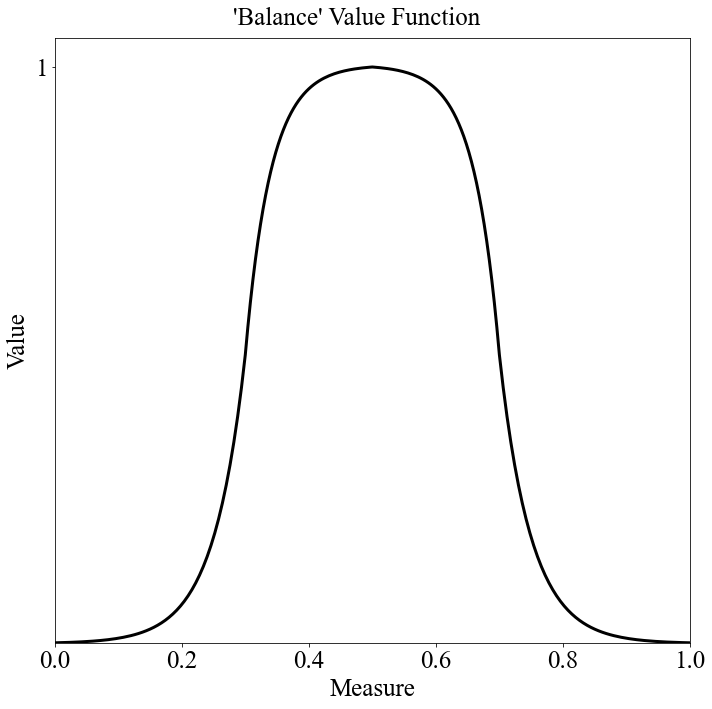

In [45]:
# Change this
vf_string = "Balance|0.2, 0.2, 0.1, 0.08, 0.08, 0.1, 0.5"
target = 0.5  # This is what we're after
actual = 0.5  # This is essentially what we could realistically expect (based on set of eligible cadets)
num_breakpoints = 200  # How many breakpoints to use 
# (the more breakpoints used, the more the function appears non-linear)

# Don't change this
segment_dict = afccp.core.handling.value_parameter_handling.create_segment_dict_from_string(
    vf_string, target=target, actual=actual)
x, y = afccp.core.handling.value_parameter_handling.value_function_builder(segment_dict=segment_dict, 
                                                                           num_breakpoints=num_breakpoints)
chart = afccp.core.visualizations.instance_graphs.value_function_graph(x, y, title= "'Balance' Value Function")

That is the "Balance" value function type. This is intended for the objectives that seek to "balance" certain characteristics of the cadets (USAFA/Male/Minority proportions and sometimes Merit as well). I did end up changing the Merit value function to be a "Min Increasing" because I decided against penalizing the objective for exceeding 0.5. At this point, I will note that these value functions don't necessarily have to have 4 segments. I do have value function types that use 3, 2, or even 1 segment. Let's discuss the quota value functions.

"Quota_Direct" is intended for AFSCs that have a range on the number of cadets that are to be assigned, but also know around where they'd like to fall within that range. There are 6 parameters, the $\rho$ (rho) parameters for each of the four segments, and the y values for the two breakpoints on either side of the "peak". The vf_string is then: "Quota_Direct|$\rho_1$, $\rho_2$, $\rho_3$, $\rho_4$, $y_1$, $y_2$". The additional AFSC specific parameters are the upper/lower bounds on the number of cadets as well as the actual target number of cadets within that range. Here is an example:

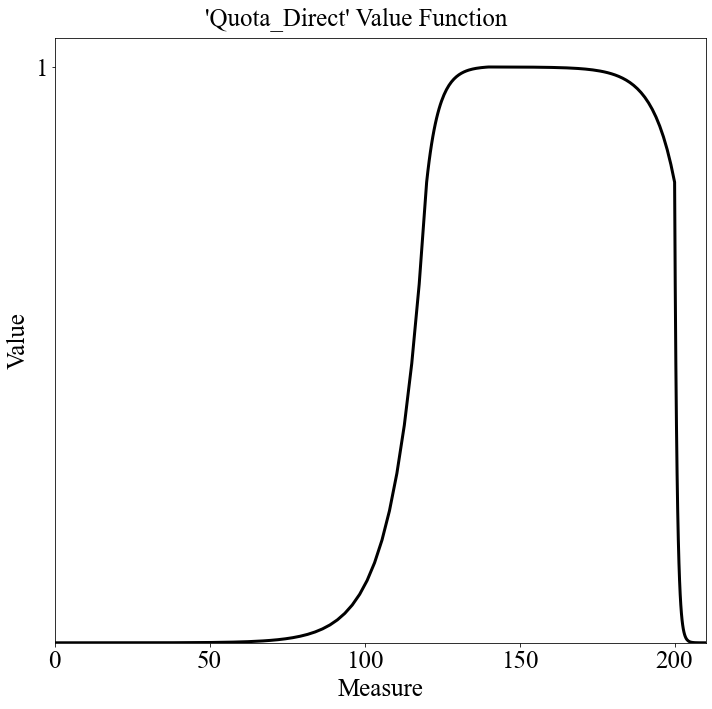

In [46]:
vf_string = "Quota_Direct|0.1, 1, 0.6, 0.1, 0.8, 0.8"
minimum = 120  # Lower Bound
maximum = 200  # Upper Bound
target = 140  # Desired number of cadets within the range
num_breakpoints = 200  # How many breakpoints to use 

# Don't change this
segment_dict = afccp.core.handling.value_parameter_handling.create_segment_dict_from_string(
    vf_string, target=target, minimum=minimum, maximum=maximum)
x, y = afccp.core.handling.value_parameter_handling.value_function_builder(segment_dict=segment_dict, 
                                                                           num_breakpoints=num_breakpoints)
chart = afccp.core.visualizations.instance_graphs.value_function_graph(x, y, title="'Quota_Direct' Value Function")

Here you can see that although the range of 120 to 200 is specified, there is a direction of preference within that range (the AFSC wants around 140 cadets, but is fairly accepting of values around that range). I will note that the target, minimum, and maximum parameters are taken from the AFSCs_Fixed data!

Another value function we can choose for the quota objective is the "Quota_Normal" function type. This is intended for AFSCs that either don't care about the number of cadets (as long as they fall within a certain range) or didn't specify. For example, the PGL says 120 and after speaking with them we determine the upper bound is 200 and they say they have no preference between 120 and 200 and everything in between. There are 2 segments for this function, connected by a horizontal line at y = 1 for the range on the cadets. The function parameters are $\rho_1$, $\rho_2$, and "domain_max" which is the max number of cadets that could have a nonzero value (arbitrary scalar just to get a curve on the right side of the function). Here is the vf_string: "Quota_Normal|d_max, $\rho_1$, $\rho_2$". Here is an example:

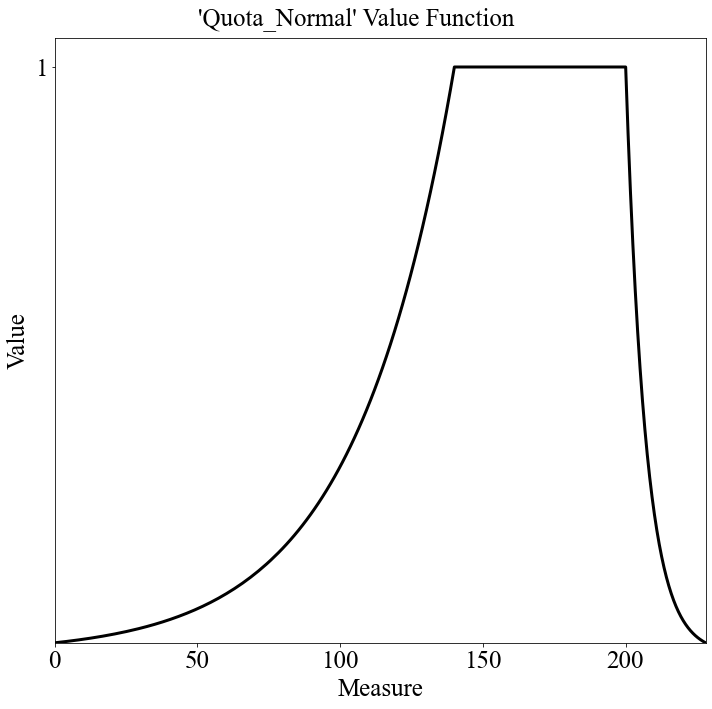

In [47]:
vf_string = "Quota_Normal|0.2, 0.25, 0.05"
minimum = 120  # Lower Bound
maximum = 200  # Upper Bound
target = 140  # (Doesn't matter here)
num_breakpoints = 200  # How many breakpoints to use 

# Don't change this
segment_dict = afccp.core.handling.value_parameter_handling.create_segment_dict_from_string(
    vf_string, target=target, minimum=minimum, maximum=maximum)
x, y = afccp.core.handling.value_parameter_handling.value_function_builder(segment_dict=segment_dict, 
                                                                           num_breakpoints=num_breakpoints)
chart = afccp.core.visualizations.instance_graphs.value_function_graph(x, y, title="'Quota_Normal' Value Function")

The last two kinds of value functions I'll discuss are the "Min Increasing" and "Min Decreasing" types. They are very simple and only have one segment which is a simple exponentional curve to get to the target measure (in the x space). The only parameter is $\rho$. The vf_string then looks like: "Min Increasing|$\rho$" or "Min Decreasing|$\rho$". They are called "Min" functions because it's essentially the same thing as taking the minimum value between some exponential curve and 1. Here are some examples:

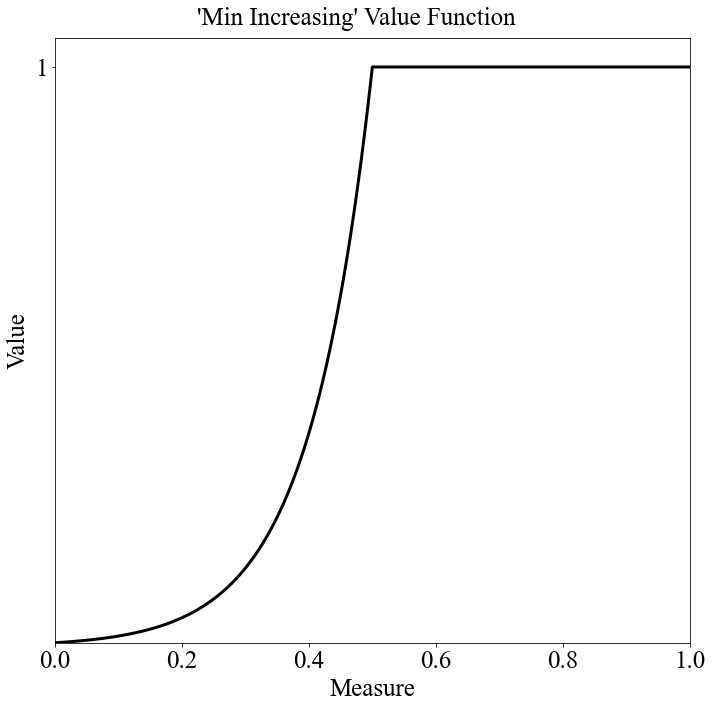

In [48]:
vf_string = "Min Increasing|0.1"
target = 0.5
num_breakpoints = 200  # How many breakpoints to use 

# Don't change this
segment_dict = afccp.core.handling.value_parameter_handling.create_segment_dict_from_string(
    vf_string, target=target, minimum=minimum, maximum=maximum)
x, y = afccp.core.handling.value_parameter_handling.value_function_builder(segment_dict=segment_dict, 
                                                                           num_breakpoints=num_breakpoints)
chart = afccp.core.visualizations.instance_graphs.value_function_graph(x, y, title="'Min Increasing' Value Function")

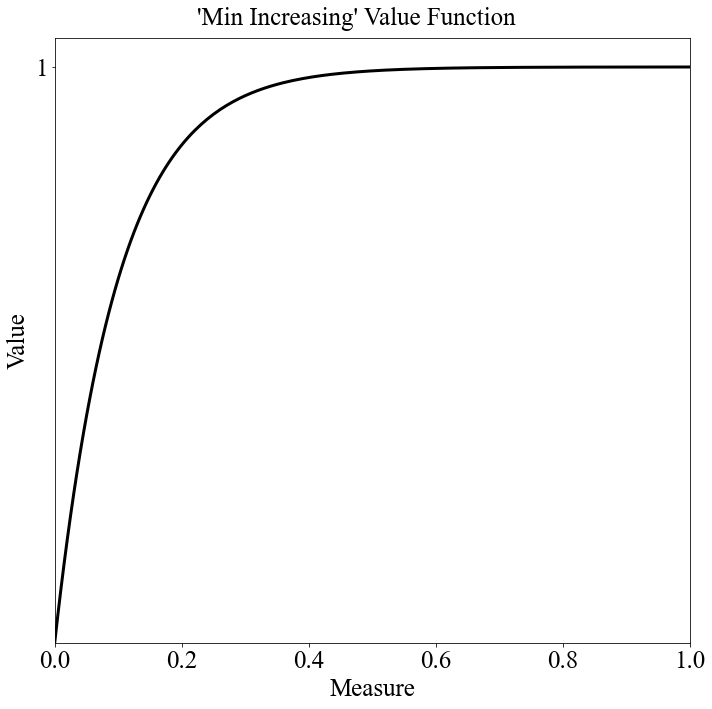

In [49]:
vf_string = "Min Increasing|-0.1"
target = 1
num_breakpoints = 200  # How many breakpoints to use 

# Don't change this
segment_dict = afccp.core.handling.value_parameter_handling.create_segment_dict_from_string(
    vf_string, target=target, minimum=minimum, maximum=maximum)
x, y = afccp.core.handling.value_parameter_handling.value_function_builder(segment_dict=segment_dict, 
                                                                           num_breakpoints=num_breakpoints)
chart = afccp.core.visualizations.instance_graphs.value_function_graph(x, y, title="'Min Increasing' Value Function")

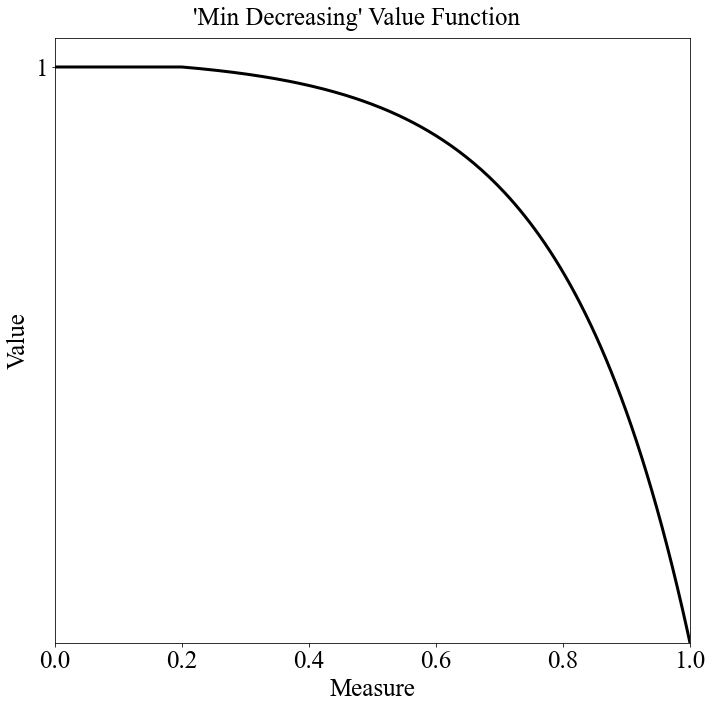

In [50]:
vf_string = "Min Decreasing|-0.2"
target = 0.2
num_breakpoints = 200  # How many breakpoints to use 

# Don't change this
segment_dict = afccp.core.handling.value_parameter_handling.create_segment_dict_from_string(
    vf_string, target=target, minimum=minimum, maximum=maximum)
x, y = afccp.core.handling.value_parameter_handling.value_function_builder(segment_dict=segment_dict, 
                                                                           num_breakpoints=num_breakpoints)
chart = afccp.core.visualizations.instance_graphs.value_function_graph(x, y, title="'Min Decreasing' Value Function")

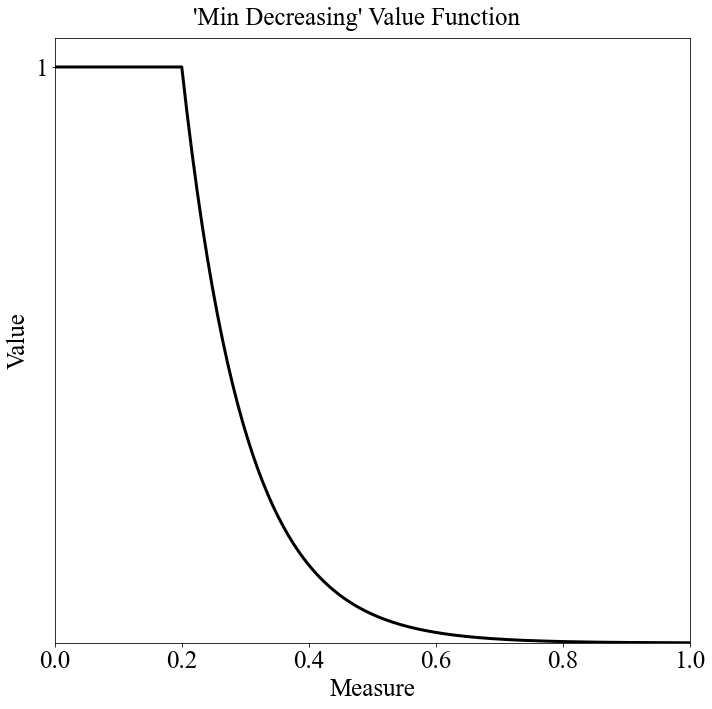

In [51]:
vf_string = "Min Decreasing|0.1"
target = 0.2
num_breakpoints = 200  # How many breakpoints to use 

# Don't change this
segment_dict = afccp.core.handling.value_parameter_handling.create_segment_dict_from_string(
    vf_string, target=target, minimum=minimum, maximum=maximum)
x, y = afccp.core.handling.value_parameter_handling.value_function_builder(segment_dict=segment_dict, 
                                                                           num_breakpoints=num_breakpoints)
chart = afccp.core.visualizations.instance_graphs.value_function_graph(x, y, title="'Min Decreasing' Value Function")

And there you have it! This is how I code up and construct my many value functions for each of the objectives for each of the AFSCs. Please reach out if you have any questions as I know this is a confusing section.

#### Structure Demo

Before I demo the value parameters, I need to talk about cadet/AFSC preference lists. This is the new OLEA initiative, and it's why you may have noticed the "Norm Score" objective in the default value parameters above. We need to create preference lists in order for the "Norm Score" objective to be included in this instance when we import default value parameters. Initially, I assume you only have the Cadets Fixed and AFSCs Fixed excel sheets. You will likely also have preferences for the cadets and the AFSCs. Regardless of if you do or don't, I want you to generate four new excel sheets using the code below. If you have the "real" preference lists, you can replace the ones you generate with those afterwards. 

In [52]:
# Create cadet preference lists using the cadet utility matrix
instance.convert_utilities_to_preferences()

# Create AFSC preference lists using merit, AFOCD, and utility characteristics
instance.generate_fake_afsc_preferences()

# Create the AFSC utility matrix by normalizing the fake AFSC preference lists
instance.convert_afsc_preferences_to_percentiles()

Once you do that, if you were to export the instance to excel now you would have four new sheets: "Cadets Utility", "AFSCs Utility", "Cadets Preferences", "AFSCs Preferences". If you already have preference lists for cadets/AFSCs generated by OLEA, simply replace those two excel sheets with those. You could then create a new AFSCs Utility matrix by running "instance.convert_afsc_preferences_to_percentiles()". You're now ready to import default value parameters!

Just as "parameters" is a dictionary of many different fixed cadet/AFSC parameters, "value_parameters" is a dictionary of all of the different weight and value parameters. Let's generate our value parameters for the "2023b" instance using the generalized defaults from the excel sheet.

In [53]:
instance.import_default_value_parameters()
pass  # Prevents printing out the entire dictionary

Importing default value parameters...
Imported.


The above code looks for "Value_Parameters_Defaults_2023b.xlsx" in the "support" folder. If it doesn't find it, it'll grab the generic "Value_Parameters_Defaults.xlsx" file since that one has all of the AFSCs in there. We now have our value parameters loaded in for this class year! Let's see what they look like.

In [54]:
instance.value_parameters.keys()

dict_keys(['cadets_overall_weight', 'afscs_overall_weight', 'cadet_weight_function', 'afsc_weight_function', 'cadets_overall_value_min', 'afscs_overall_value_min', 'afsc_value_min', 'cadet_value_min', 'objective_weight', 'afsc_weight', 'M', 'objective_target', 'objectives', 'O', 'objective_value_min', 'constraint_type', 'USAFA-Constrained AFSCs', 'Similarity Constraint', 'Cadets Top 3 Constraint', 'num_breakpoints', 'cadet_weight', 'a', 'f^hat', 'value_functions', 'K', 'K^A', 'K^C', 'J^USAFA', 'K^D', 'J^A', 'I^C', 'J^C', 'r', 'L', 'vp_weight'])

We have many different kinds of parameters loaded in this dictionary now. Just by looking at the contents of the dictionary, you can probably guess what most of them are.

In [55]:
# Shorthand (just like p = instance.parameters)
vp = instance.value_parameters

# Set of potential objectives
print(vp['objectives'])

['Norm Score' 'Merit' 'USAFA Proportion' 'Combined Quota' 'USAFA Quota'
 'ROTC Quota' 'Mandatory' 'Desired' 'Permitted' 'Utility' 'Male'
 'Minority']


In [56]:
# Set of objectives that AFSC at index 21 cares about (61D)
j = 21
afsc = p["afsc_vector"][j]
indices = vp['K^A'][j]
print("AFSC:", afsc)
print('objective indices:', indices)
print('objectives:', vp["objectives"][indices])

AFSC: 61D
objective indices: [1 3 6 9]
objectives: ['Merit' 'Combined Quota' 'Mandatory' 'Utility']


In [57]:
# Set of objectives that AFSC 61D is constraining
indices = vp['K^C'][j]
print('objective indices:', indices)
print('objectives:', vp["objectives"][indices])

objective indices: [1 3 6]
objectives: ['Merit' 'Combined Quota' 'Mandatory']


In [58]:
# AFSC individual weight
print('AFSC weight function:', vp['afsc_weight_function'])  # We hand-picked the weights
print('AFSC "local" weights:', vp['afsc_weight'])  # sum to 1

AFSC weight function: Custom
AFSC "local" weights: [0.01134456 0.0113799  0.17670654 0.01134456 0.14724956 0.03534131
 0.01141524 0.14723189 0.03855737 0.05301196 0.01447227 0.01145058
 0.01132689 0.01134456 0.01132689 0.01132689 0.01178633 0.01132689
 0.01136223 0.03855737 0.01132689 0.01134456 0.01136223 0.01134456
 0.0113799  0.01516142 0.01152127 0.01134456 0.01132689 0.05301196
 0.03534131 0.01767065]


Creating AFSC weight chart...


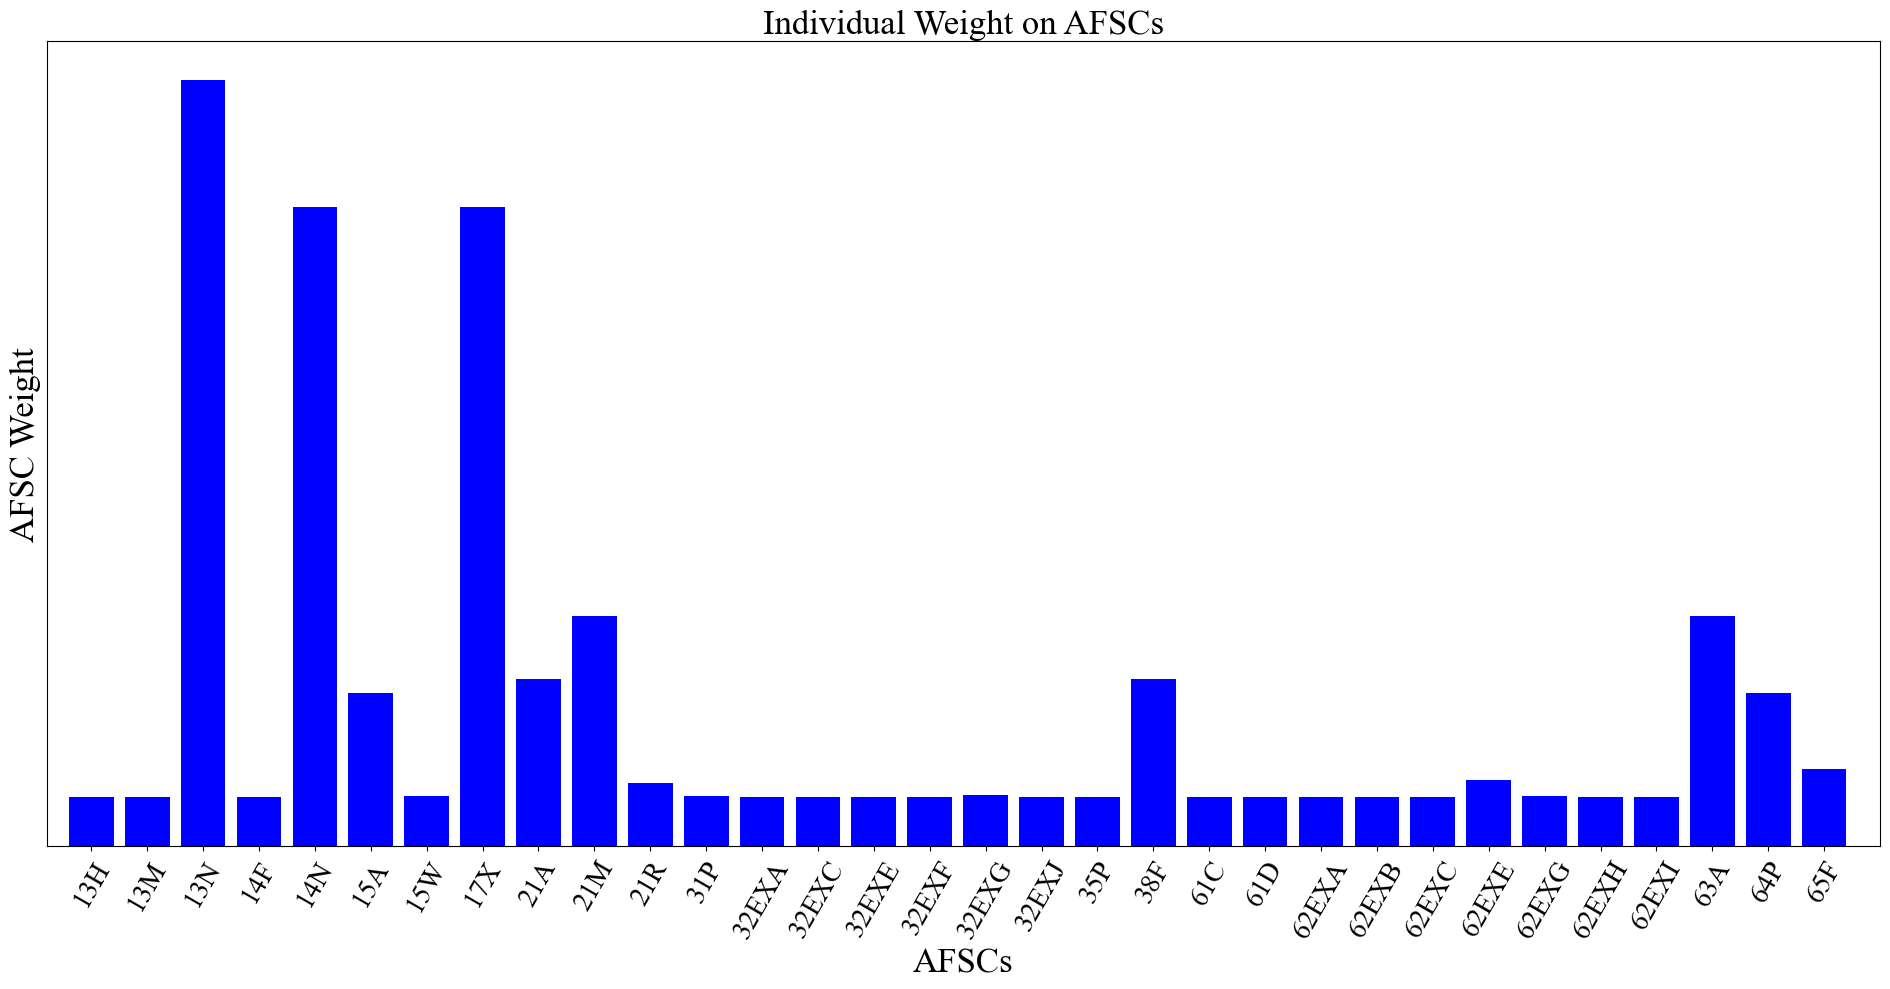

In [59]:
# Let's visualize the weights on the AFSCs
chart = instance.display_weight_function({"cadets_graph":False, "skip_afscs":False, "afsc_rotation":60})

In [60]:
# Cadet individual weight
print('Cadet weight function:', vp['cadet_weight_function'])  # Linear function of merit here!
print('Cadet local weights:', vp['cadet_weight'])  # sum to 1

Cadet weight function: Curve_1
Cadet local weights: [0.00038665 0.00105211 0.0004545  ... 0.00080125 0.00071034 0.00071034]


Creating cadet weight chart...


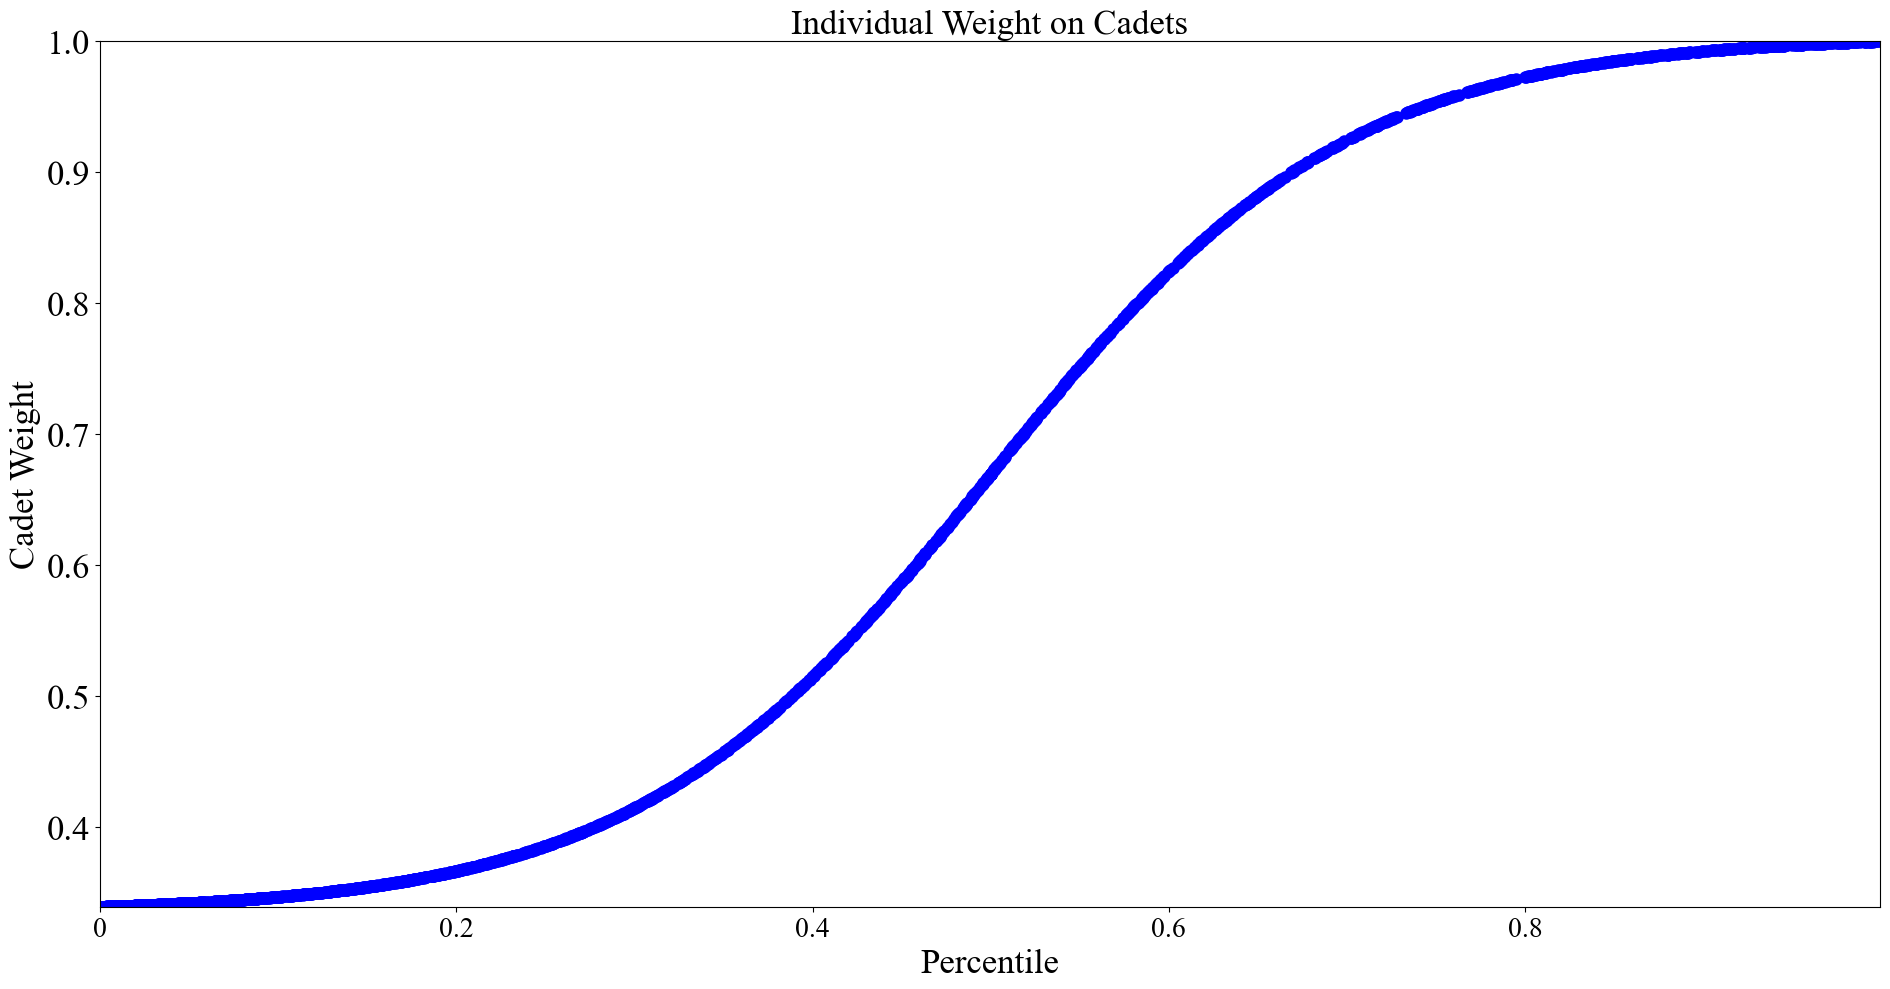

In [61]:
# Let's visualize the weights on the cadets
chart = instance.display_weight_function({"cadets_graph":True})

In [62]:
# The "overall weights" are pretty straightforward (and mutable as well)
print('Overall Weight on Cadets:', vp['cadets_overall_weight'])
print('Overall Weight on AFSCs:', vp['afscs_overall_weight'])

Overall Weight on Cadets: 0.7
Overall Weight on AFSCs: 0.3


In [63]:
# AFSC objective weight (Just printing the shape of it- it'll be MxO where M is number of AFSCs and 
# O is number of objectives!)
print(np.shape(vp['objective_weight']))

(32, 12)


In [64]:
# Let's see the objectives for 61D again
j = 21
afsc = p["afsc_vector"][j]
indices = vp['K^A'][j]
print('C22 objectives:', vp["objectives"][indices])

C22 objectives: ['Merit' 'Combined Quota' 'Mandatory' 'Utility']


In [65]:
# The weights on this AFSC's objectives:
print(vp['objective_weight'][j, :])

[0.         0.12765957 0.         0.42553192 0.         0.
 0.38297872 0.         0.         0.06382979 0.         0.        ]


In [66]:
# Weights are loaded into a large matrix, but not all objective weights are needed (many are zero)
print(vp['objective_weight'][j, indices])  # these are the only ones considered!

[0.12765957 0.42553192 0.38297872 0.06382979]


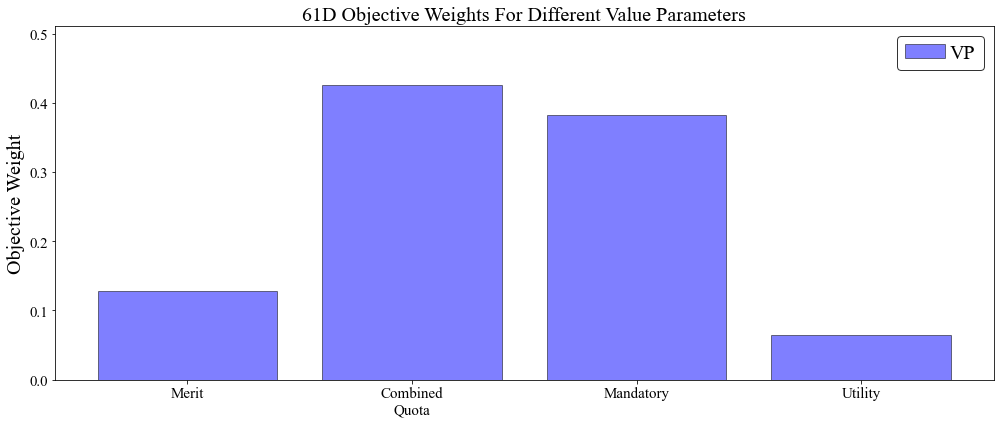

In [67]:
# Objective weights for AFSC "C22"
chart = instance.display_afsc_objective_weights_chart(afsc="61D")

The "For Different Value Parameters" part is in reference to the fact that this function is usually meant to compare different sets of value parameters with each other. Just like before with AFSC weight, we could also change objective weights directly for any AFSC very easily. 

We already discussed value functions fairly in-depth previously, but now I'll just demonstrate how to work with them through the code.

Creating value function chart for objective Combined Quota for AFSC 13N...


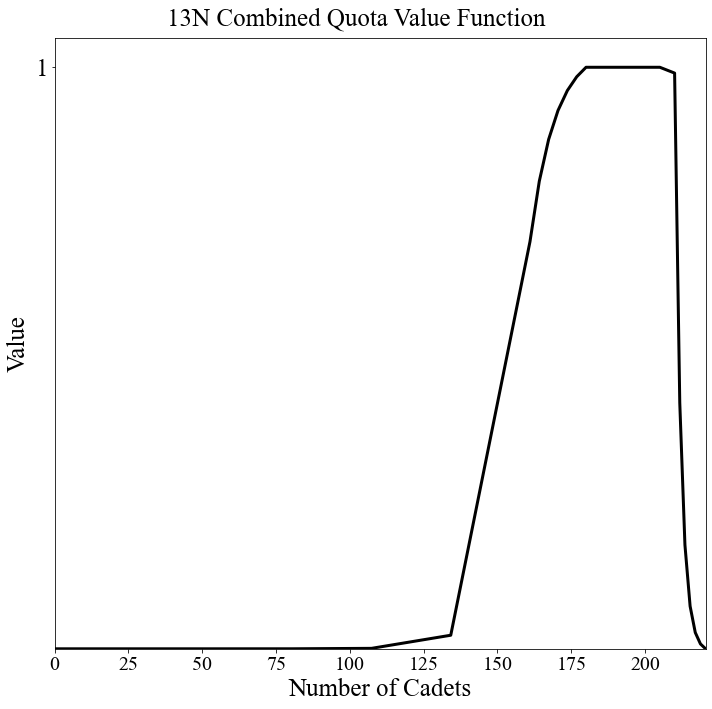

In [68]:
# Pick an AFSC and objective
afsc, objective = "13N", "Combined Quota"

# Get the indices
j, k = np.where(p["afsc_vector"] == afsc)[0][0], np.where(vp["objectives"] == objective)[0][0]

# Now let's plot this AFSC objective's value function
chart = instance.show_value_function({"afsc":afsc, "objective":objective})

The parameters used to create this value function are:

In [69]:
print("Number of Breakpoints:", vp["r"][j][k])
print("Set of Breakpoints\n", vp["L"][j][k])
print("Breakpoint x-coordinates\n", vp["a"][j][k])
print("Breakpoint y-coordinates\n", vp["f^hat"][j][k])

Number of Breakpoints: 24
Set of Breakpoints
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Breakpoint x-coordinates
 [  0.       53.66667  80.5     107.33333 134.16667 161.      164.16667
 167.33333 170.5     173.66667 176.83333 180.      185.      190.
 195.      200.      205.      210.      211.75    213.5     215.25
 217.      218.75    220.5    ]
Breakpoint y-coordinates
 [0.0000e+00 0.0000e+00 3.0000e-05 7.8000e-04 2.3330e-02 7.0000e-01
 8.0414e-01 8.7605e-01 9.2570e-01 9.5998e-01 9.8366e-01 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 9.9000e-01
 4.2301e-01 1.7867e-01 7.3370e-02 2.7990e-02 8.4300e-03 0.0000e+00]


Later on, I will discuss how these parameters are used in the optimization model. For now, I just wanted you to see them. 

Because it is very easy to change our value parameters around, I wanted a method of controlling different "sets" of value parameters. By changing your "set" of weight and value parameters that you're using, you could effectively change the entire problem. Therefore, CadetCareerProblem has an attribute called "vp_dict" that is a dictionary of different weight and value parameters.

In [70]:
print(instance.vp_dict.keys())

dict_keys(['VP'])


Right now, we only have the one set of value parameters that we imported. If we change something and then save it, we'll have another set of value parameters.

Creating cadet weight chart...


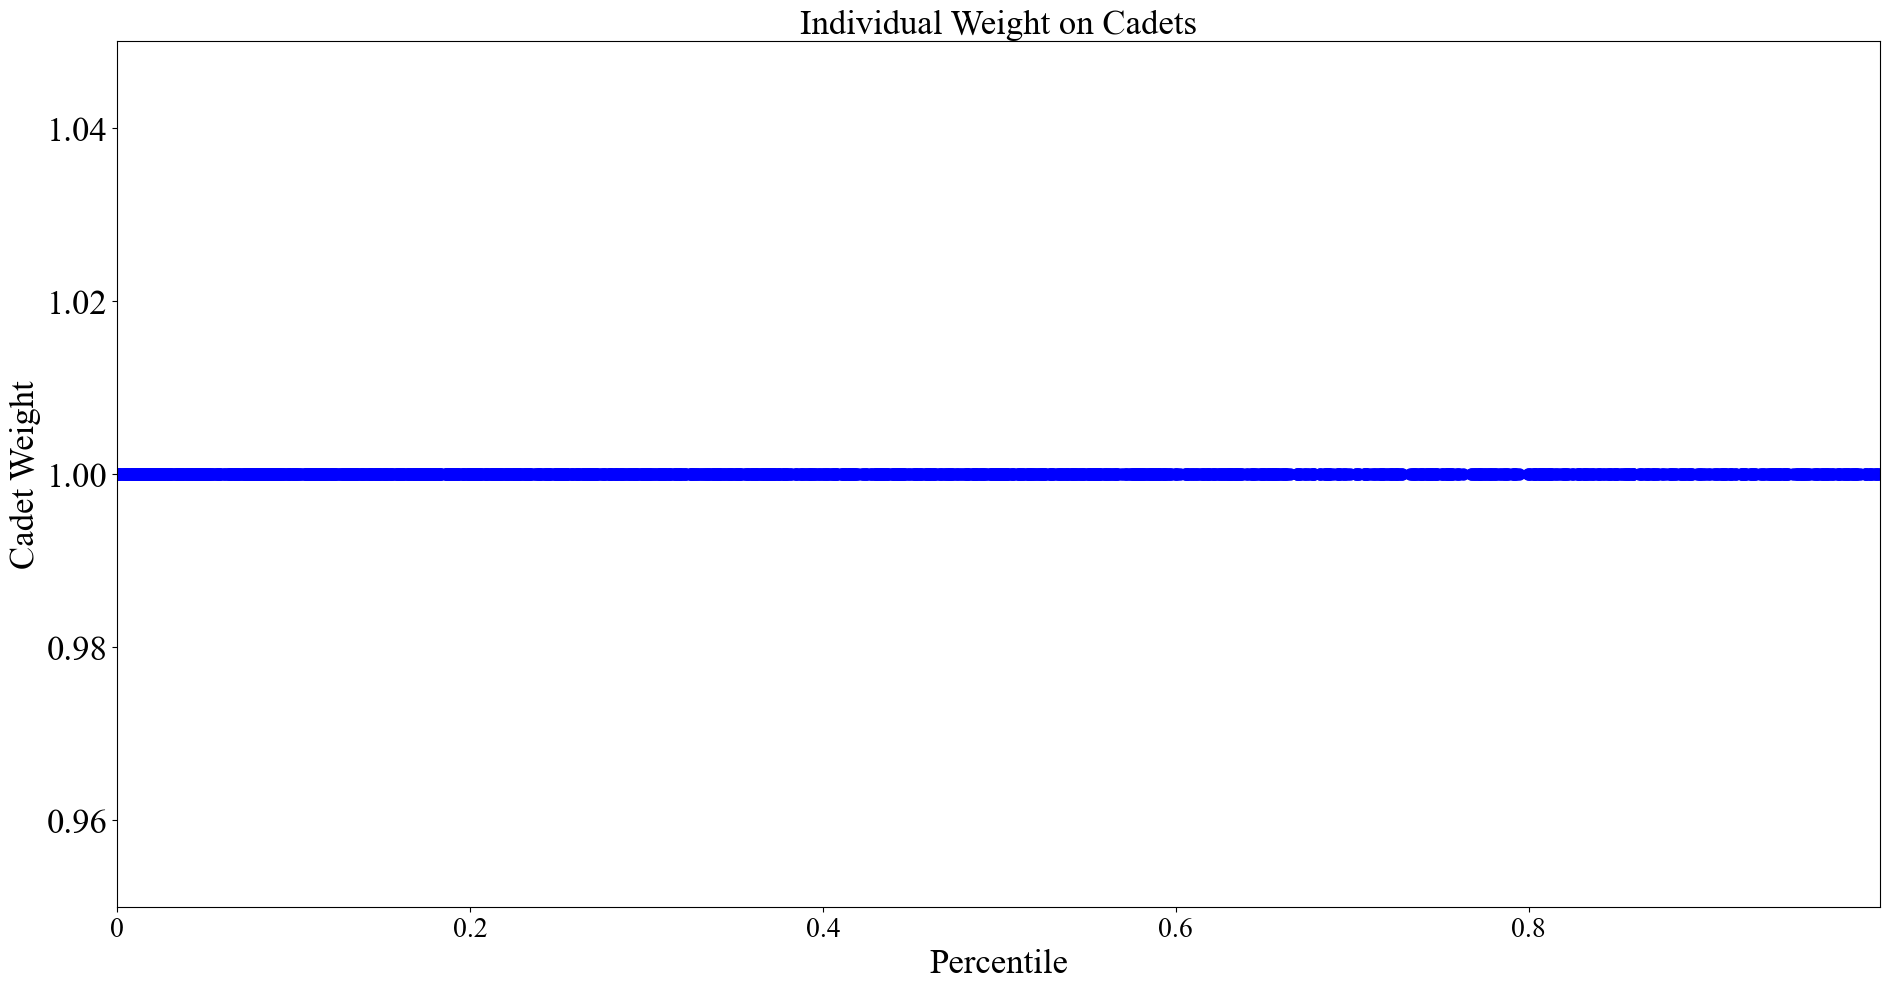

In [71]:
# Change the overall weights on cadets/AFSCs
instance.value_parameters["cadets_overall_weight"] = 0.1
instance.value_parameters["afscs_overall_weight"] = 0.9

# Change the cadet weight function
instance.change_weight_function(cadets=True, function="Equal")

# Plot the new weight function
chart = instance.display_weight_function({"cadets_graph": True, "save": False})

In [72]:
# Save this set of value parameters as a new one!
instance.save_new_value_parameters_to_dict()

# We now have 2 sets of value parameters
print(instance.vp_dict.keys())

# Prints out the name of the current activated set of value parameters
print("Name of activated value parameters:", instance.vp_name)

dict_keys(['VP', 'VP_2'])
Name of activated value parameters: VP_2


I will note that I have a function that checks to see if this "new" set of value parameters is actually new. It compares every element of the new set of value parameters with each of the other ones in the dictionary. If it finds a matching set, then it will not save a copy. If you repeatedly run the above code, you won't keep adding new ones! Similarly by importing default value parameters again, we won't generate a new set.

In [73]:
# Import default value parameters again
instance.import_default_value_parameters()

# We still have 2 sets of value parameters
print(instance.vp_dict.keys())

# This time though, we revert back to our first set!
print("Name of activated value parameters:", instance.vp_name)

Importing default value parameters...
Imported.
dict_keys(['VP', 'VP_2'])
Name of activated value parameters: VP


And now we're back to the original set we had

Creating cadet weight chart...


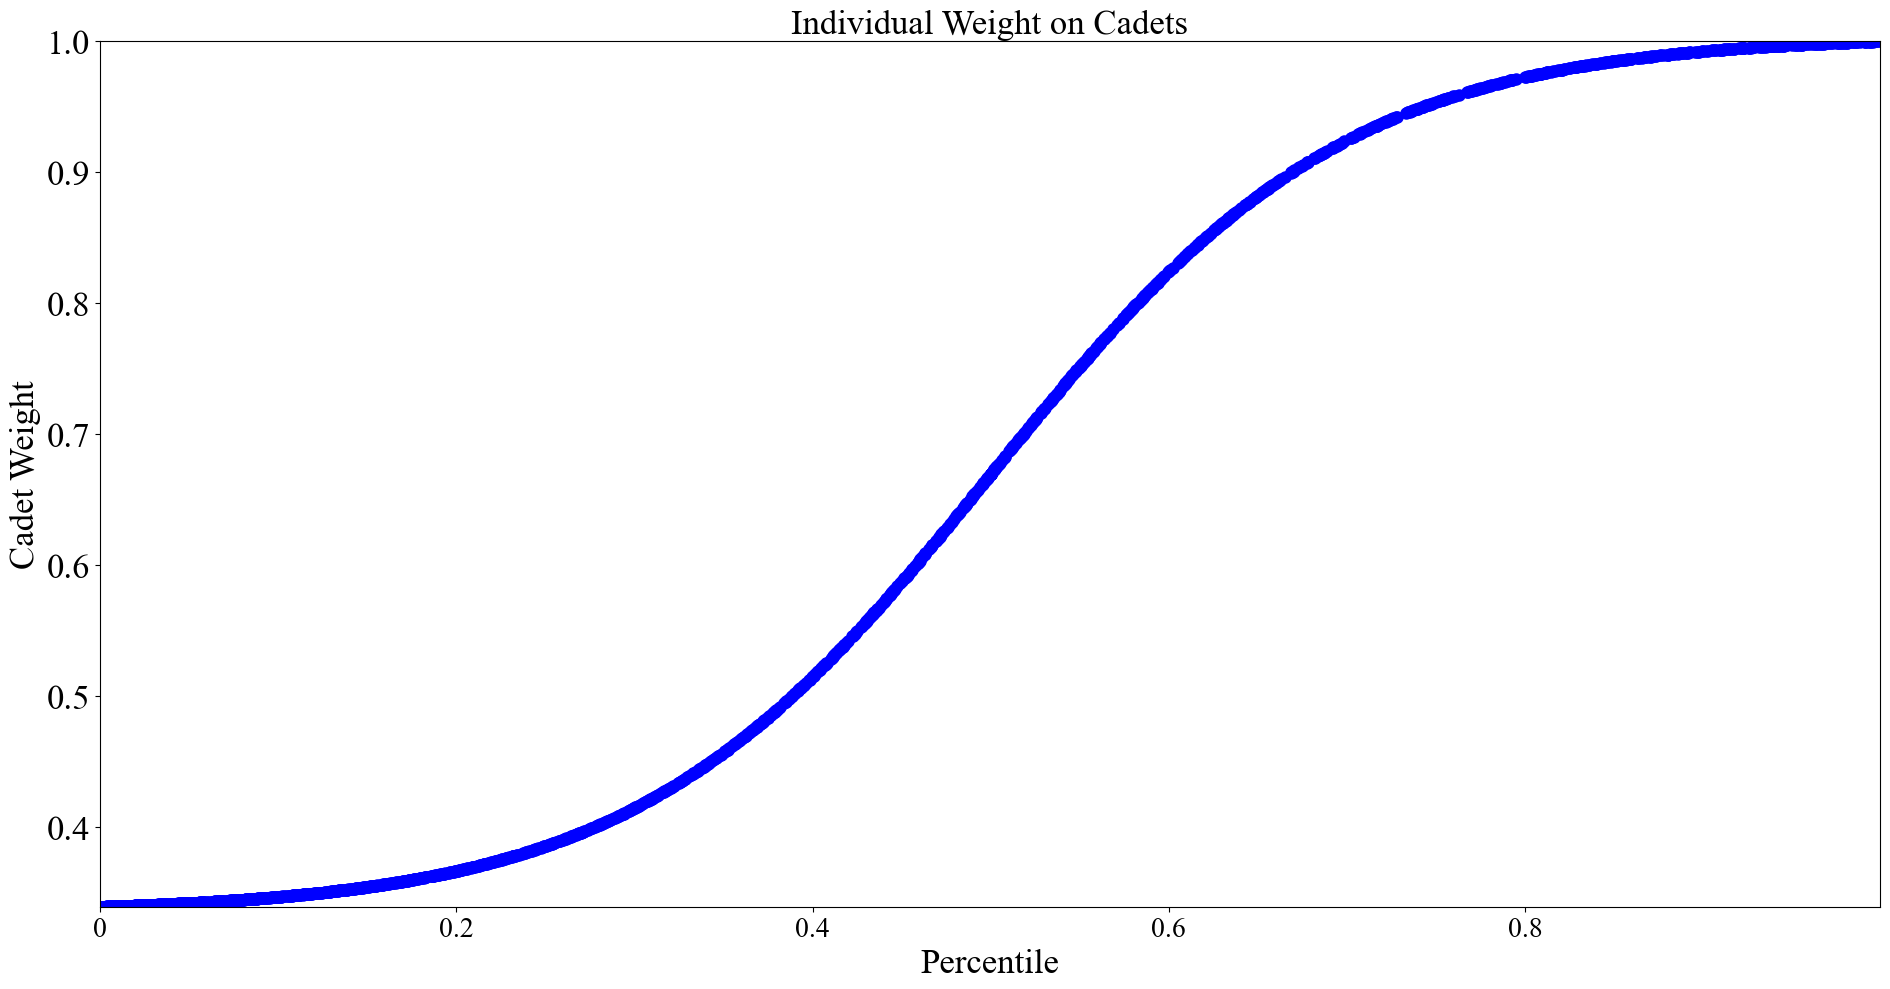

In [74]:
# Plot the new weight function
chart = instance.display_weight_function({"cadets_graph": True, "save": False})

In [75]:
# Current weight on cadets
print(instance.value_parameters["cadets_overall_weight"])
print("Name of activated value parameters:", instance.vp_name)

0.7
Name of activated value parameters: VP


You can switch between sets of value parameters by doing this:

In [76]:
instance.set_instance_value_parameters("VP_2")

# Current weight on cadets
print(instance.value_parameters["cadets_overall_weight"])
print("Name of activated value parameters:", instance.vp_name)

instance.set_instance_value_parameters("VP")
print()

# Current weight on cadets
print(instance.value_parameters["cadets_overall_weight"])
print("Name of activated value parameters:", instance.vp_name)

0.1
Name of activated value parameters: VP_2

0.7
Name of activated value parameters: VP


In [77]:
# Remove "VP_2" from the dictionary
instance.vp_dict.pop("VP_2")

# We're back to just "VP"
instance.vp_dict.keys()

dict_keys(['VP'])

*IMPORTANT! Every time you import a new problem instance, you have to select a set of value parameters to use. Either generate new ones, or "set" them like above. 

### Solving the Problem

Now let's talk about how to actually generate new solutions. I'll first discuss non-VFT solution methods and then I will showcase the VFT methods. 

#### Generating Solutions

The simplest way to find a solution is to generate a random one! 

In [78]:
instance.generate_random_solution()

Generating random solution...
Measured exact solution vector objective value: 0.2816. Unmatched cadets: 0


array([ 8,  4, 30, ..., 31, 18,  2])

Whenever you aquire a solution, we always measure it according to the VFT weight and value parameters (the Exact model by the way). That's where we get our objective value from. Additionally, just like the "vp_dict" is a dictionary of different sets of value parameters, we also have a "solution_dict" which (you guessed it) is a dictionary of different solutions.

In [79]:
# We just have the one random solution!
print(instance.solution_dict.keys())

dict_keys(['Random'])


In [80]:
# Solve a stable marriage algorithm version that I created (not very useful)
instance.stable_matching()

# Solve a greedy algorithm that I created (also not very useful)
instance.greedy_method()

# We now have a few different solutions here!
print(instance.solution_dict.keys())

Solving stable marriage model...
Measured exact solution vector objective value: 0.6355. Unmatched cadets: 0
Solving Greedy Model...
Measured exact solution vector objective value: 0.2548. Unmatched cadets: 0
dict_keys(['Random', 'Stable', 'Greedy'])


In [81]:
# The original IP that AFPC has been using before the VFT model
# instance.solve_original_pyomo_model({"max_time": 60, "provide_executable": False})

The "provide_executable" parameter just tells pyomo where to search for a solver. Don't worry about it, it's something I used to do when I'd run this on my macbook.

Another method I have to solve this problem is with a goal-programming (GP) model created by Lt. Rebecca Eisemann when she was at AFIT. Both of us were working on this problem for our theses, and so I coded up her model as best as I could to bring with me to AFPC. It follows her formulation pretty well I'd say, and if you're interested you can read her thesis online by searching her name at the time (Rebecca Reynolds). Let's first look at the parameters that her model uses:

In [82]:
# Import her parameter data-frame just to look at it
filepath = dir_path + "support/gp_parameters.xlsx"
gp_df = pd.read_excel(filepath)
gp_df

Constraint  Normalized Penalty  Normalized Reward  Run Penalty  Run Reward  \
0           T            0.056736           0.006952            1           1   
1           F            0.045822           0.008020            1           1   
2           M            0.122749           0.009039            1           1   
3     D_under            0.175498           0.007067            1           1   
4      D_over            1.000000           1.000000            1           1   
5           P            0.045950           0.061889            1           1   
6     U_under            0.669725           0.025676            1           1   
7      U_over            0.173123           0.081495            1           1   
8     R_under            0.574803           0.028283            1           1   
9      R_over            0.746548           0.032918            1           1   
10          W            0.091345           0.013898            1           1   
11          S            0.000000           0.000074            0           1   

    Penalty Weight  Reward Weight  
0              100              0  
1              100              0  
2               90              0  
3               30              0  
4               30              0  
5               25              0  
6               50              0  
7               50              0  
8               50              0  
9               50              0  
10              25              0  
11               0            100

Before we solve the "GP" model, we have to convert my parameters and value_parameters to her "gp_parameters". I have two main methods of doing that: using the parameters above that were calculated for a previous class year or calculating new parameters for the current class year. In order to get these Normalized Penalties and Rewards that the GP model uses, you actually have to solve it each time for each constraint. That's 23 different iterations, and it takes time. So to make things easier, you can just approximate it with past years info. To be exact, however, you do need to solve it for this year's data.

In [83]:
# Translate the parameters according to our "generalized" dataset above
instance.vft_to_gp_parameters({"use_gp_df": True, "get_new_rewards_penalties": False})

# Print out the keys to the dictionary
print(instance.gp_parameters.keys())

Translating VFT model parameters to Goal Programming Model parameters...
Translated.
dict_keys(['A', 'C', 'con', 'A^', 'C^', 'param', 'utility', 'Big_M', 'u_limit', 'merit', 'mu^', 'lam^'])


Just like parameters and value_parameters, gp_parameters is also a dictionary of various items! Many of the above items in that dictionary are also dictionaries themselves. For example, in her formulation she has a set called $\mathcal{A}^M$ which is the set of all AFSCs with Mandatory AFOCD constraints. Since there are many other subsets of AFSCs that pertain to the various constraints ($\mathcal{A}^T$, $\mathcal{A}^F$, $\mathcal{A}^P$, etc.), I created a dictionary of AFSC subsets, where each key is a 1-dimensional numpy array of AFSC indices.

In [84]:
# "A^M" for example
print(instance.gp_parameters["A^"]["M"])

[ 0  2  3  4  5  6  7 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29]


In [85]:
# Solve the model!
# instance.solve_gp_pyomo_model({"max_time": 60, "provide_executable": False})

#### VFT Model

Now that we've seen some other ways of finding solutions, let's look at the VFT model! 

In [86]:
instance.solve_vft_pyomo_model({"provide_executable": False})

print(instance.solution_dict.keys())

Building VFT Model...
Solving Approximate VFT Model instance with solver cbc...
Measured exact solution vector objective value: 0.8677. Unmatched cadets: 0
dict_keys(['Random', 'Stable', 'Greedy', 'A-VFT'])


Now we have our VFT solution. This solution was obtained through the Approximate model, and so we could still evolve it further using the genetic algorithm if we'd like. Let's pass it as an initial solution to the GA.

In [87]:
# instance.genetic_algorithm({"solution_names": ["A-VFT"]})

I also have a method that will generate an initial population of solutions by running the Approximate model several times with slightly different parameters. We can first generate them by changing our estimated number of cadets based on how many cadets actually get assigned in each iteration. Once we converge on an estimated number of cadets for each AFSC that is either identical to the number that is assigned or is close, we'll then generate more solutions by iterating over the overall weight on cadets/AFSCs. These methods are purely intended to generate a variety of initial solutions for which the GA can evolve from. We can also add other solutions to this list by using the "solution_names" parameter.

In [88]:
# iterate_from_quota determines if we want to use the quota trick for generating solutions
# instance.full_vft_model_solve({"populate": True, "provide_executable": False, "ga_max_time": 60,
#                                "iterate_from_quota": True, "solution_names": "A-VFT"})

I really don't know why the model fails to solve in some of the above iterations. It makes no sense why changing the estimated number of cadets (which only affects the objective function) would mess it up. Nevertheless, there's the main VFT model function!

In case you're wondering how the value functions work with the VFT model, here's a screenshot from my thesis of the modeling components that are added to the optimization formulation:

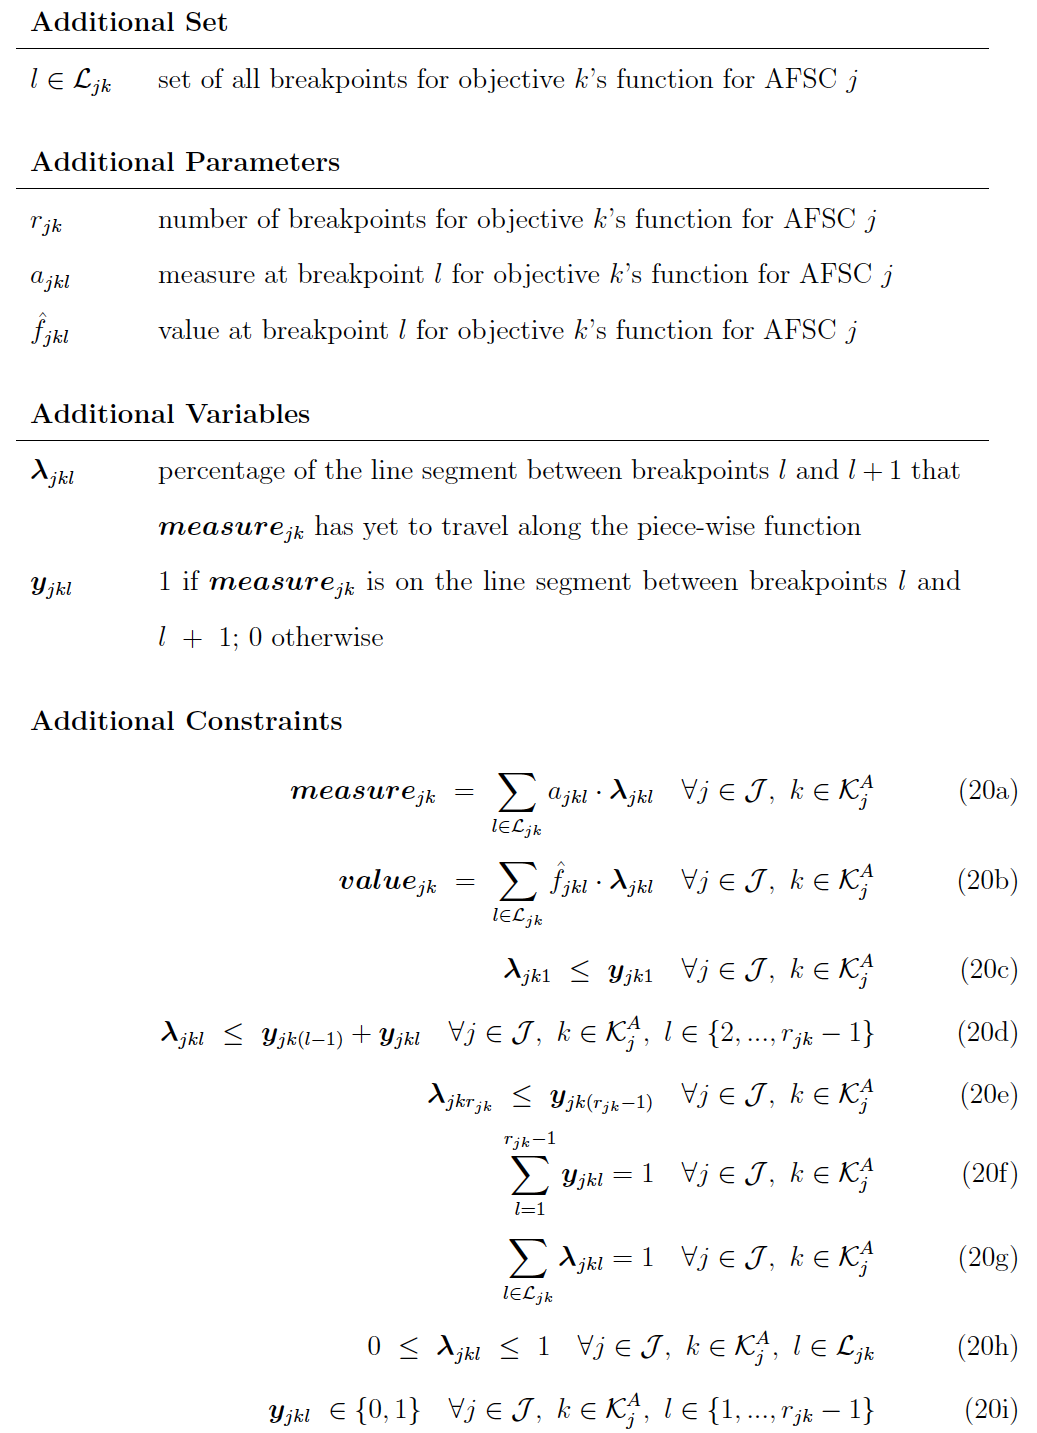

In [89]:
Image(filename='assets/pic9.png')

Constraints (20a) and (20b) force the objective measures and values to fall on some point along one of the line segments of the piece-wise value functions. Constraints (20c) through (20i) enforce the value of a particular objective measure to take on the value of the point between two breakpoints by using its slope. The $\lambda$ variable determines the percentage in the x-space (the $measure$ axis) that $measure_{jk}$ has left to travel between two breakpoints. For example, if $measure_{jk}$ is 30% of the way between breakpoints 2 and 3, then $\lambda_{jk2}$ would be 0.7, and $y_{jk2}$ would be 1. Since $\sum_{l \in \mathcal{L_{jk}}} \lambda_{jkl} \ = \ 1$, $\lambda_{jk3}$ would be 0.3, but have no effect on $value_{jk}$ since $y_{jk3}$ would be 0. Therefore this variable can take on continuous values between 0 and 1, inclusive. 

The $\lambda$ variable is also used to determine the percentage between two breakpoints in the y-space (the value axis) that this measure corresponds to. Because the segment is linear, $\lambda$ can be calculated using $measure$ as defined in the VFT model formulation in Section 3.3.3, as well as with the parameter $a$, alongside the other constraints. Once the distance along the x-space (the measure axis) between two breakpoints is used to locate a particular objective measure with respect to its value function, this translates to the distance in the y-space, and ultimately the value of that objective. 

To enforce the condition that "at most two adjacent $\lambda_{jkl}$ can be positive," as described in [43], constraints (20c) through (20e) are defined. These constraints limit the variable $\lambda$ to only be positive when the line segment on either side of its corresponding breakpoint is activated. Constraint (20f) forces only one line segment to be activated, so the sum of all $y_{jkl}$ variables (for each AFSC objective) must be 1. The sum of all the $\lambda_{jkl}$ variables for a particular AFSC objective value function must also be 1, since the largest percentage along one line segment that $measure_{jk}$ could be is 1. This is specified in constraint (20g). Constraints (20h) and (20i) define the variable domains.

### Other

#### Exporting to Excel

To export all of these things to excel, you simply need this line:

In [90]:
# instance.export_to_excel()

You can also export the results from a specific solution measured according to a specific set of weight/value parameters. To do that, you need an active set of value parameters (which we have) and you need an active solution (which we also have). Then, you can just pass the "aggregate=False" parameter

In [91]:
instance.export_to_excel(aggregate=False)

Exporting to excel...
Exported.


This will go into your "2023b" folder in the "results" subfolder. This contains all of the various metrics for this particular solution. 

#### Visualizations

There are many various charts to look at to visualize a given solution. I have a function that'll print out a bunch of them that you can call here:

Saving all results charts to the corresponding folder...
Saving charts for solution 'A-VFT'...
<Objective 'Combined Quota' version 'quantity_bar'>
Saving all results graphs to folder...
WARNING. Specified parameter 'num_afscs' does not exist.
<Objective 'Norm Score' version 'quantity_bar_proportion'>
Saving all results graphs to folder...
WARNING. Specified parameter 'num_afscs' does not exist.
<Objective 'Utility' version 'quantity_bar_proportion'>
Saving all results graphs to folder...
WARNING. Specified parameter 'num_afscs' does not exist.
<Objective 'Extra' version 'AFOCD_proportion'>
Saving all results graphs to folder...
WARNING. Specified parameter 'num_afscs' does not exist.
<Objective 'USAFA Proportion' version 'bar'>
Saving all results graphs to folder...
WARNING. Specified parameter 'num_afscs' does not exist.
<Objective 'Merit' version 'bar'>
Saving all results graphs to folder...
WARNING. Specified parameter 'num_afscs' does not exist.


[<Figure size 1900x1000 with 1 Axes>,
 <Figure size 1900x1000 with 1 Axes>,
 <Figure size 1900x1000 with 1 Axes>,
 <Figure size 1900x1000 with 1 Axes>,
 <Figure size 1900x1000 with 1 Axes>]

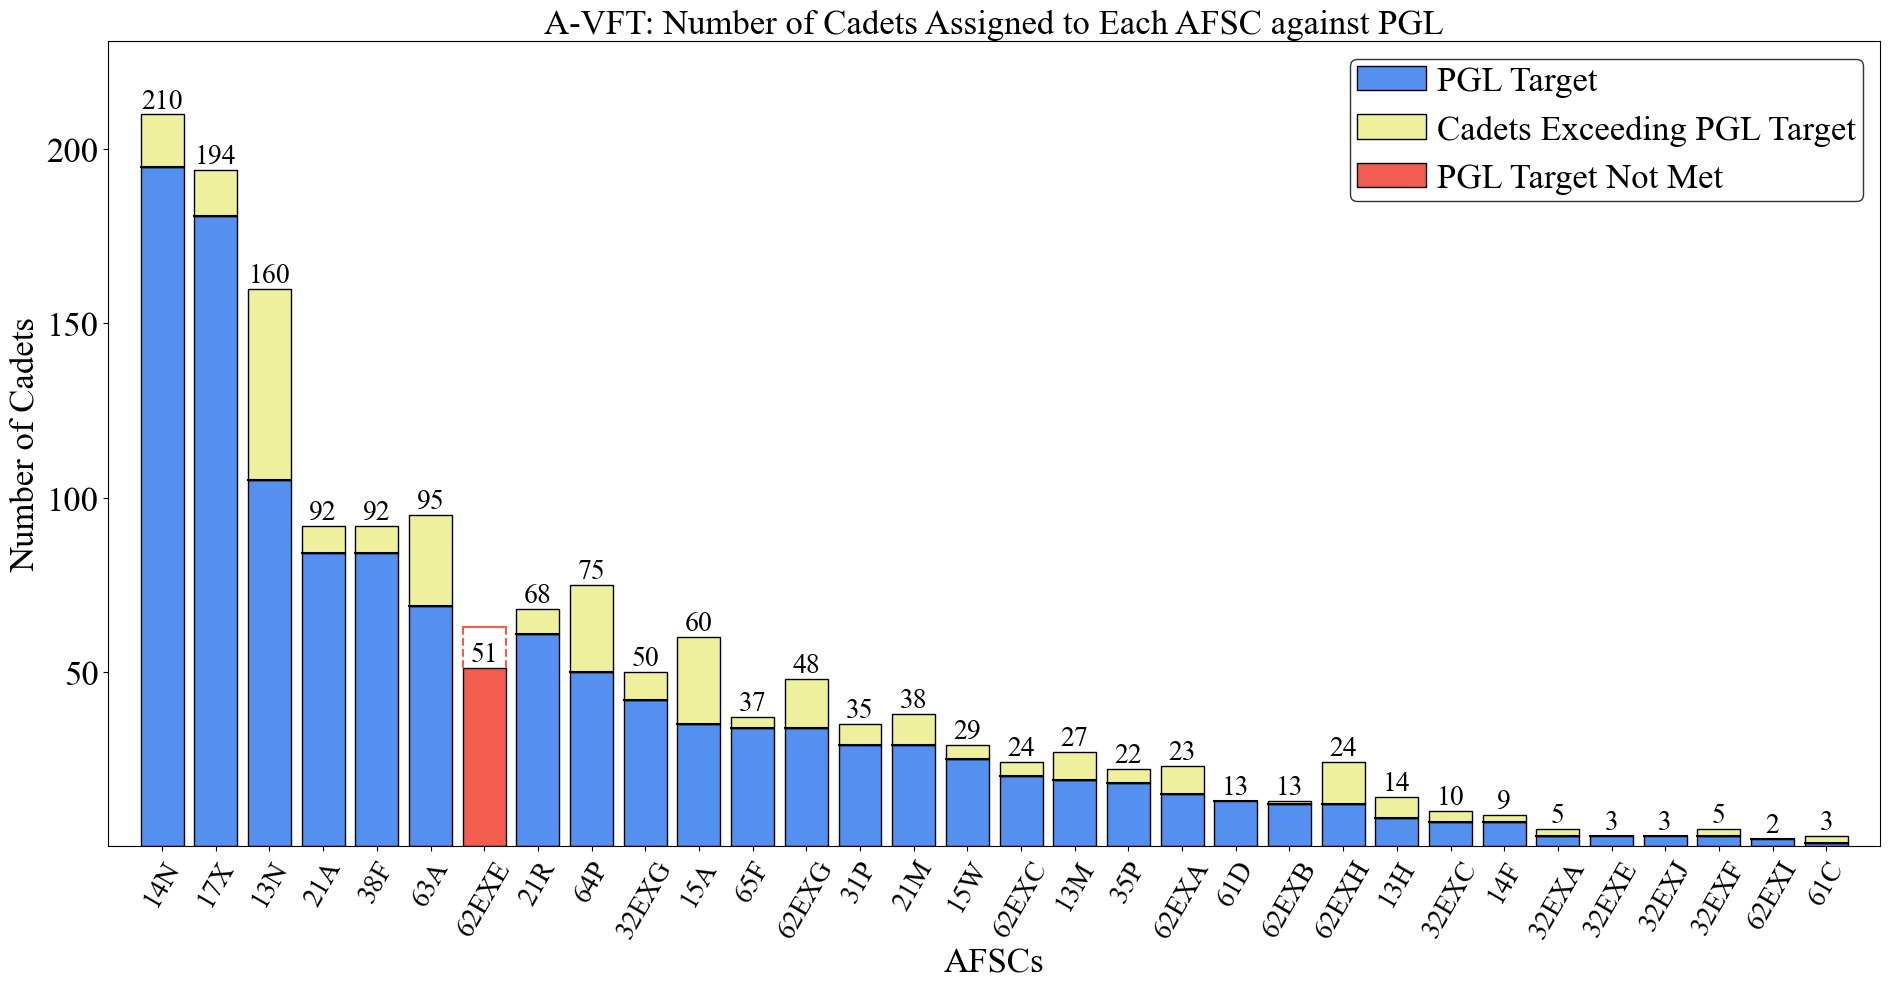

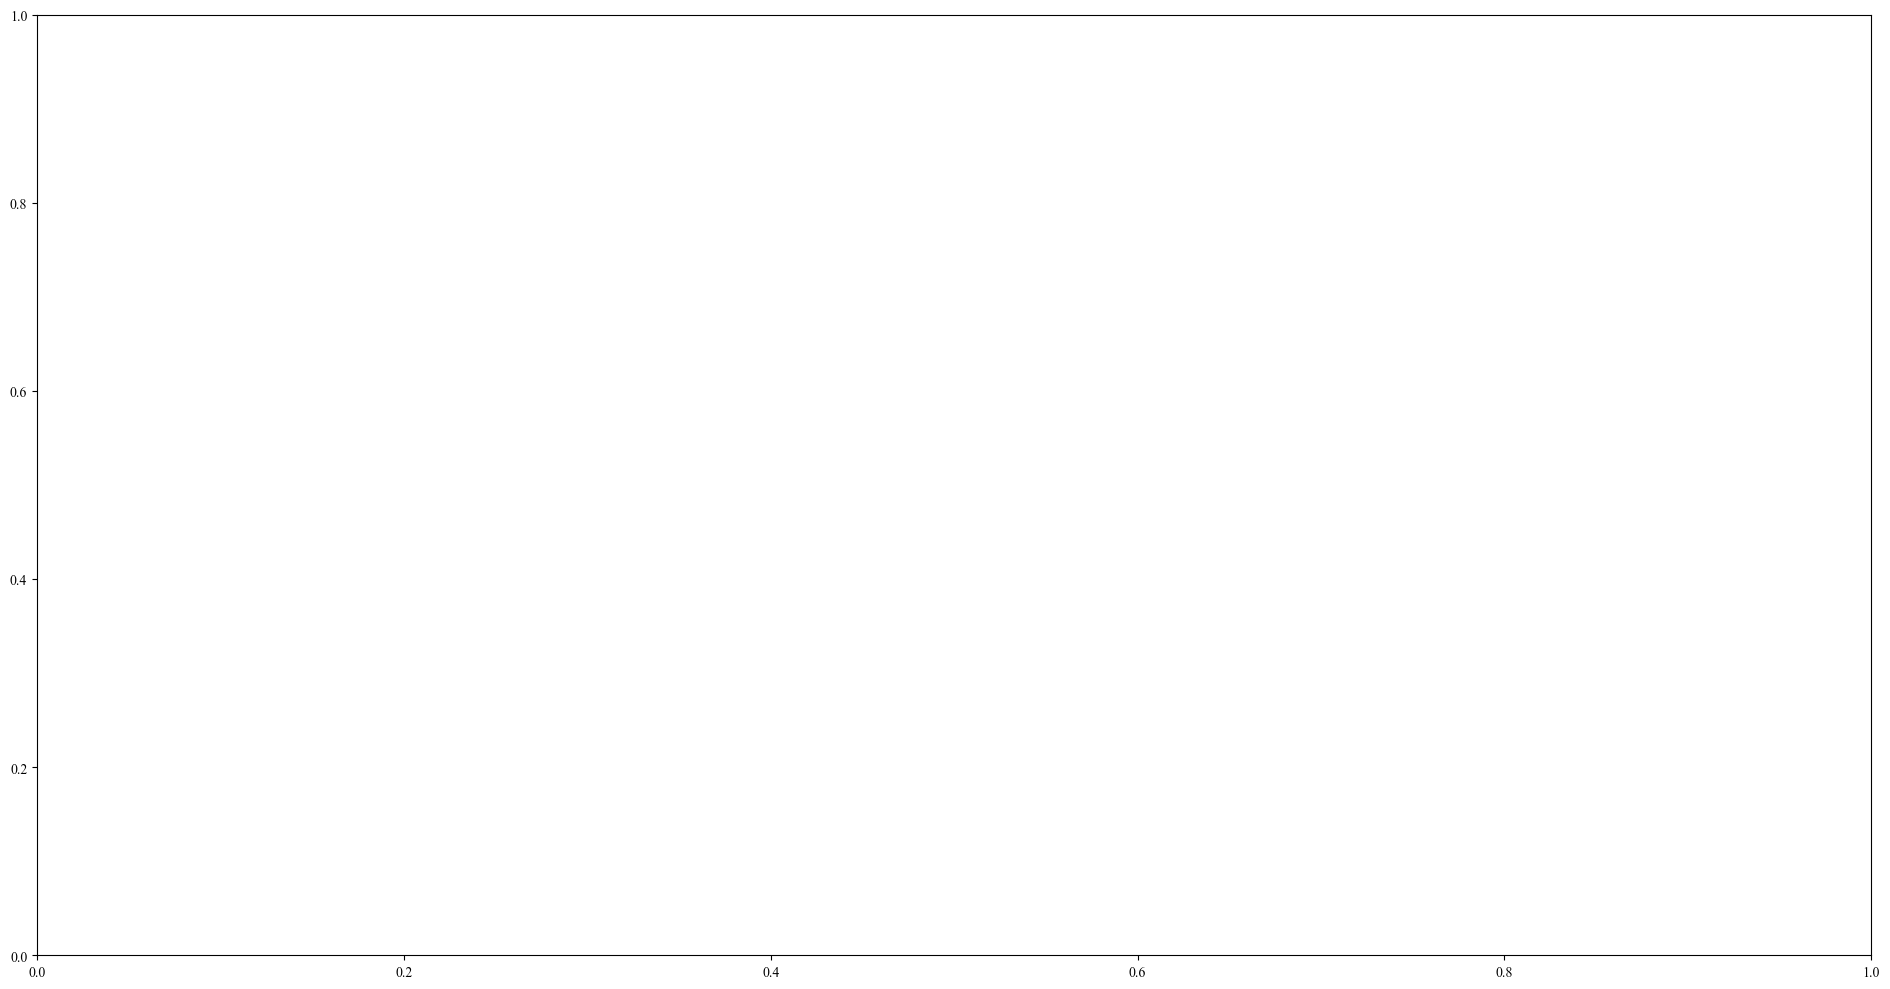

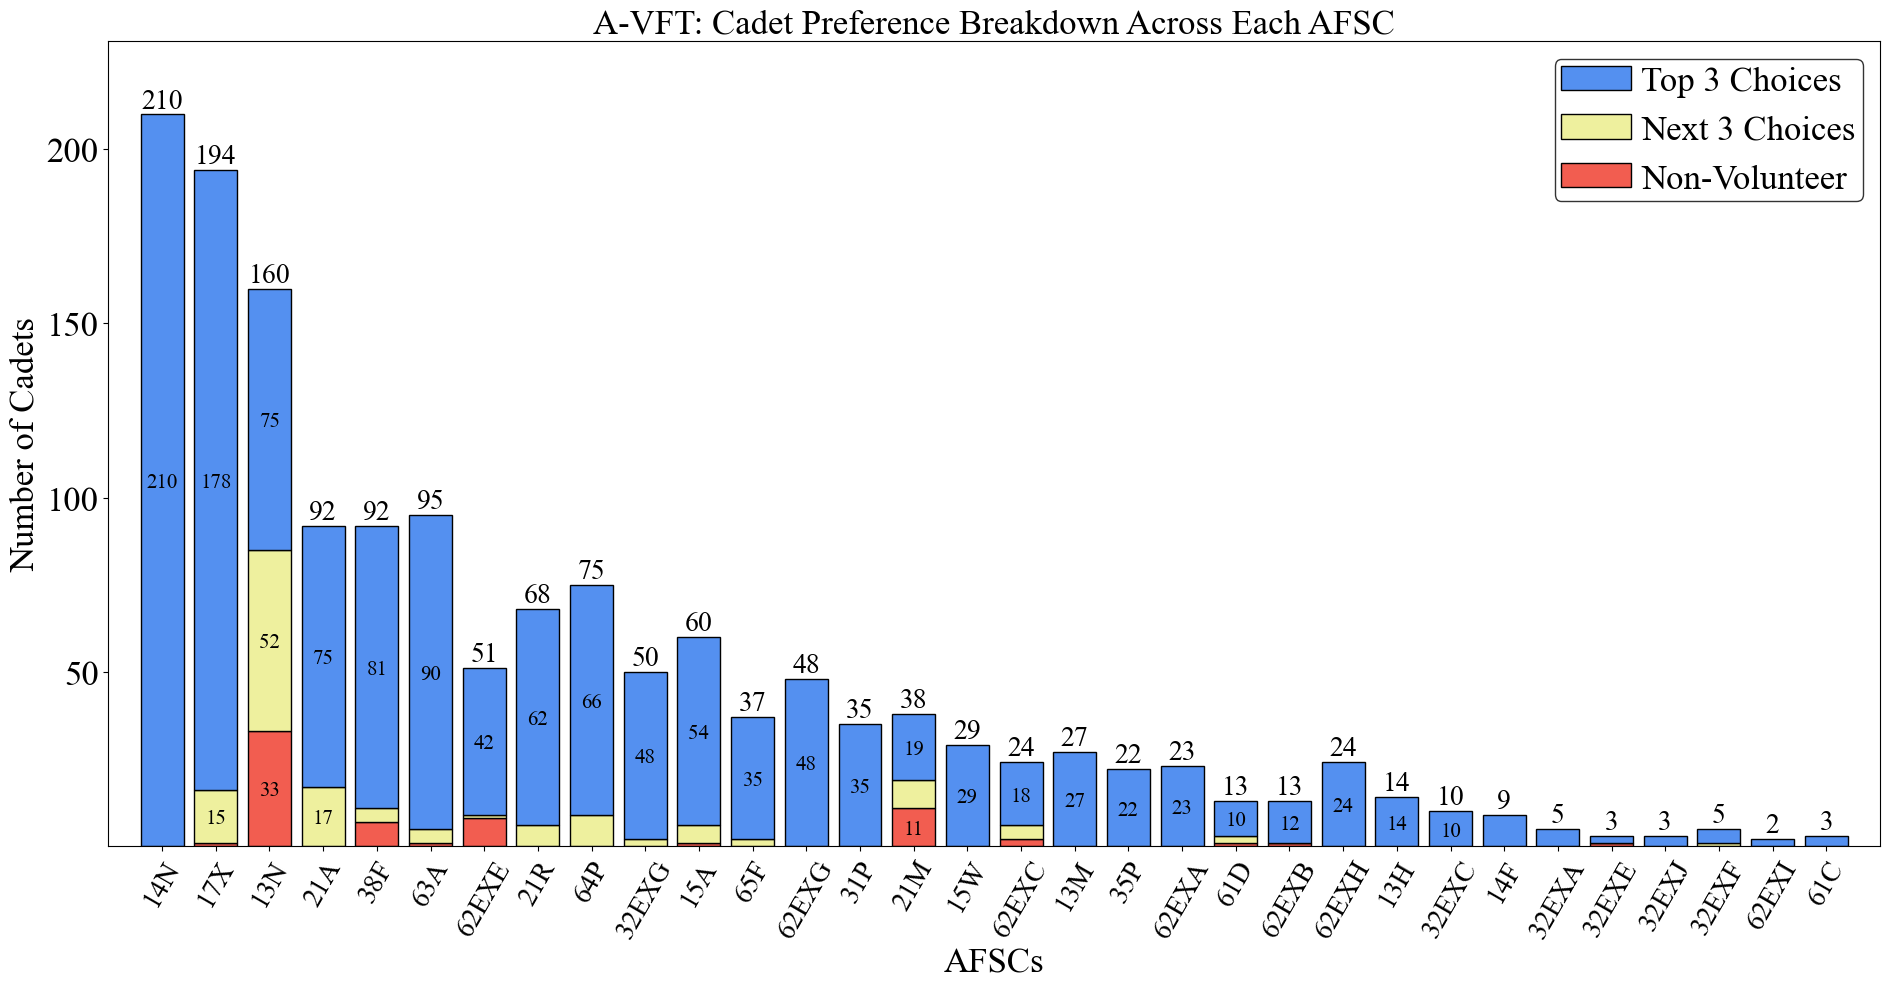

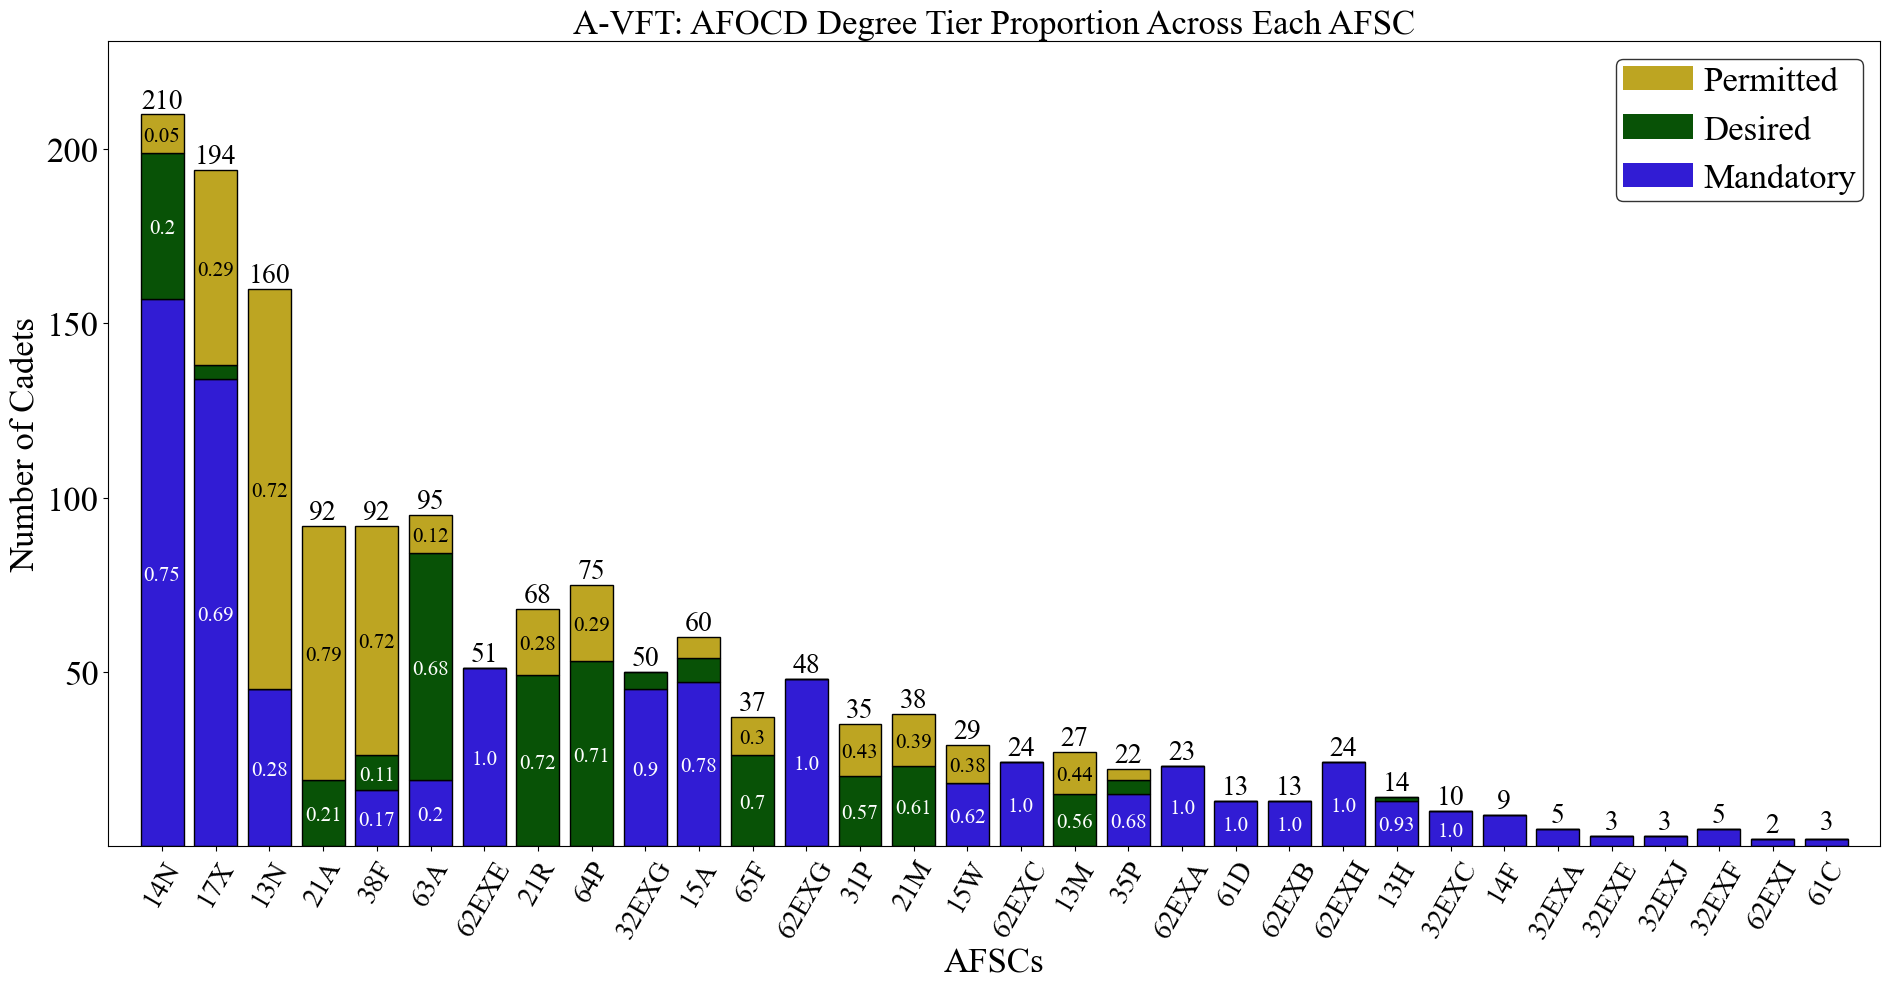

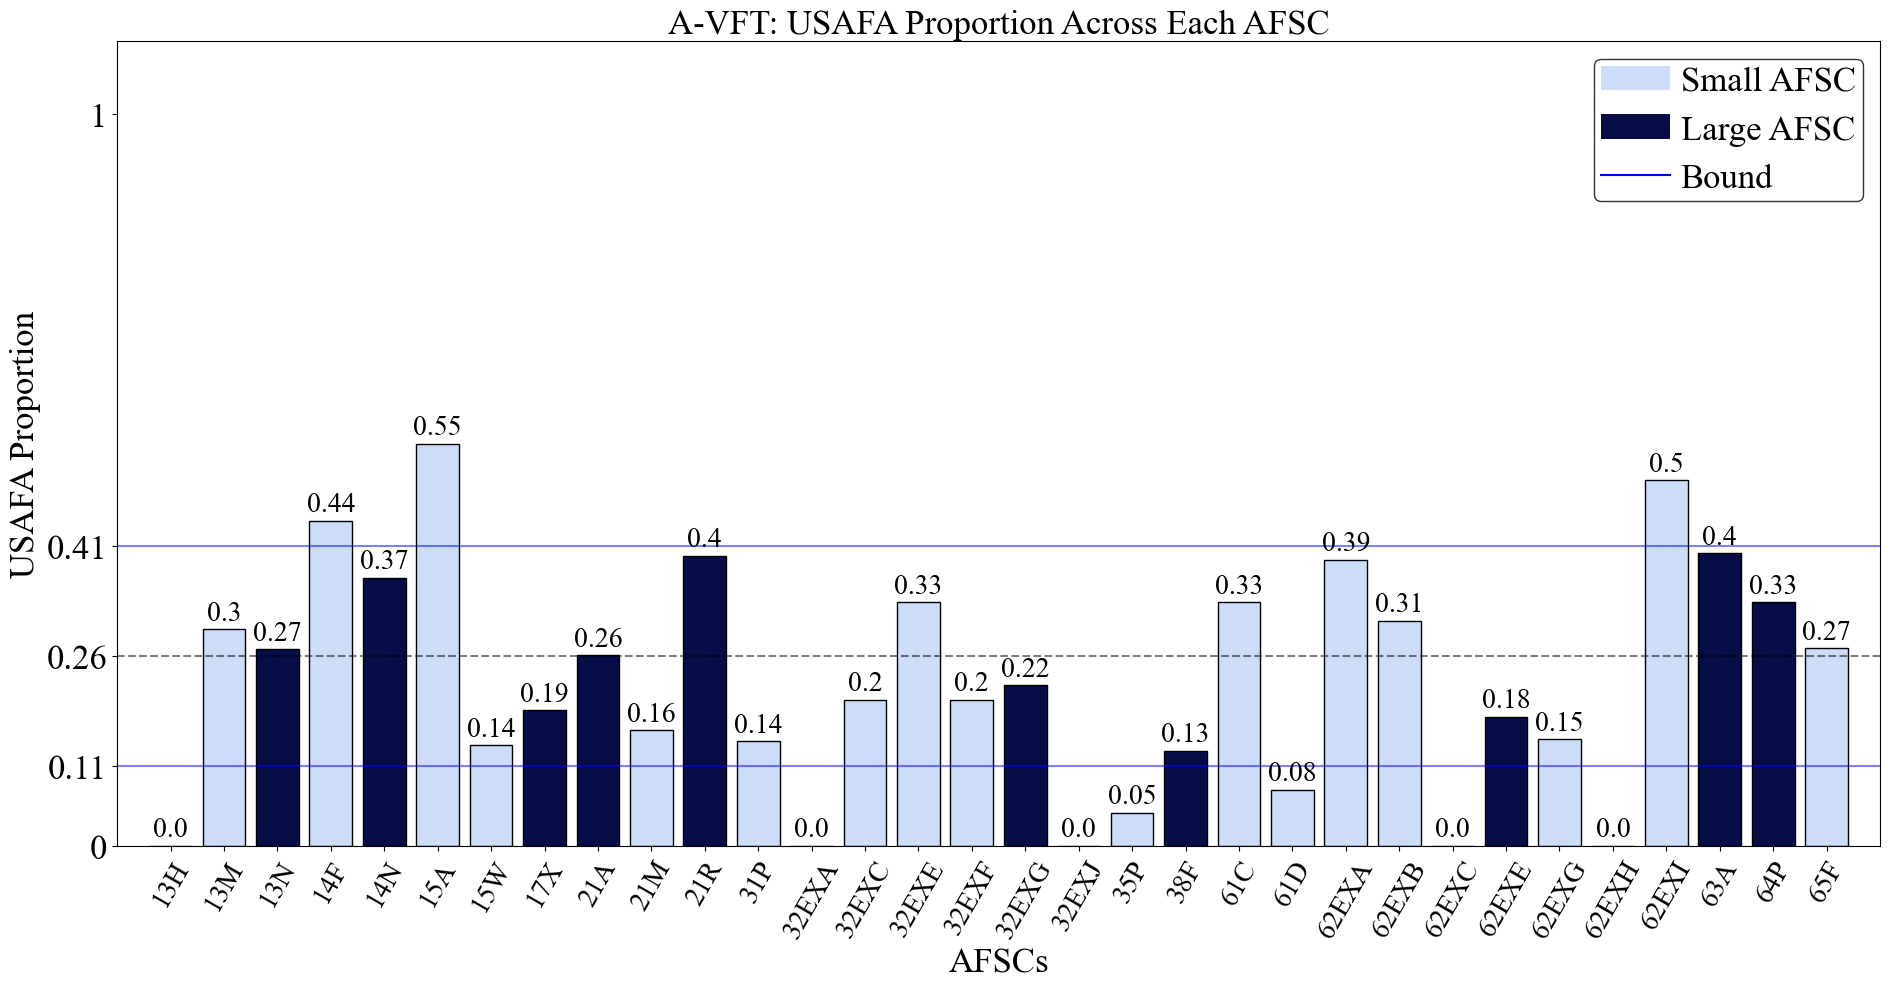

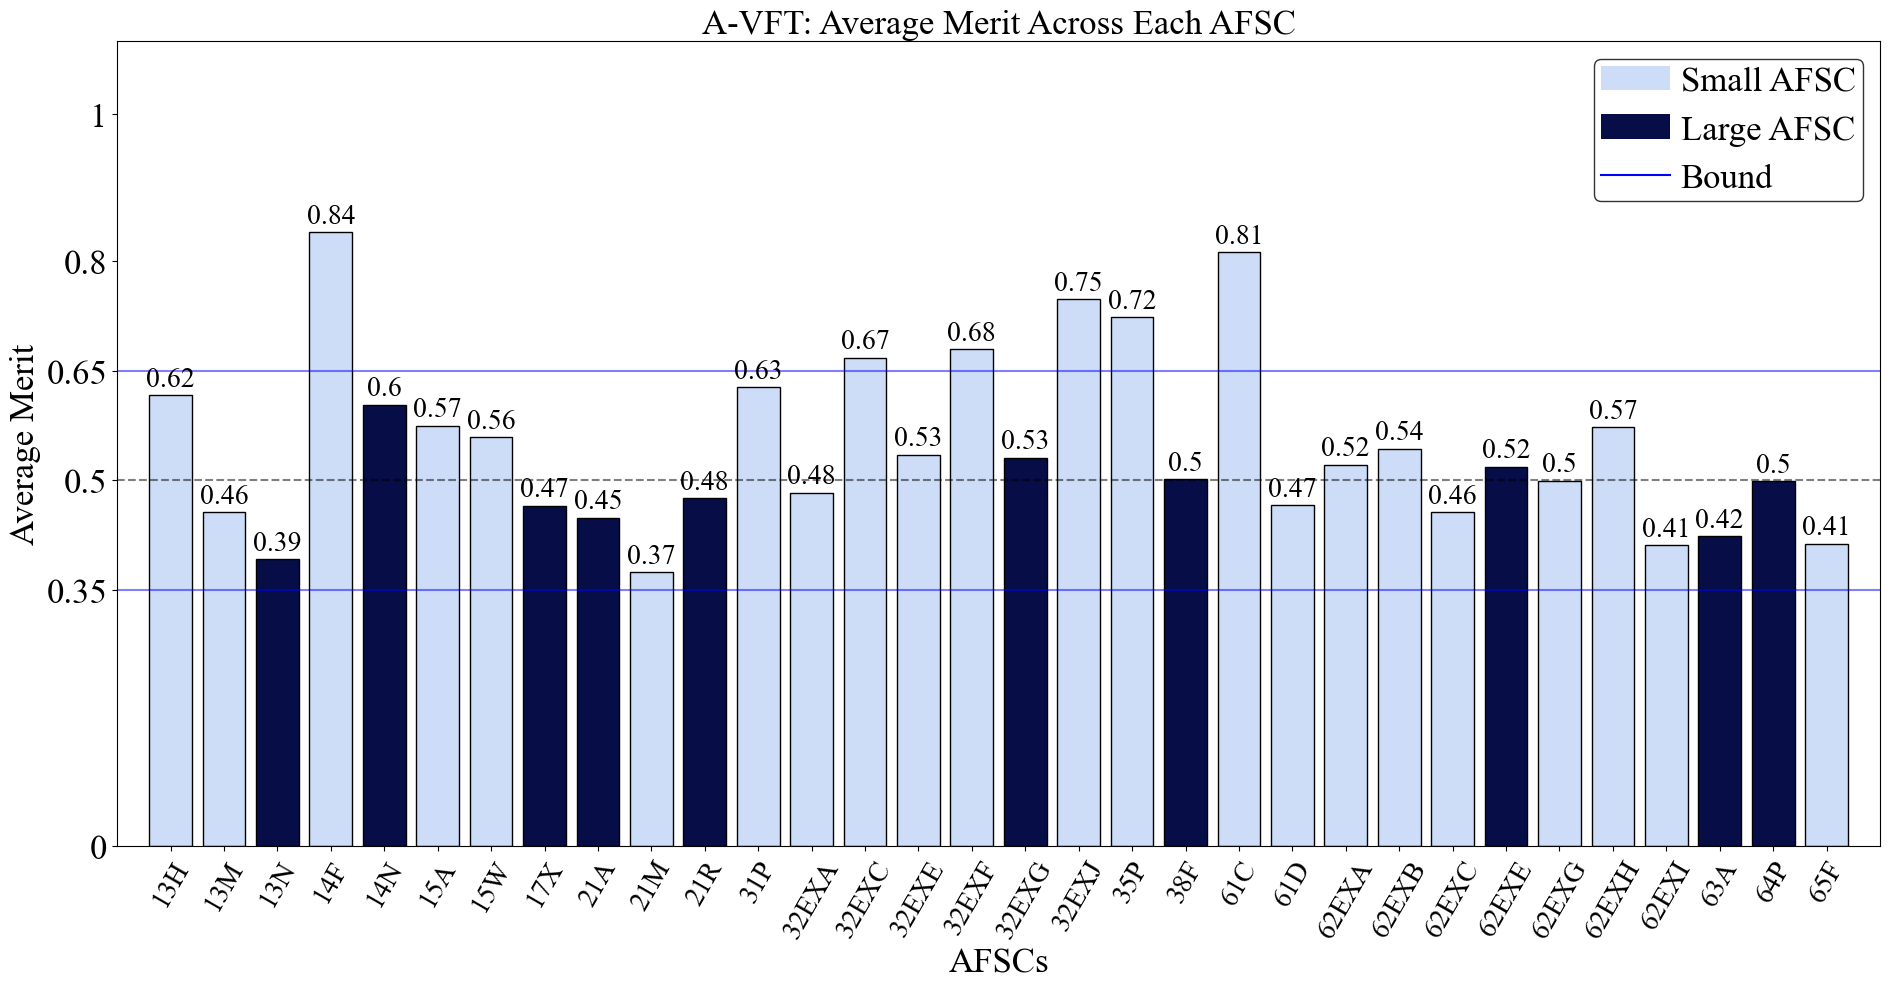

In [92]:
instance.display_all_results_graphs()